<a href="https://colab.research.google.com/github/YoverOlivares/IA-LPrac/blob/main/Copia_de_ProyFinal(SI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de fin de unidad: Comparación de Algoritmos de Clasificación con Fashion-MNIST**



**Objetivo General**

Comparar el desempeño de Redes Neuronales con algoritmos de Machine Learning clásico (Naive
Bayes, KNN, SVM, Random Forest) en la clasificación de imágenes de prendas de vestir del dataset
Fashion-MNIST.

**Objetivos Específicos**

1. Implementar y entrenar diferentes algoritmos de clasificación
2. Evaluar y comparar métricas de desempeño (accuracy, precision, recall, F1-score)
3. Analizar tiempos de entrenamiento y predicción
4. Generar visualizaciones comparativas de resultados
5. Crear un reporte con conclusiones sobre la efectividad de cada algoritmo

**Dataset: Fashion-MNIST (Utilizar el que viene en keras)**

Fashion-MNIST es un dataset de imágenes en escala de grises de 28x28 píxeles que contiene 70,000

imágenes de 10 categorías de prendas:
- 0: Camiseta/Top
- 1: Pantalón
- 2: Suéter
- 3: Vestido
- 4: Abrigo
- 5: Sandalia
- 6: Camisa
- 7: Zapatilla deportiva
- 8: Bolso
- 9: Botín

**Distribución del dataset:**

- Entrenamiento: 60,000 imágenes
- Prueba: 10,000 imágenes


# **Parte 1:**  *Preparación y Exploración de Datos*

## **Carga y exploración inicial**



In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from collections import Counter

try:
    from scipy import stats
    SCIPY_AVAILABLE = True
except ImportError:
    SCIPY_AVAILABLE = False
    print("⚠️  Scipy no está disponible. Se usarán cálculos básicos para estadísticas.")


# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)



# Labels de Fashion-MNIST
class_names = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

print("="*80)
print("                    CARGA DEL DATASET FASHION-MNIST")
print("="*80)

                    CARGA DEL DATASET FASHION-MNIST


CARGAR FASHION-MNIST DESDE KERAS

In [ ]:
# Cargar Fashion-MNIST desde Keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

MOSTRAR INFORMACIÓN BÁSICA DEL DATASET

In [ ]:
print("="*50)
print("         INFORMACIÓN BÁSICA DEL DATASET")
print("="*50)

print(f"Dimensiones del conjunto de entrenamiento:")
print(f"   - Imágenes de entrenamiento: {X_train.shape}")
print(f"   - Etiquetas de entrenamiento: {y_train.shape}")

print(f"\n Dimensiones del conjunto de prueba:")
print(f"   - Imágenes de prueba: {X_test.shape}")
print(f"   - Etiquetas de prueba: {y_test.shape}")

print(f"\n Características de las imágenes:")
print(f"   - Tamaño de imagen: {X_train.shape[1]}x{X_train.shape[2]} píxeles")
print(f"   - Rango de píxeles: {X_train.min()} - {X_train.max()}")
print(f"   - Tipo de datos: {X_train.dtype}")
print(f"   - Escala de grises: Sí")

print(f"\n Resumen total:")
print(f"   - Total de imágenes de entrenamiento: {len(X_train):,}")
print(f"   - Total de imágenes de prueba: {len(X_test):,}")
print(f"   - Total de imágenes: {len(X_train) + len(X_test):,}")
print(f"   - Número de clases: {len(class_names)}")

print(f"\n Clases disponibles:")
for i, class_name in enumerate(class_names):
    print(f"   {i}: {class_name}")

         INFORMACIÓN BÁSICA DEL DATASET
Dimensiones del conjunto de entrenamiento:
   - Imágenes de entrenamiento: (60000, 28, 28)
   - Etiquetas de entrenamiento: (60000,)

 Dimensiones del conjunto de prueba:
   - Imágenes de prueba: (10000, 28, 28)
   - Etiquetas de prueba: (10000,)

 Características de las imágenes:
   - Tamaño de imagen: 28x28 píxeles
   - Rango de píxeles: 0 - 255
   - Tipo de datos: uint8
   - Escala de grises: Sí

 Resumen total:
   - Total de imágenes de entrenamiento: 60,000
   - Total de imágenes de prueba: 10,000
   - Total de imágenes: 70,000
   - Número de clases: 10

 Clases disponibles:
   0: Camiseta/Top
   1: Pantalón
   2: Suéter
   3: Vestido
   4: Abrigo
   5: Sandalia
   6: Camisa
   7: Zapatilla
   8: Bolso
   9: Botín


ANÁLISIS DE DISTRIBUCIÓN DE CLASES

In [ ]:
print("\n" + "="*50)
print("        ANÁLISIS DE DISTRIBUCIÓN DE CLASES")
print("="*50)

# Contar distribución en conjunto de entrenamiento
train_distribution = Counter(y_train)
test_distribution = Counter(y_test)

print("\n Distribución en conjunto de ENTRENAMIENTO:")
for class_id in sorted(train_distribution.keys()):
    class_name = class_names[class_id]
    count = train_distribution[class_id]
    percentage = (count / len(y_train)) * 100
    print(f"   Clase {class_id} ({class_name:<15}): {count:,} imágenes ({percentage:.1f}%)")

print("\n Distribución en conjunto de PRUEBA:")
for class_id in sorted(test_distribution.keys()):
    class_name = class_names[class_id]
    count = test_distribution[class_id]
    percentage = (count / len(y_test)) * 100
    print(f"   Clase {class_id} ({class_name:<15}): {count:,} imágenes ({percentage:.1f}%)")

# Crear DataFrame para visualización
dist_data = []
for class_id in range(10):
    dist_data.append({
        'Clase': f"{class_id}: {class_names[class_id]}",
        'Entrenamiento': train_distribution[class_id],
        'Prueba': test_distribution[class_id],
        'Total': train_distribution[class_id] + test_distribution[class_id]
    })

df_distribution = pd.DataFrame(dist_data)
print("\n Tabla resumen de distribución:")
print(df_distribution.to_string(index=False))



        ANÁLISIS DE DISTRIBUCIÓN DE CLASES

 Distribución en conjunto de ENTRENAMIENTO:
   Clase 0 (Camiseta/Top   ): 6,000 imágenes (10.0%)
   Clase 1 (Pantalón       ): 6,000 imágenes (10.0%)
   Clase 2 (Suéter         ): 6,000 imágenes (10.0%)
   Clase 3 (Vestido        ): 6,000 imágenes (10.0%)
   Clase 4 (Abrigo         ): 6,000 imágenes (10.0%)
   Clase 5 (Sandalia       ): 6,000 imágenes (10.0%)
   Clase 6 (Camisa         ): 6,000 imágenes (10.0%)
   Clase 7 (Zapatilla      ): 6,000 imágenes (10.0%)
   Clase 8 (Bolso          ): 6,000 imágenes (10.0%)
   Clase 9 (Botín          ): 6,000 imágenes (10.0%)

 Distribución en conjunto de PRUEBA:
   Clase 0 (Camiseta/Top   ): 1,000 imágenes (10.0%)
   Clase 1 (Pantalón       ): 1,000 imágenes (10.0%)
   Clase 2 (Suéter         ): 1,000 imágenes (10.0%)
   Clase 3 (Vestido        ): 1,000 imágenes (10.0%)
   Clase 4 (Abrigo         ): 1,000 imágenes (10.0%)
   Clase 5 (Sandalia       ): 1,000 imágenes (10.0%)
   Clase 6 (Camisa       

VISUALIZACIONES


              VISUALIZACIONES

 Creando gráficos de distribución de clases...


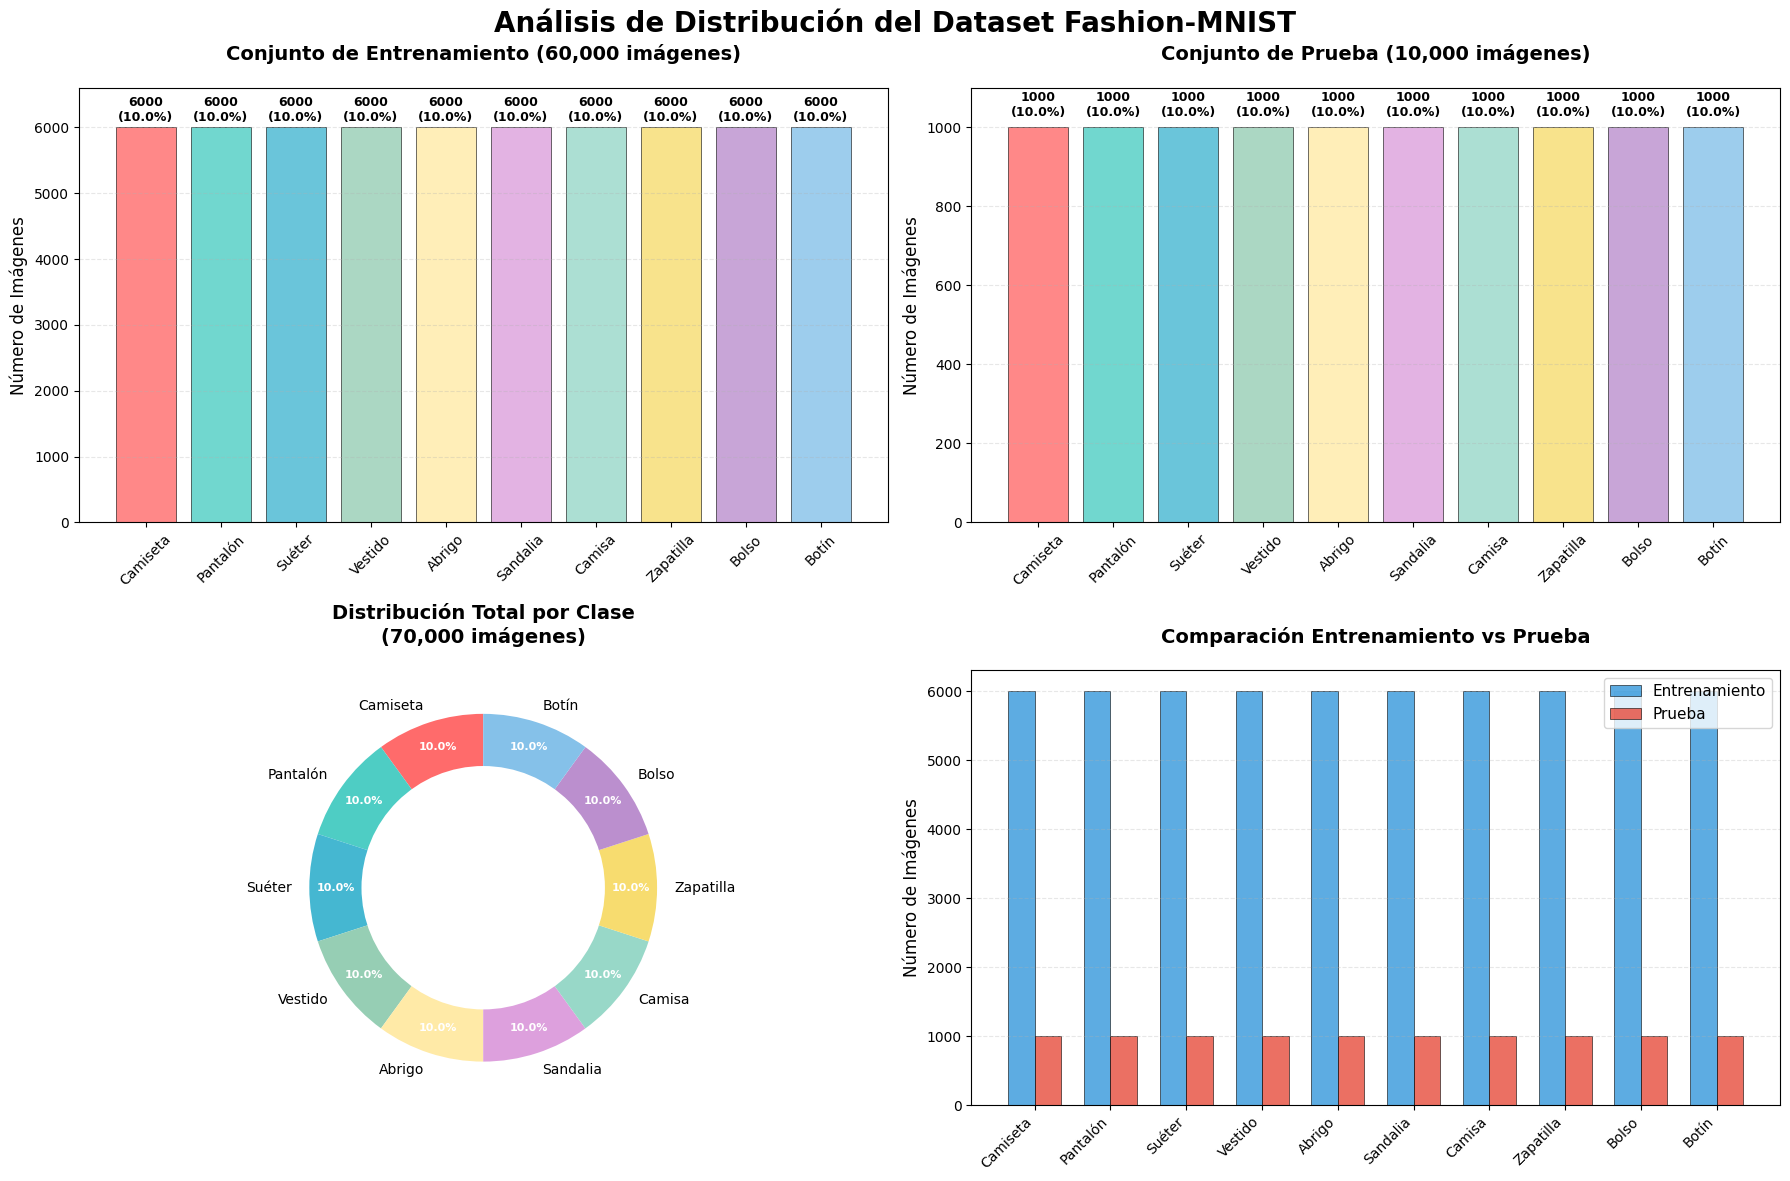


 Generando galería de muestras por clase...


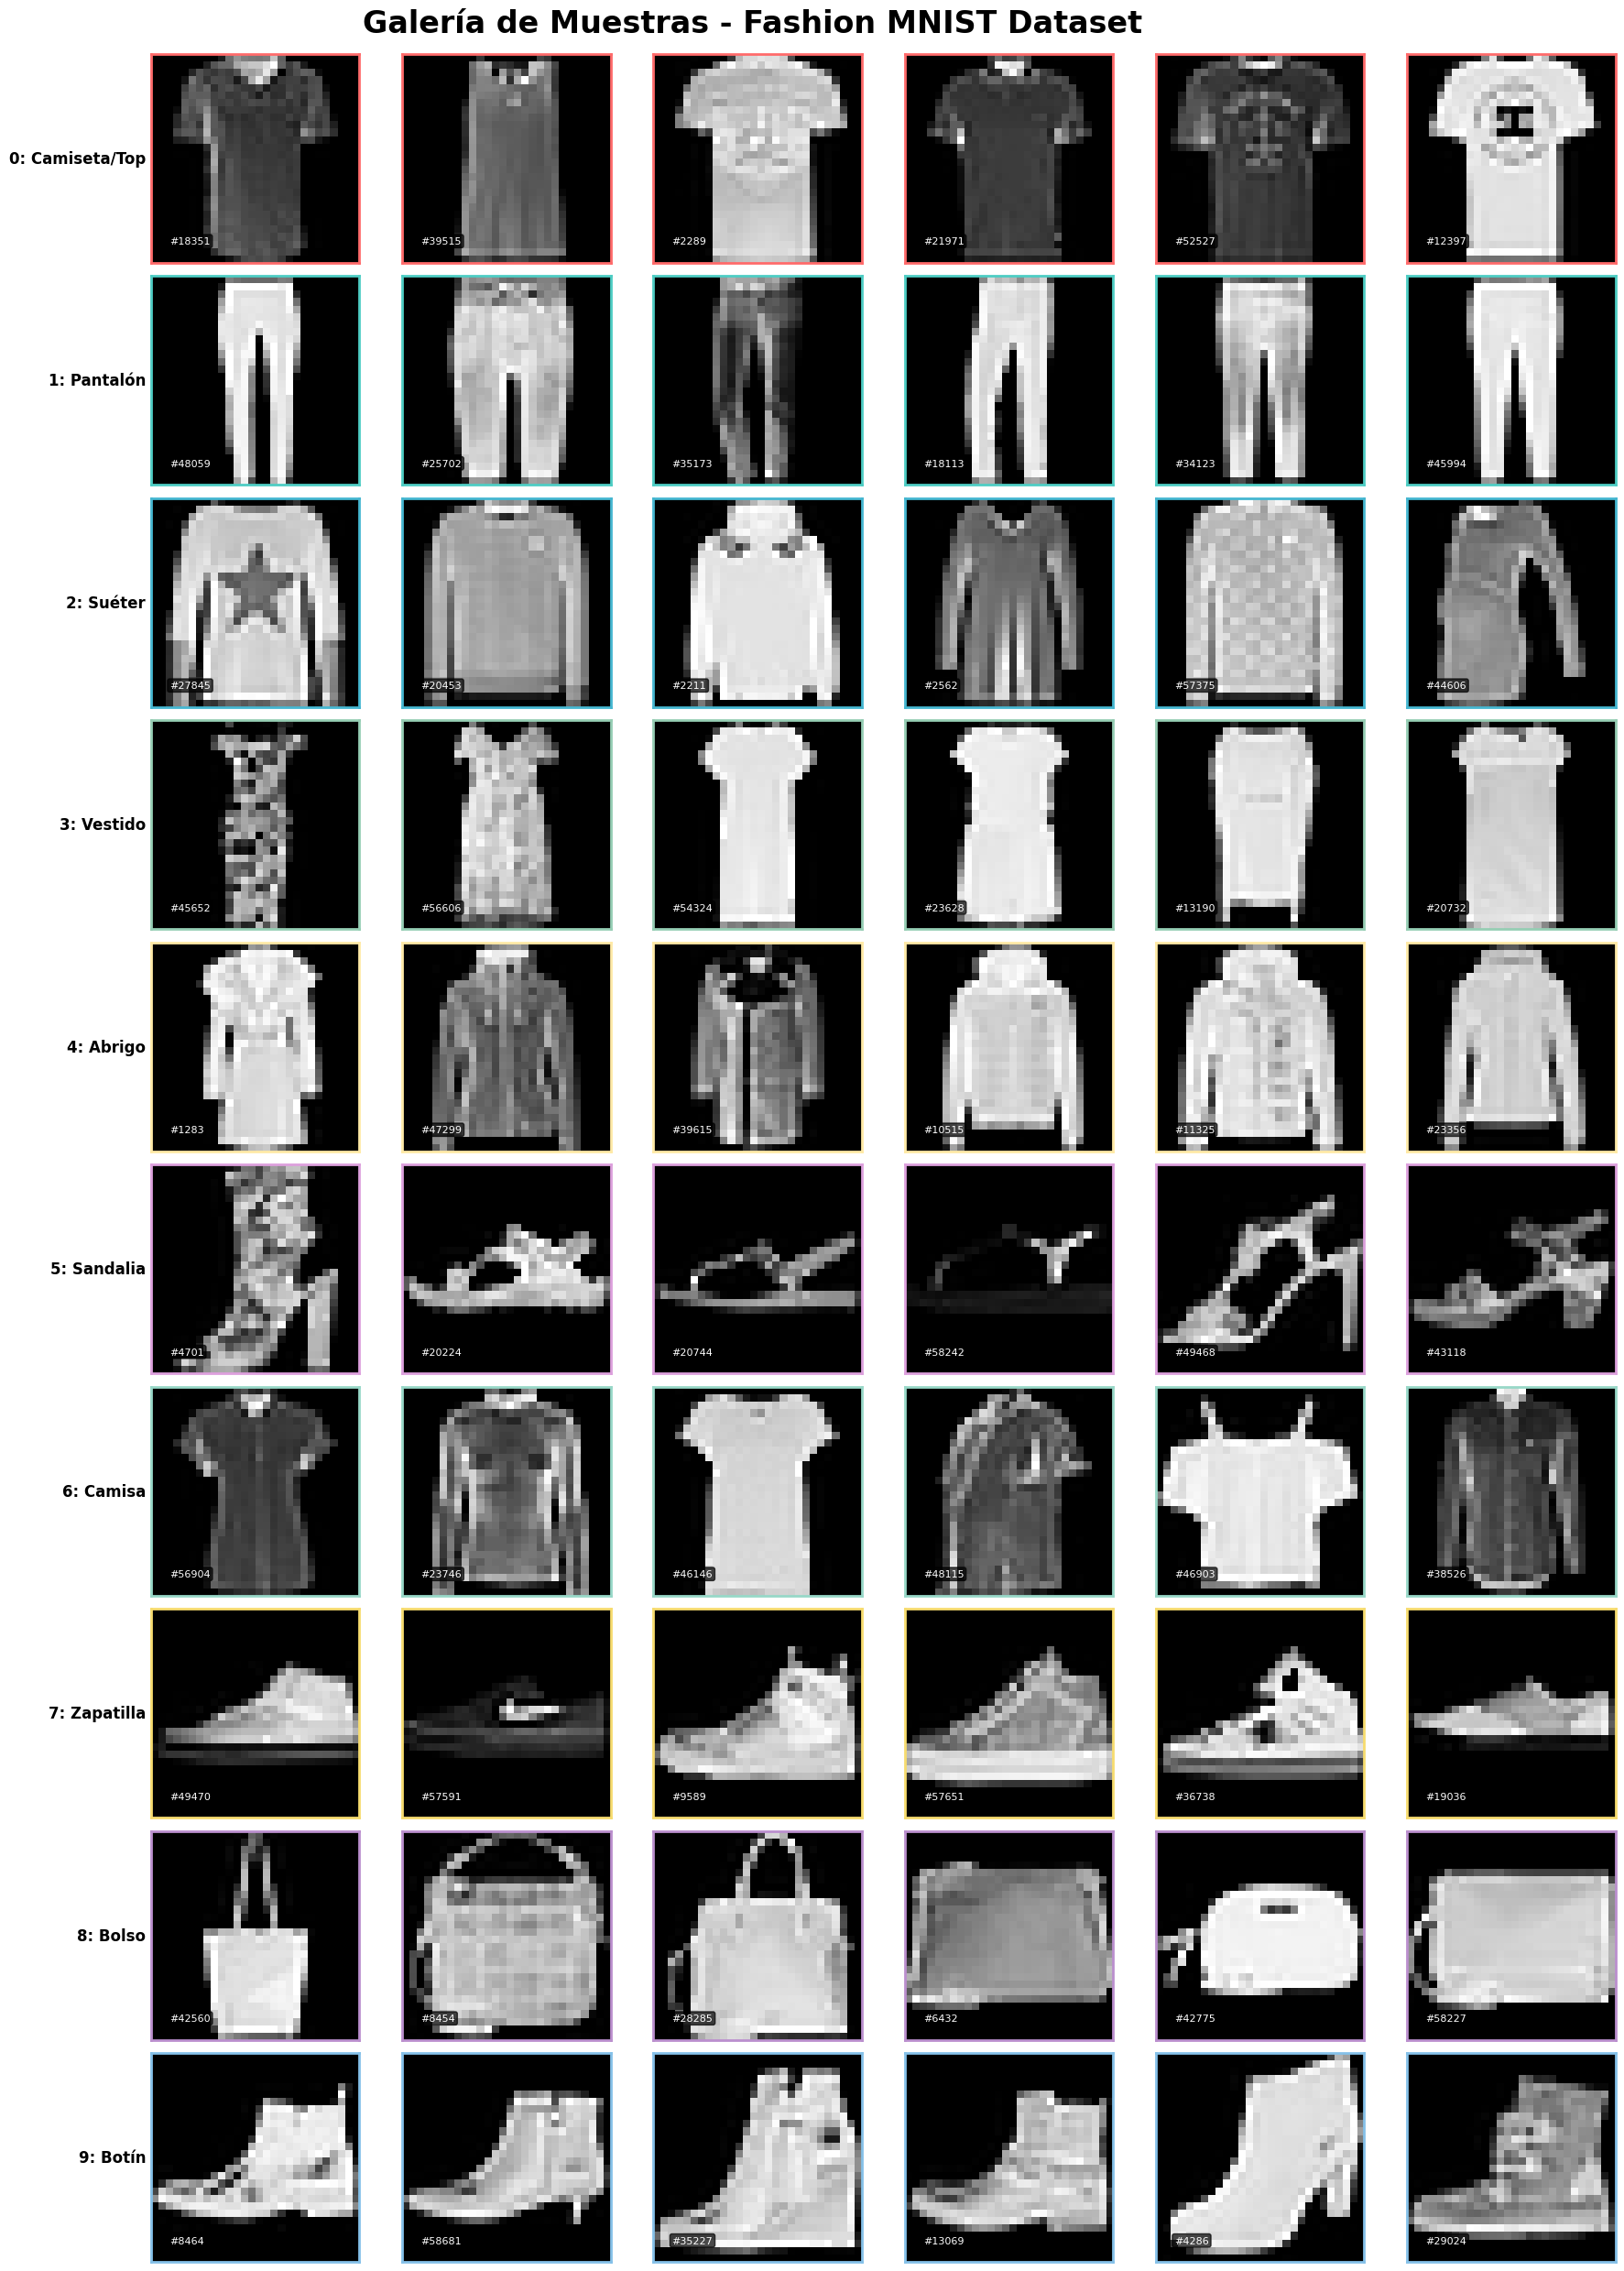


 Generando análisis estadístico avanzado...


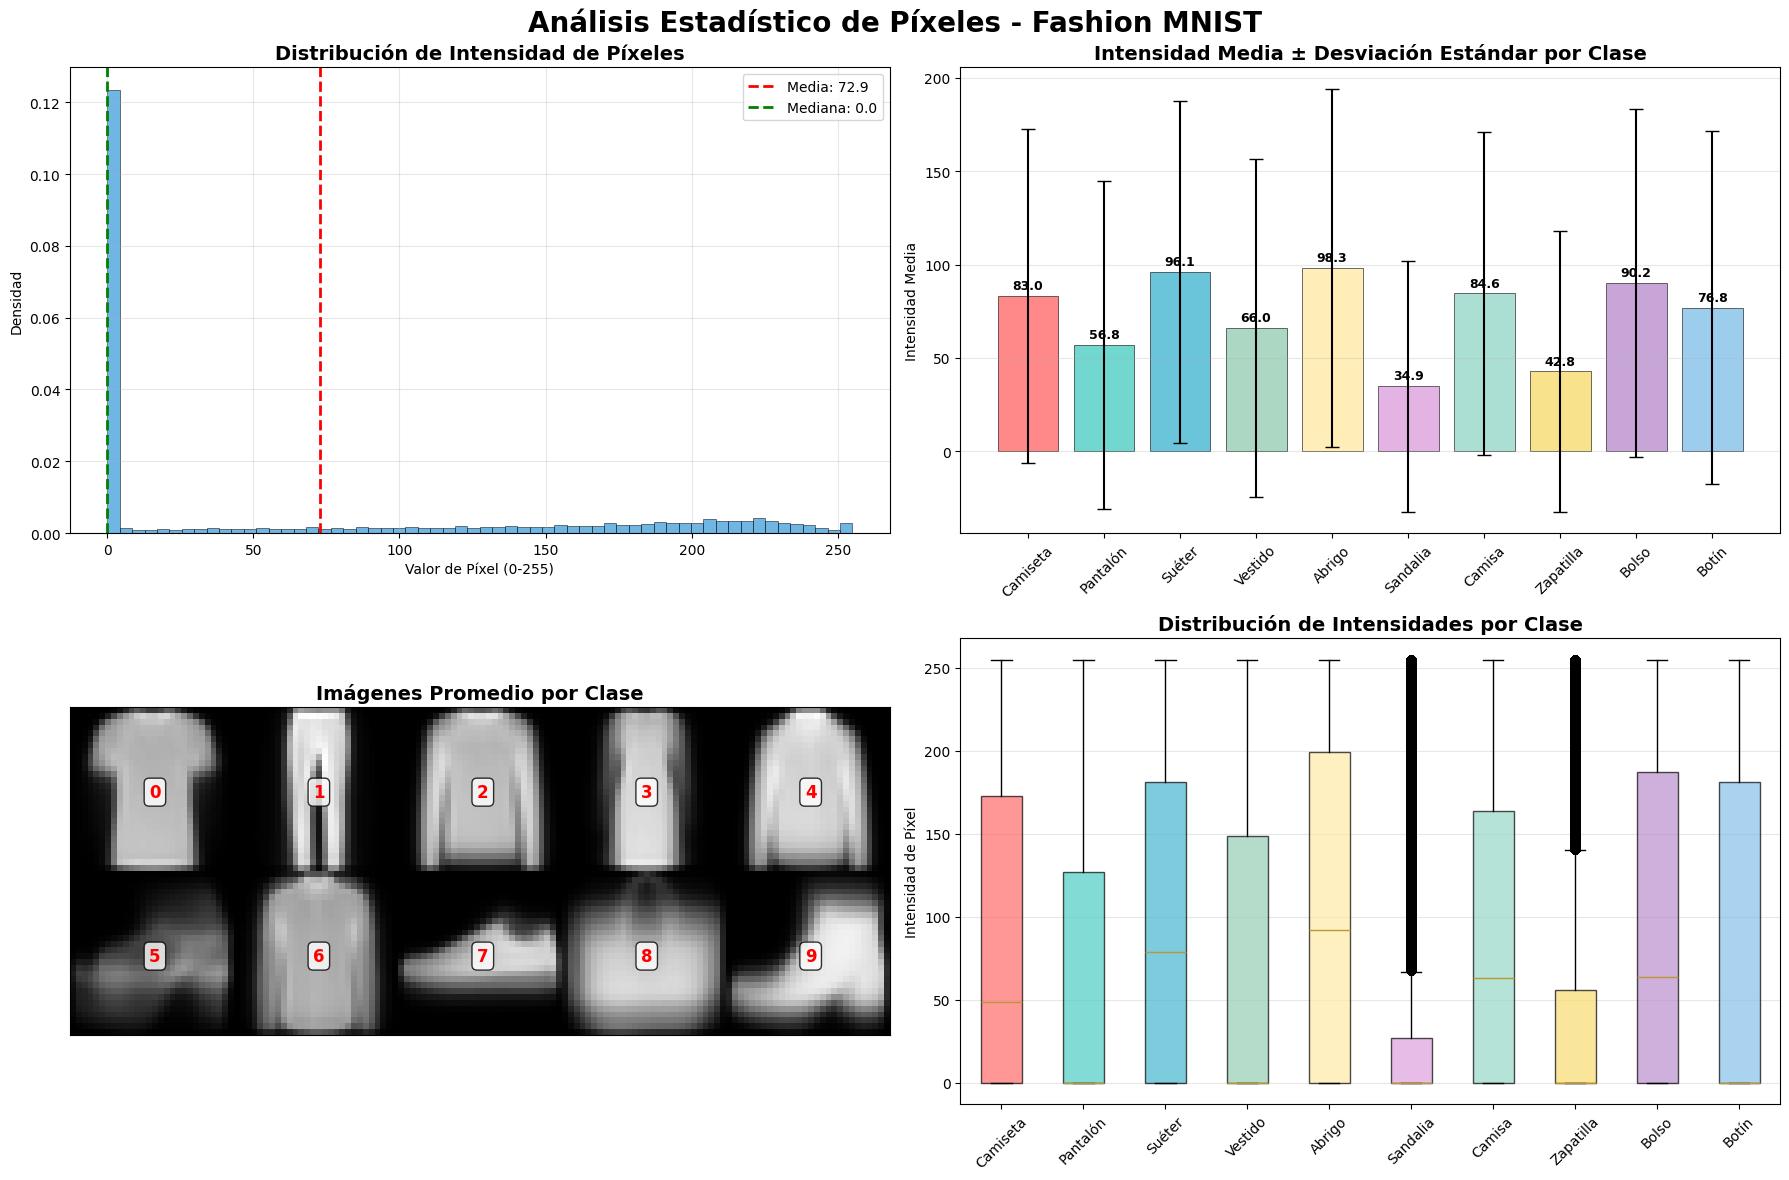


 Generando análisis de correlación entre clases...


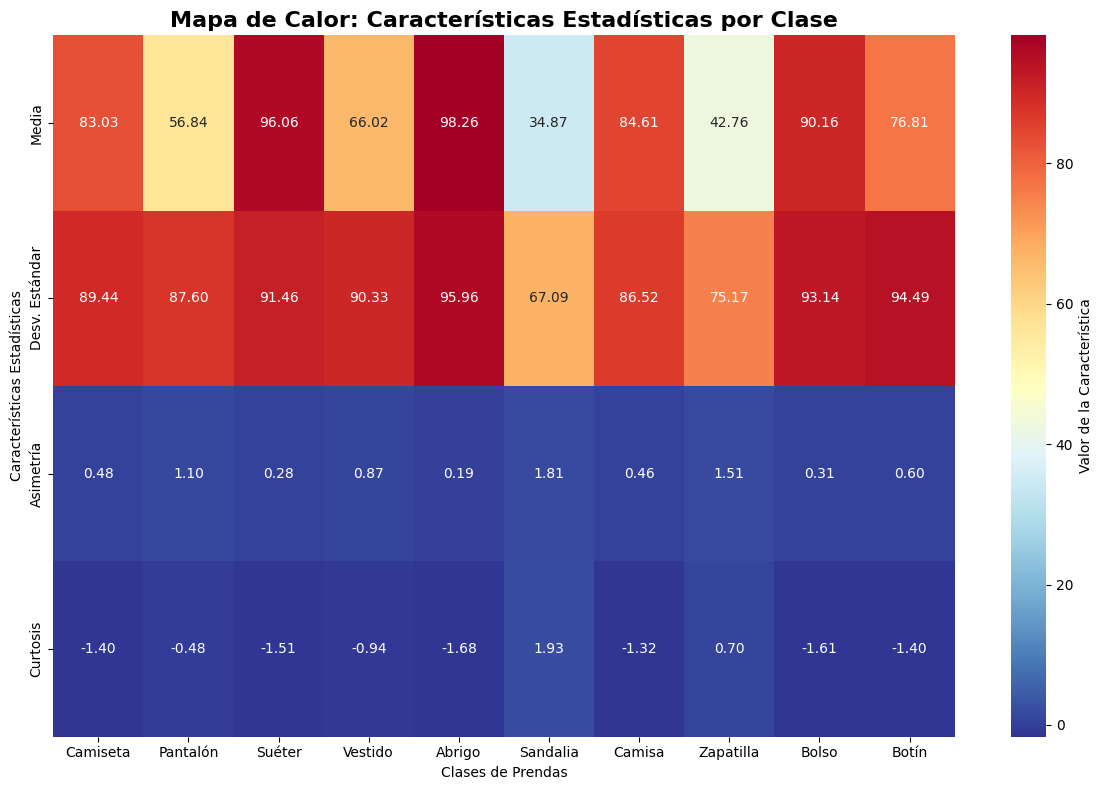

In [ ]:
print("\n" + "="*50)
print("              VISUALIZACIONES")
print("="*50)

# Configuración mejorada de colores y estilos
colors = plt.cm.Set3(np.linspace(0, 1, 10))
custom_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7',
                  '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

# 4.1 DISTRIBUCIÓN DE CLASES - VERSIÓN MEJORADA
print("\n Creando gráficos de distribución de clases...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Análisis de Distribución del Dataset Fashion-MNIST', fontsize=20, fontweight='bold', y=0.98)

# Gráfico 1: Barras de entrenamiento
classes_short = [name.split('/')[0] for name in class_names]
train_counts = [train_distribution[i] for i in range(10)]

bars1 = ax1.bar(classes_short, train_counts, color=custom_palette, alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title('Conjunto de Entrenamiento (60,000 imágenes)', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Número de Imágenes', fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(train_counts) * 1.1)

# Agregar valores y porcentajes en las barras
for bar, count in zip(bars1, train_counts):
    height = bar.get_height()
    percentage = (count / sum(train_counts)) * 100
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom',
             fontweight='bold', fontsize=9)

ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Barras de prueba
test_counts = [test_distribution[i] for i in range(10)]
bars2 = ax2.bar(classes_short, test_counts, color=custom_palette, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Conjunto de Prueba (10,000 imágenes)', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Número de Imágenes', fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, max(test_counts) * 1.1)

for bar, count in zip(bars2, test_counts):
    height = bar.get_height()
    percentage = (count / sum(test_counts)) * 100
    ax2.text(bar.get_x() + bar.get_width()/2, height + 20,
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom',
             fontweight='bold', fontsize=9)

ax2.tick_params(axis='x', rotation=45)

# Gráfico 3: Gráfico de dona (donut chart)
total_counts = [train_counts[i] + test_counts[i] for i in range(10)]
wedges, texts, autotexts = ax3.pie(total_counts, labels=classes_short, autopct='%1.1f%%',
                                   colors=custom_palette, startangle=90, pctdistance=0.85)

# Crear el hueco en el centro
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax3.add_artist(centre_circle)
ax3.set_title('Distribución Total por Clase\n(70,000 imágenes)', fontsize=14, fontweight='bold', pad=20)

# Mejorar el texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(8)

# Gráfico 4: Comparación lado a lado
x_pos = np.arange(len(classes_short))
width = 0.35

bars_train = ax4.bar(x_pos - width/2, train_counts, width, label='Entrenamiento',
                     color='#3498DB', alpha=0.8, edgecolor='black', linewidth=0.5)
bars_test = ax4.bar(x_pos + width/2, test_counts, width, label='Prueba',
                    color='#E74C3C', alpha=0.8, edgecolor='black', linewidth=0.5)

ax4.set_title('Comparación Entrenamiento vs Prueba', fontsize=14, fontweight='bold', pad=20)
ax4.set_ylabel('Número de Imágenes', fontsize=12)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(classes_short, rotation=45, ha='right')
ax4.legend(fontsize=11)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 4.2 MUESTRAS POR CLASE - VERSIÓN MEJORADA
print("\n Generando galería de muestras por clase...")

fig, axes = plt.subplots(10, 6, figsize=(20, 25))
fig.suptitle('Galería de Muestras - Fashion MNIST Dataset', fontsize=24, fontweight='bold', y=0.99)

np.random.seed(42)  # Para reproducibilidad

for class_id in range(10):
    # Encontrar índices de esta clase
    class_indices = np.where(y_train == class_id)[0]

    # Tomar 6 ejemplos diversos
    sample_indices = np.random.choice(class_indices, 6, replace=False)

    for i, sample_idx in enumerate(sample_indices):
        ax = axes[class_id, i]

        # Mostrar imagen con mejor contraste
        img = X_train[sample_idx]
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])

        # Agregar borde de color para cada clase
        for spine in ax.spines.values():
            spine.set_edgecolor(custom_palette[class_id])
            spine.set_linewidth(2)

        # Título solo en la primera imagen de cada fila
        if i == 0:
            ax.set_ylabel(f'{class_id}: {class_names[class_id]}',
                         fontsize=12, fontweight='bold', rotation=0, ha='right', va='center')

        # Agregar índice de imagen en la esquina
        ax.text(2, 25, f'#{sample_idx}', fontsize=8, color='white',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(top=0.97, left=0.15)
plt.show()

# 4.3 ANÁLISIS ESTADÍSTICO AVANZADO
print("\n Generando análisis estadístico avanzado...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Análisis Estadístico de Píxeles - Fashion MNIST', fontsize=20, fontweight='bold')

# Gráfico 1: Distribución de píxeles mejorada
ax1.hist(X_train.flatten(), bins=60, alpha=0.7, color='#3498DB',
         edgecolor='black', linewidth=0.5, density=True)
ax1.axvline(np.mean(X_train), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(X_train):.1f}')
ax1.axvline(np.median(X_train), color='green', linestyle='--', linewidth=2, label=f'Mediana: {np.median(X_train):.1f}')
ax1.set_title('Distribución de Intensidad de Píxeles', fontsize=14, fontweight='bold')
ax1.set_xlabel('Valor de Píxel (0-255)')
ax1.set_ylabel('Densidad')
ax1.legend()
ax1.grid(alpha=0.3)

# Gráfico 2: Intensidad media por clase con error bars
mean_intensities = []
std_intensities = []
for class_id in range(10):
    class_images = X_train[y_train == class_id]
    mean_intensities.append(np.mean(class_images))
    std_intensities.append(np.std(class_images))

bars = ax2.bar(classes_short, mean_intensities, yerr=std_intensities,
               capsize=5, color=custom_palette, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Intensidad Media ± Desviación Estándar por Clase', fontsize=14, fontweight='bold')
ax2.set_ylabel('Intensidad Media')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, mean_val in zip(bars, mean_intensities):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 3: Imágenes promedio por clase
class_means = []
for class_id in range(10):
    class_images = X_train[y_train == class_id]
    class_mean = np.mean(class_images, axis=0)
    class_means.append(class_mean)

# Crear una grilla de imágenes promedio
combined_means = np.zeros((28*2, 28*5))
for i in range(10):
    row = i // 5
    col = i % 5
    combined_means[row*28:(row+1)*28, col*28:(col+1)*28] = class_means[i]

im = ax3.imshow(combined_means, cmap='gray', interpolation='nearest')
ax3.set_title('Imágenes Promedio por Clase', fontsize=14, fontweight='bold')
ax3.set_xticks([])
ax3.set_yticks([])

# Agregar etiquetas
for i in range(10):
    row = i // 5
    col = i % 5
    ax3.text(col*28 + 14, row*28 + 14, f'{i}', ha='center', va='center',
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Gráfico 4: Boxplot de intensidades por clase
data_for_boxplot = []
labels_for_boxplot = []
for class_id in range(10):
    class_images = X_train[y_train == class_id]
    # Tomar muestra para el boxplot (para eficiencia)
    sample_size = min(1000, len(class_images))
    sample_images = class_images[np.random.choice(len(class_images), sample_size, replace=False)]
    data_for_boxplot.append(sample_images.flatten())
    labels_for_boxplot.append(classes_short[class_id])

# Usar tick_labels en lugar de labels (versión actualizada de matplotlib)
try:
    box_plot = ax4.boxplot(data_for_boxplot, patch_artist=True, tick_labels=labels_for_boxplot)
except TypeError:
    # Fallback para versiones más antiguas de matplotlib
    box_plot = ax4.boxplot(data_for_boxplot, patch_artist=True, labels=labels_for_boxplot)

ax4.set_title('Distribución de Intensidades por Clase', fontsize=14, fontweight='bold')
ax4.set_ylabel('Intensidad de Píxel')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# Colorear las cajas
for patch, color in zip(box_plot['boxes'], custom_palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

# 4.4 MATRIZ DE CORRELACIÓN DE CARACTERÍSTICAS
print("\n Generando análisis de correlación entre clases...")

# Calcular características promedio por clase
if SCIPY_AVAILABLE:
    features_per_class = np.zeros((10, 4))  # 4 características: media, std, skewness, kurtosis
    feature_names = ['Media', 'Desv. Estándar', 'Asimetría', 'Curtosis']

    for class_id in range(10):
        class_images = X_train[y_train == class_id].flatten()
        features_per_class[class_id, 0] = np.mean(class_images)      # Media
        features_per_class[class_id, 1] = np.std(class_images)       # Desviación estándar
        features_per_class[class_id, 2] = stats.skew(class_images)   # Asimetría
        features_per_class[class_id, 3] = stats.kurtosis(class_images)  # Curtosis
else:
    # Versión simplificada sin scipy
    features_per_class = np.zeros((10, 3))  # 3 características: media, std, rango
    feature_names = ['Media', 'Desv. Estándar', 'Rango (Max-Min)']

    for class_id in range(10):
        class_images = X_train[y_train == class_id].flatten()
        features_per_class[class_id, 0] = np.mean(class_images)      # Media
        features_per_class[class_id, 1] = np.std(class_images)       # Desviación estándar
        features_per_class[class_id, 2] = np.max(class_images) - np.min(class_images)  # Rango

# Crear heatmap de características
plt.figure(figsize=(12, 8))
sns.heatmap(features_per_class.T, annot=True, fmt='.2f', cmap='RdYlBu_r',
            xticklabels=classes_short, yticklabels=feature_names,
            cbar_kws={'label': 'Valor de la Característica'})
plt.title('Mapa de Calor: Características Estadísticas por Clase', fontsize=16, fontweight='bold')
plt.xlabel('Clases de Prendas')
plt.ylabel('Características Estadísticas')
plt.tight_layout()
plt.show()

RESUMEN ESTADÍSTICO FINAL

In [ ]:
print("\n" + "="*60)
print("                  RESUMEN ESTADÍSTICO FINAL")
print("="*60)

print(f"\n DATASET VERIFICADO:")
print(f"   ✓ Total de imágenes: {len(X_train) + len(X_test):,} (según especificación: 70,000)")
print(f"   ✓ Imágenes de entrenamiento: {len(X_train):,} (según especificación: 60,000)")
print(f"   ✓ Imágenes de prueba: {len(X_test):,} (según especificación: 10,000)")
print(f"   ✓ Dimensión de imágenes: {X_train.shape[1]}x{X_train.shape[2]} (según especificación: 28x28)")
print(f"   ✓ Número de clases: {len(class_names)} (según especificación: 10)")

print(f"\n CARACTERÍSTICAS DEL DATASET:")
print(f"   • Dataset balanceado: {'Sí' if len(set(train_counts)) == 1 else 'No'}")
print(f"   • Rango de intensidad: {X_train.min()} - {X_train.max()}")
print(f"   • Intensidad media general: {np.mean(X_train):.2f}")
print(f"   • Desviación estándar: {np.std(X_train):.2f}")

print(f"\n ESTADO: ¡Exploración inicial completada exitosamente!")
print("="*60)


                  RESUMEN ESTADÍSTICO FINAL

 DATASET VERIFICADO:
   ✓ Total de imágenes: 70,000 (según especificación: 70,000)
   ✓ Imágenes de entrenamiento: 60,000 (según especificación: 60,000)
   ✓ Imágenes de prueba: 10,000 (según especificación: 10,000)
   ✓ Dimensión de imágenes: 28x28 (según especificación: 28x28)
   ✓ Número de clases: 10 (según especificación: 10)

 CARACTERÍSTICAS DEL DATASET:
   • Dataset balanceado: Sí
   • Rango de intensidad: 0 - 255
   • Intensidad media general: 72.94
   • Desviación estándar: 90.02

 ESTADO: ¡Exploración inicial completada exitosamente!


## **Preprocesamiento de Datos**

In [ ]:
#Para dividir el dataset en subconjuntos
from sklearn.model_selection import train_test_split

#Convierte las etiquetas enteras (0,1,2,...) en vectores one-hot
from tensorflow.keras.utils import to_categorical

In [ ]:
# Verificar que tenemos los datos cargados (de la Parte 1)
print(f" Datos disponibles:")
print(f"   - X_train shape: {X_train.shape}")
print(f"   - y_train shape: {y_train.shape}")
print(f"   - X_test shape: {X_test.shape}")
print(f"   - y_test shape: {y_test.shape}")

 Datos disponibles:
   - X_train shape: (60000, 28, 28)
   - y_train shape: (60000,)
   - X_test shape: (10000, 28, 28)
   - y_test shape: (10000,)


NORMALIZACIÓN DE PÍXELES (0-255 → 0-1)


             1. NORMALIZACIÓN DE PÍXELES

 Normalizando píxeles de rango [0, 255] a [0, 1]...
 Normalización completada:
   - Rango original: [0, 255]
   - Rango normalizado: [0.000, 1.000]
   - Tipo de datos: float32


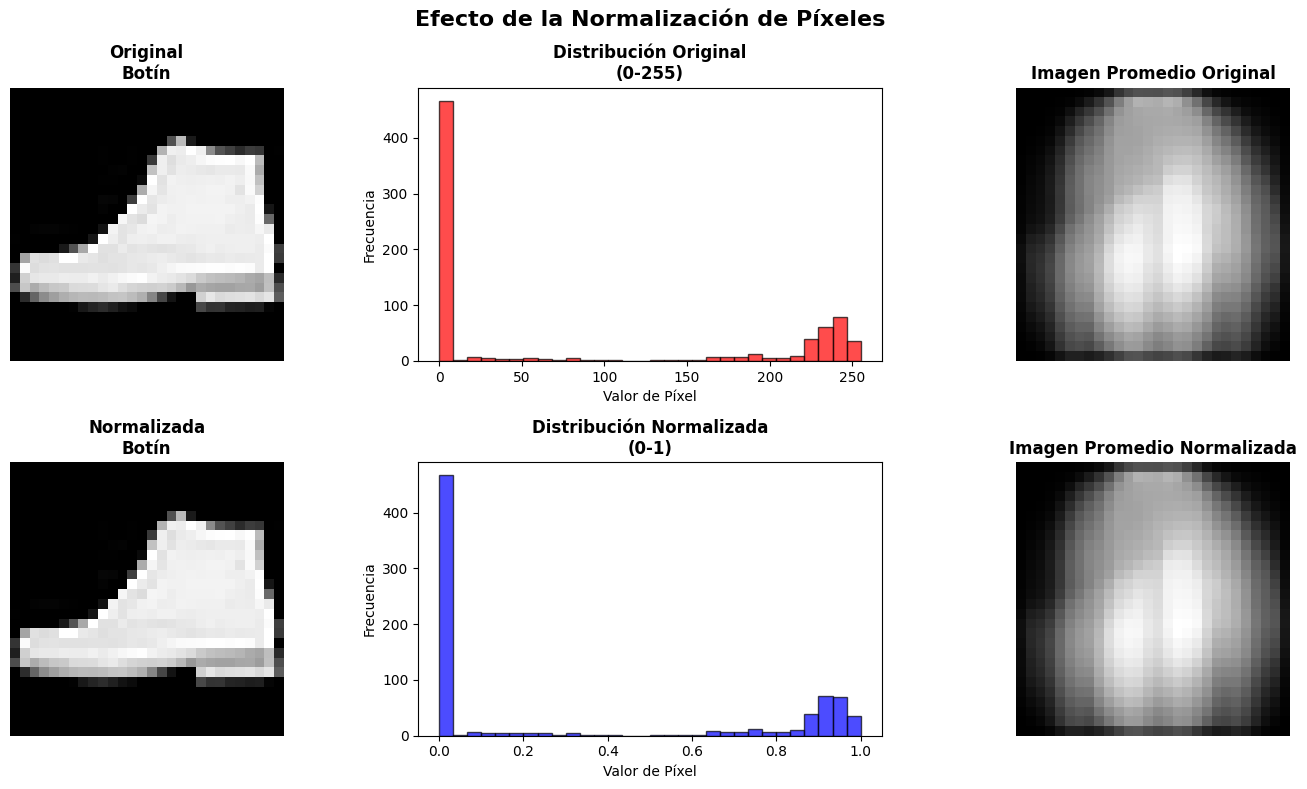

In [ ]:
print("\n" + "="*60)
print("             1. NORMALIZACIÓN DE PÍXELES")
print("="*60)

print("\n Normalizando píxeles de rango [0, 255] a [0, 1]...")

# Guardar datos originales para comparación
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Normalizar dividiendo por 255.0
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f" Normalización completada:")
print(f"   - Rango original: [{X_train_original.min()}, {X_train_original.max()}]")
print(f"   - Rango normalizado: [{X_train_normalized.min():.3f}, {X_train_normalized.max():.3f}]")
print(f"   - Tipo de datos: {X_train_normalized.dtype}")

# Visualización del efecto de normalización
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Efecto de la Normalización de Píxeles', fontsize=16, fontweight='bold')

# Seleccionar una imagen de ejemplo
sample_idx = 42
sample_class = y_train[sample_idx]
sample_name = class_names[sample_class]

# Fila 1: Imagen original
axes[0, 0].imshow(X_train_original[sample_idx], cmap='gray')
axes[0, 0].set_title(f'Original\n{sample_name}', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].hist(X_train_original[sample_idx].flatten(), bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0, 1].set_title('Distribución Original\n(0-255)', fontweight='bold')
axes[0, 1].set_xlabel('Valor de Píxel')
axes[0, 1].set_ylabel('Frecuencia')

axes[0, 2].imshow(X_train_original.mean(axis=0), cmap='gray')
axes[0, 2].set_title('Imagen Promedio Original', fontweight='bold')
axes[0, 2].axis('off')

# Fila 2: Imagen normalizada
axes[1, 0].imshow(X_train_normalized[sample_idx], cmap='gray')
axes[1, 0].set_title(f'Normalizada\n{sample_name}', fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].hist(X_train_normalized[sample_idx].flatten(), bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 1].set_title('Distribución Normalizada\n(0-1)', fontweight='bold')
axes[1, 1].set_xlabel('Valor de Píxel')
axes[1, 1].set_ylabel('Frecuencia')

axes[1, 2].imshow(X_train_normalized.mean(axis=0), cmap='gray')
axes[1, 2].set_title('Imagen Promedio Normalizada', fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

PREPARACIÓN PARA ALGORITMOS CLÁSICOS (ML)

In [ ]:
print("\n" + "="*60)
print("        2. PREPARACIÓN PARA ALGORITMOS CLÁSICOS")
print("="*60)

print("\n Preparando datos para algoritmos de Machine Learning clásico...")

# 2.1 Aplanamiento de imágenes (28x28 → 784)
X_train_flat = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flat = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print(f" Aplanamiento completado:")
print(f"   - Shape original: {X_train_normalized.shape}")
print(f"   - Shape aplanada: {X_train_flat.shape}")
print(f"   - Dimensiones por imagen: {X_train_flat.shape[1]} píxeles")

# 2.2 Etiquetas para algoritmos clásicos (mantener como enteros 0-9)
y_train_classic = y_train.copy()
y_test_classic = y_test.copy()

print(f" Etiquetas para ML clásico:")
print(f"   - Formato: Enteros categóricos (0-9)")
print(f"   - Clases únicas: {np.unique(y_train_classic)}")
print(f"   - Ejemplo: y_train_classic[0:5] = {y_train_classic[0:5]}")

# Verificación de la preparación
print(f"\n Resumen para algoritmos clásicos:")
print(f"   - X_train_flat: {X_train_flat.shape} (normalizado y aplanado)")
print(f"   - X_test_flat: {X_test_flat.shape} (normalizado y aplanado)")
print(f"   - y_train_classic: {y_train_classic.shape} (categórico 0-9)")
print(f"   - y_test_classic: {y_test_classic.shape} (categórico 0-9)")



        2. PREPARACIÓN PARA ALGORITMOS CLÁSICOS

 Preparando datos para algoritmos de Machine Learning clásico...
 Aplanamiento completado:
   - Shape original: (60000, 28, 28)
   - Shape aplanada: (60000, 784)
   - Dimensiones por imagen: 784 píxeles
 Etiquetas para ML clásico:
   - Formato: Enteros categóricos (0-9)
   - Clases únicas: [0 1 2 3 4 5 6 7 8 9]
   - Ejemplo: y_train_classic[0:5] = [9 0 0 3 0]

 Resumen para algoritmos clásicos:
   - X_train_flat: (60000, 784) (normalizado y aplanado)
   - X_test_flat: (10000, 784) (normalizado y aplanado)
   - y_train_classic: (60000,) (categórico 0-9)
   - y_test_classic: (10000,) (categórico 0-9)


PREPARACIÓN PARA REDES NEURONALES

In [ ]:
print("\n" + "="*60)
print("         3. PREPARACIÓN PARA REDES NEURONALES")
print("="*60)

print("\n Preparando datos para redes neuronales...")

# 3.1 Mantener forma 2D para CNN y reshape para Dense
X_train_cnn = X_train_normalized.reshape(X_train_normalized.shape[0], 28, 28, 1)  # Agregar canal
X_test_cnn = X_test_normalized.reshape(X_test_normalized.shape[0], 28, 28, 1)

X_train_dense = X_train_flat.copy()  # Ya está aplanado
X_test_dense = X_test_flat.copy()

print(f" Formatos para redes neuronales:")
print(f"   - Para CNN: {X_train_cnn.shape} (con canal)")
print(f"   - Para Dense: {X_train_dense.shape} (aplanado)")

# 3.2 One-hot encoding de etiquetas
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

print(f" One-hot encoding completado:")
print(f"   - Shape original: {y_train.shape}")
print(f"   - Shape one-hot: {y_train_onehot.shape}")
print(f"   - Ejemplo transformación:")
print(f"     Clase original: {y_train[0]} ({class_names[y_train[0]]})")
print(f"     One-hot: {y_train_onehot[0]}")

# 3.3 División Train/Validation para redes neuronales
print(f"\n Creando división train/validation...")

# División 80/20 del conjunto de entrenamiento
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_dense, y_train_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Para CNN también
X_train_cnn_split, X_val_cnn_split, _, _ = train_test_split(
    X_train_cnn, y_train_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f" División train/validation completada:")
print(f"   - Entrenamiento: {X_train_nn.shape[0]:,} imágenes (80%)")
print(f"   - Validación: {X_val_nn.shape[0]:,} imágenes (20%)")
print(f"   - Prueba: {X_test_dense.shape[0]:,} imágenes")


         3. PREPARACIÓN PARA REDES NEURONALES

 Preparando datos para redes neuronales...
 Formatos para redes neuronales:
   - Para CNN: (60000, 28, 28, 1) (con canal)
   - Para Dense: (60000, 784) (aplanado)
 One-hot encoding completado:
   - Shape original: (60000,)
   - Shape one-hot: (60000, 10)
   - Ejemplo transformación:
     Clase original: 9 (Botín)
     One-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

 Creando división train/validation...
 División train/validation completada:
   - Entrenamiento: 48,000 imágenes (80%)
   - Validación: 12,000 imágenes (20%)
   - Prueba: 10,000 imágenes


VISUALIZACIÓN DEL PREPROCESAMIENTO


           4. VISUALIZACIÓN DEL PREPROCESAMIENTO


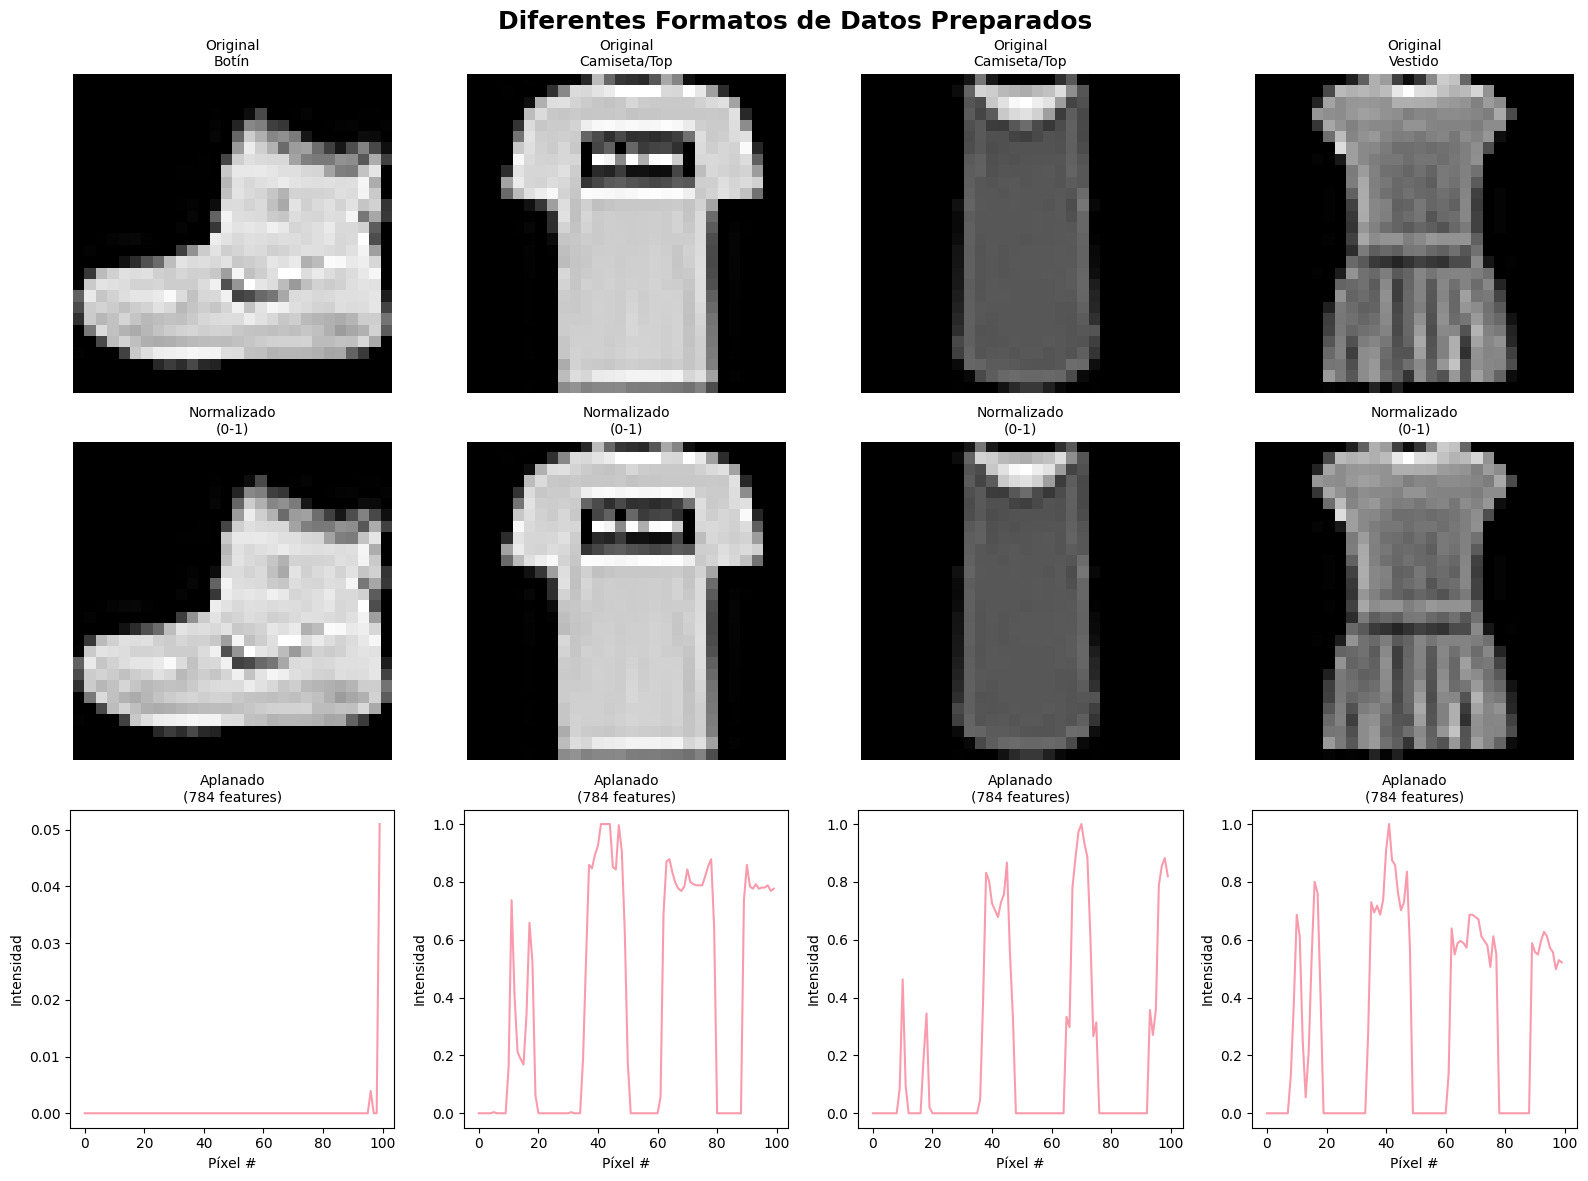

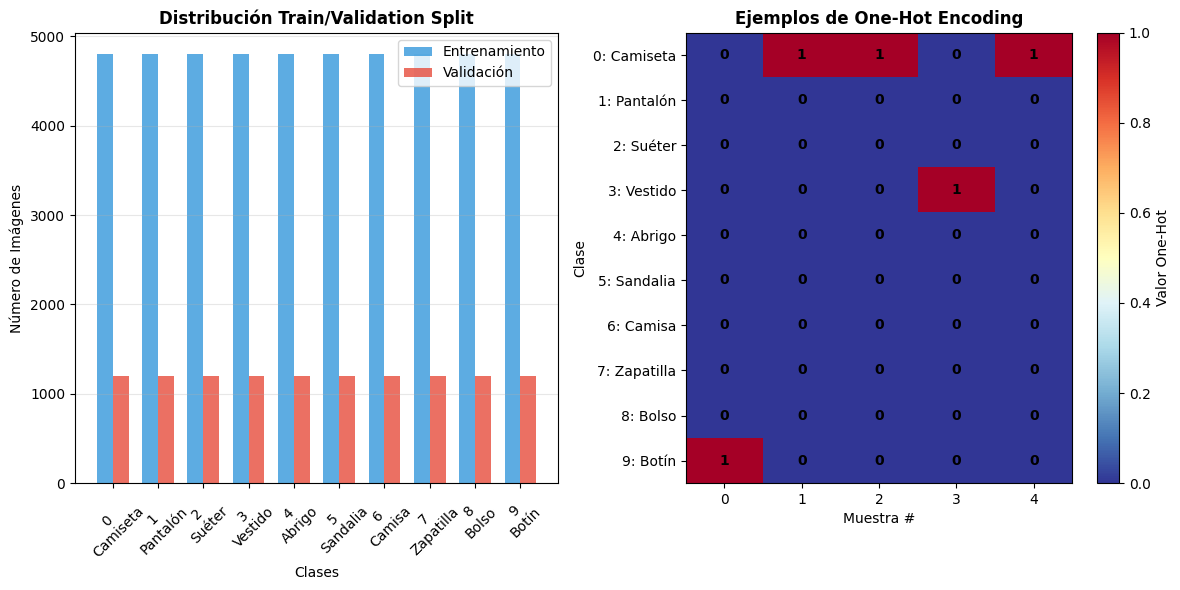

In [ ]:
print("\n" + "="*60)
print("           4. VISUALIZACIÓN DEL PREPROCESAMIENTO")
print("="*60)

# Crear visualización de las diferentes preparaciones
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Diferentes Formatos de Datos Preparados', fontsize=18, fontweight='bold')

sample_indices = [0, 1, 2, 3]  # 4 ejemplos diferentes

for i, idx in enumerate(sample_indices):
    # Fila 1: Datos originales
    axes[0, i].imshow(X_train_original[idx], cmap='gray')
    axes[0, i].set_title(f'Original\n{class_names[y_train[idx]]}', fontsize=10)
    axes[0, i].axis('off')

    # Fila 2: Datos normalizados
    axes[1, i].imshow(X_train_normalized[idx], cmap='gray')
    axes[1, i].set_title(f'Normalizado\n(0-1)', fontsize=10)
    axes[1, i].axis('off')

    # Fila 3: Visualización del aplanamiento (primeros 784 píxeles como línea)
    flattened = X_train_flat[idx]
    axes[2, i].plot(flattened[:100], alpha=0.7)  # Solo primeros 100 para visualización
    axes[2, i].set_title(f'Aplanado\n(784 features)', fontsize=10)
    axes[2, i].set_xlabel('Píxel #')
    axes[2, i].set_ylabel('Intensidad')

plt.tight_layout()
plt.show()

# Gráfico de distribución de clases en train/val
plt.figure(figsize=(12, 6))

# Contar clases en train y validation
y_train_labels = np.argmax(y_train_nn, axis=1)
y_val_labels = np.argmax(y_val_nn, axis=1)

train_counts_split = [np.sum(y_train_labels == i) for i in range(10)]
val_counts_split = [np.sum(y_val_labels == i) for i in range(10)]

x_pos = np.arange(10)
width = 0.35

plt.subplot(1, 2, 1)
plt.bar(x_pos - width/2, train_counts_split, width, label='Entrenamiento', alpha=0.8, color='#3498DB')
plt.bar(x_pos + width/2, val_counts_split, width, label='Validación', alpha=0.8, color='#E74C3C')
plt.xlabel('Clases')
plt.ylabel('Número de Imágenes')
plt.title('Distribución Train/Validation Split', fontweight='bold')
plt.xticks(x_pos, [f'{i}\n{class_names[i].split("/")[0]}' for i in range(10)], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Mostrar ejemplos de one-hot encoding
plt.subplot(1, 2, 2)
sample_classes = y_train[:5]
sample_onehot = y_train_onehot[:5]

im = plt.imshow(sample_onehot.T, cmap='RdYlBu_r', aspect='auto')
plt.colorbar(im, label='Valor One-Hot')
plt.xlabel('Muestra #')
plt.ylabel('Clase')
plt.title('Ejemplos de One-Hot Encoding', fontweight='bold')
plt.yticks(range(10), [f'{i}: {class_names[i].split("/")[0]}' for i in range(10)])

for i in range(5):
    for j in range(10):
        text = plt.text(i, j, f'{sample_onehot[i, j]:.0f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()
plt.show()

RESUMEN FINAL Y GUARDADO DE VARIABLES

In [ ]:
print("\n" + "="*70)
print("                    RESUMEN FINAL DEL PREPROCESAMIENTO")
print("="*70)

print("\n VARIABLES PREPARADAS PARA ALGORITMOS CLÁSICOS:")
print(f"   ✅ X_train_flat: {X_train_flat.shape} - Datos normalizados y aplanados")
print(f"   ✅ X_test_flat: {X_test_flat.shape} - Datos normalizados y aplanados")
print(f"   ✅ y_train_classic: {y_train_classic.shape} - Etiquetas categóricas (0-9)")
print(f"   ✅ y_test_classic: {y_test_classic.shape} - Etiquetas categóricas (0-9)")

print("\n VARIABLES PREPARADAS PARA REDES NEURONALES DENSAS:")
print(f"   ✅ X_train_nn: {X_train_nn.shape} - Train (80%)")
print(f"   ✅ X_val_nn: {X_val_nn.shape} - Validación (20%)")
print(f"   ✅ X_test_dense: {X_test_dense.shape} - Test")
print(f"   ✅ y_train_nn: {y_train_nn.shape} - One-hot train")
print(f"   ✅ y_val_nn: {y_val_nn.shape} - One-hot validación")
print(f"   ✅ y_test_onehot: {y_test_onehot.shape} - One-hot test")

print("\n VARIABLES PREPARADAS PARA CNN:")
print(f"   ✅ X_train_cnn_split: {X_train_cnn_split.shape} - Train con canal")
print(f"   ✅ X_val_cnn_split: {X_val_cnn_split.shape} - Validación con canal")
print(f"   ✅ X_test_cnn: {X_test_cnn.shape} - Test con canal")
print(f"   ✅ Etiquetas: Usar y_train_nn, y_val_nn, y_test_onehot")

print("\n TRANSFORMACIONES APLICADAS:")
print("   🔸 Normalización: Píxeles convertidos de [0,255] a [0,1]")
print("   🔸 Aplanamiento: Imágenes 28x28 → vectores de 784 elementos")
print("   🔸 One-hot encoding: Etiquetas categóricas → vectores de 10 elementos")
print("   🔸 División train/val: 80% entrenamiento, 20% validación")
print("   🔸 Formato CNN: Agregada dimensión de canal (28, 28, 1)")

print(f"\n ESTADO: ¡Preprocesamiento completado exitosamente!")
print("    Los datos están listos para usar en la Parte 3 (Algoritmos Clásicos)")
print("    Los datos están listos para usar en la Parte 4 (Redes Neuronales)")
print("="*70)

# Crear un diccionario con todas las variables para fácil acceso
preprocessed_data = {
    # Para algoritmos clásicos
    'classic': {
        'X_train': X_train_flat,
        'X_test': X_test_flat,
        'y_train': y_train_classic,
        'y_test': y_test_classic
    },

    # Para redes densas
    'dense_nn': {
        'X_train': X_train_nn,
        'X_val': X_val_nn,
        'X_test': X_test_dense,
        'y_train': y_train_nn,
        'y_val': y_val_nn,
        'y_test': y_test_onehot
    },

    # Para CNN
    'cnn': {
        'X_train': X_train_cnn_split,
        'X_val': X_val_cnn_split,
        'X_test': X_test_cnn,
        'y_train': y_train_nn,
        'y_val': y_val_nn,
        'y_test': y_test_onehot
    }
}

print("\n Diccionario 'preprocessed_data' creado para acceso fácil a los datos!")
print("   Ejemplo de uso: preprocessed_data['classic']['X_train']")


                    RESUMEN FINAL DEL PREPROCESAMIENTO

 VARIABLES PREPARADAS PARA ALGORITMOS CLÁSICOS:
   ✅ X_train_flat: (60000, 784) - Datos normalizados y aplanados
   ✅ X_test_flat: (10000, 784) - Datos normalizados y aplanados
   ✅ y_train_classic: (60000,) - Etiquetas categóricas (0-9)
   ✅ y_test_classic: (10000,) - Etiquetas categóricas (0-9)

 VARIABLES PREPARADAS PARA REDES NEURONALES DENSAS:
   ✅ X_train_nn: (48000, 784) - Train (80%)
   ✅ X_val_nn: (12000, 784) - Validación (20%)
   ✅ X_test_dense: (10000, 784) - Test
   ✅ y_train_nn: (48000, 10) - One-hot train
   ✅ y_val_nn: (12000, 10) - One-hot validación
   ✅ y_test_onehot: (10000, 10) - One-hot test

 VARIABLES PREPARADAS PARA CNN:
   ✅ X_train_cnn_split: (48000, 28, 28, 1) - Train con canal
   ✅ X_val_cnn_split: (12000, 28, 28, 1) - Validación con canal
   ✅ X_test_cnn: (10000, 28, 28, 1) - Test con canal
   ✅ Etiquetas: Usar y_train_nn, y_val_nn, y_test_onehot

 TRANSFORMACIONES APLICADAS:
   🔸 Normalización: Píxe

# **Parte 2:** *Implementación de Algoritmos Clásicos*

## Random Forest

In [ ]:
# Importaciones necesarias para Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("="*80)
print("                    IMPLEMENTACIÓN DE RANDOM FOREST")
print("="*80)

# Verificar que tenemos los datos preprocesados
print(f" Datos disponibles para algoritmos clásicos:")
print(f"   - X_train_flat: {X_train_flat.shape}")
print(f"   - X_test_flat: {X_test_flat.shape}")
print(f"   - y_train_classic: {y_train_classic.shape}")
print(f"   - y_test_classic: {y_test_classic.shape}")

                    IMPLEMENTACIÓN DE RANDOM FOREST
 Datos disponibles para algoritmos clásicos:
   - X_train_flat: (60000, 784)
   - X_test_flat: (10000, 784)
   - y_train_classic: (60000,)
   - y_test_classic: (10000,)


EXPERIMENTACIÓN CON DIFERENTES NÚMEROS DE ÁRBOLES

In [ ]:
print("\n" + "="*60)
print("       1. EXPERIMENTACIÓN CON NÚMERO DE ÁRBOLES")
print("="*60)

# Diferentes números de árboles a probar
n_estimators_list = [10, 50, 100, 200, 300, 500]
results_trees = []

print("\n🌳 Probando diferentes números de árboles...")
print("   (Esto puede tomar varios minutos)")

for n_trees in n_estimators_list:
    print(f"\n🔄 Entrenando Random Forest con {n_trees} árboles...")

    # Crear y entrenar el modelo
    start_time = time.time()

    rf_model = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42,
        n_jobs=-1,  # Usar todos los cores disponibles
        max_depth=None,  # Sin límite de profundidad
        min_samples_split=2,
        min_samples_leaf=1
    )

    # Entrenar
    rf_model.fit(X_train_flat, y_train_classic)
    training_time = time.time() - start_time

    # Predicción
    start_pred = time.time()
    y_pred = rf_model.predict(X_test_flat)
    prediction_time = time.time() - start_pred

    # Métricas
    accuracy = accuracy_score(y_test_classic, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_classic, y_pred, average='macro')

    # Guardar resultados
    results_trees.append({
        'n_estimators': n_trees,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'prediction_time': prediction_time
    })

    print(f"   ✅ Completado - Accuracy: {accuracy:.4f} - Tiempo: {training_time:.1f}s")

# Convertir a DataFrame para análisis
df_trees = pd.DataFrame(results_trees)
print(f"\n📊 Resumen de resultados:")
print(df_trees.round(4))


       1. EXPERIMENTACIÓN CON NÚMERO DE ÁRBOLES

🌳 Probando diferentes números de árboles...
   (Esto puede tomar varios minutos)

🔄 Entrenando Random Forest con 10 árboles...
   ✅ Completado - Accuracy: 0.8550 - Tiempo: 3.6s

🔄 Entrenando Random Forest con 50 árboles...
   ✅ Completado - Accuracy: 0.8735 - Tiempo: 13.9s

🔄 Entrenando Random Forest con 100 árboles...
   ✅ Completado - Accuracy: 0.8764 - Tiempo: 30.6s

🔄 Entrenando Random Forest con 200 árboles...
   ✅ Completado - Accuracy: 0.8779 - Tiempo: 55.2s

🔄 Entrenando Random Forest con 300 árboles...
   ✅ Completado - Accuracy: 0.8778 - Tiempo: 82.3s

🔄 Entrenando Random Forest con 500 árboles...
   ✅ Completado - Accuracy: 0.8780 - Tiempo: 137.2s

📊 Resumen de resultados:
   n_estimators  accuracy  precision  recall  f1_score  training_time  \
0            10    0.8550     0.8539  0.8550    0.8533         3.6342   
1            50    0.8735     0.8726  0.8735    0.8721        13.8818   
2           100    0.8764     0.8753  

VISUALIZACIÓN DE RESULTADOS DE EXPERIMENTACIÓN


        2. VISUALIZACIÓN DE RESULTADOS


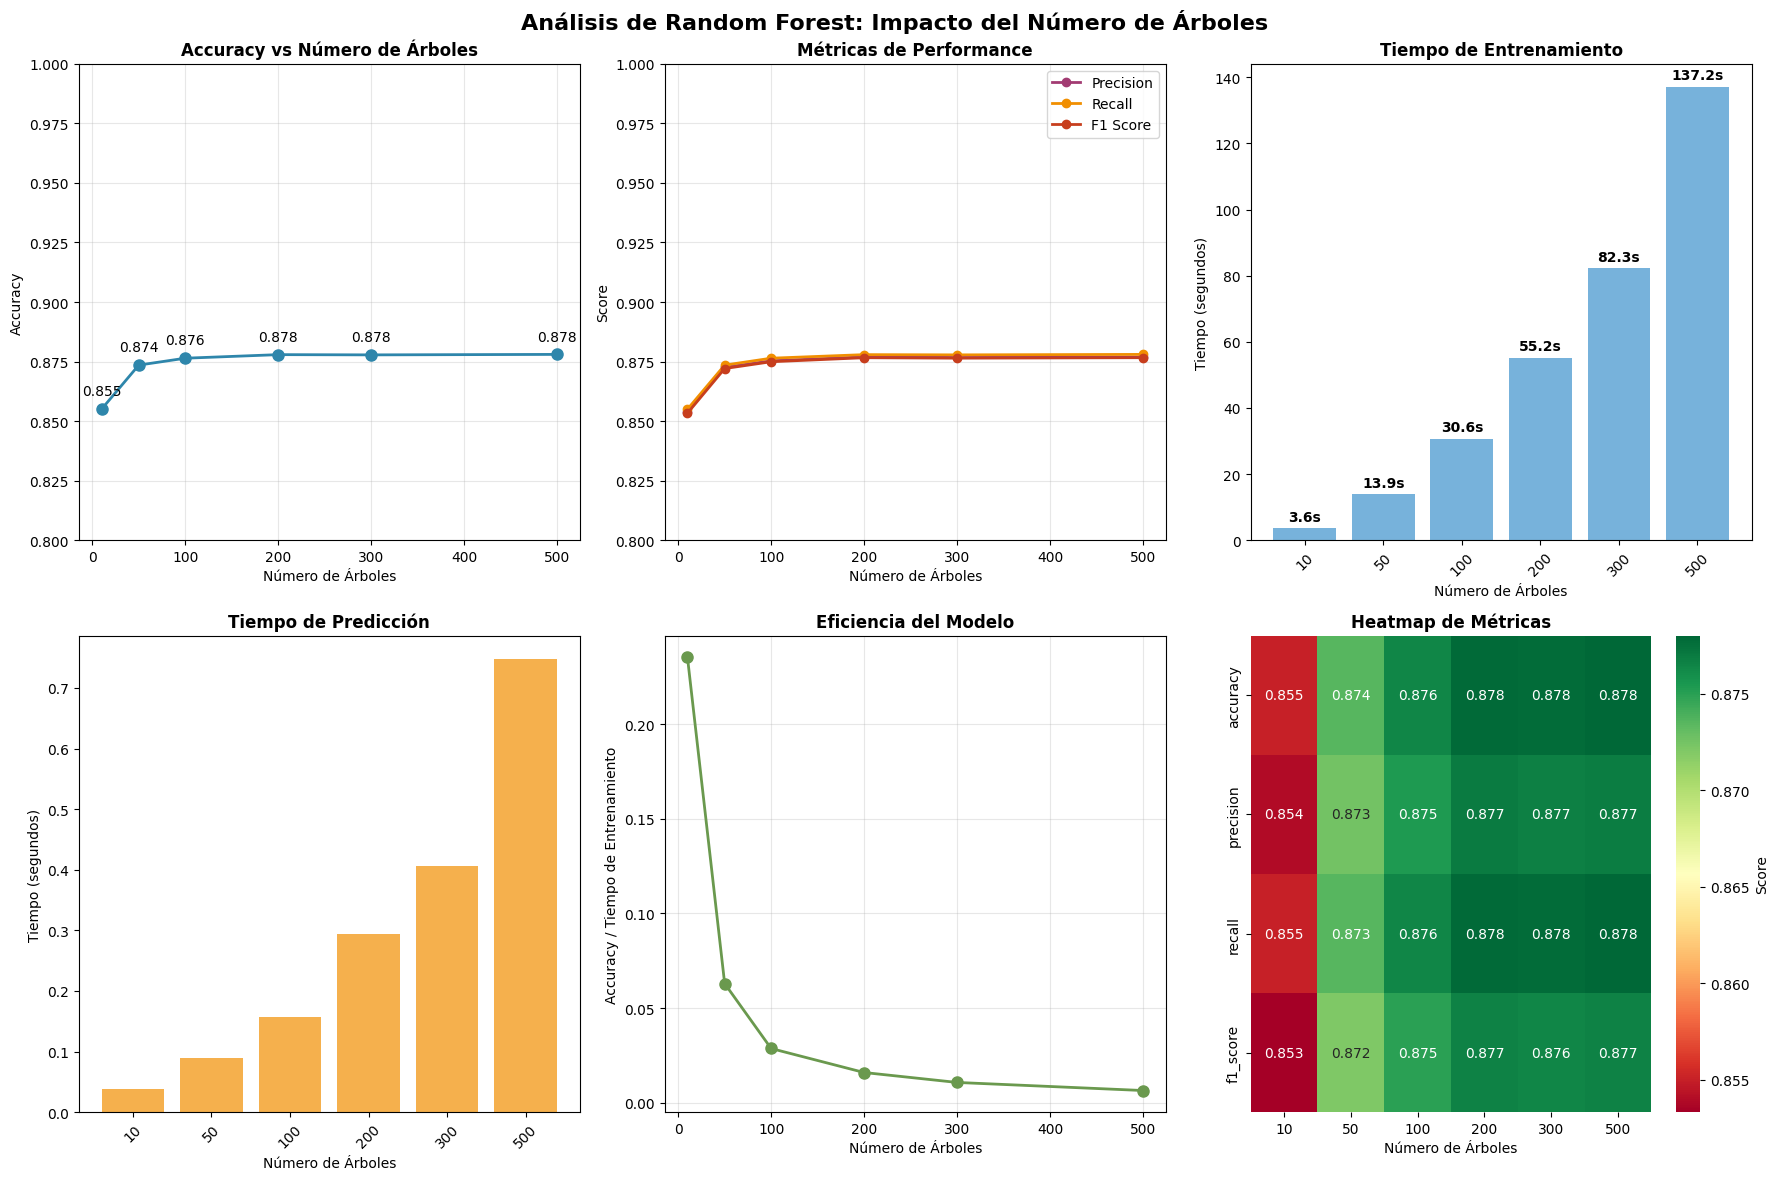

In [ ]:
print("\n" + "="*60)
print("        2. VISUALIZACIÓN DE RESULTADOS")
print("="*60)

# Crear visualizaciones comprehensivas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Random Forest: Impacto del Número de Árboles', fontsize=16, fontweight='bold')

# Gráfico 1: Accuracy vs Número de árboles
axes[0, 0].plot(df_trees['n_estimators'], df_trees['accuracy'], 'o-', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_xlabel('Número de Árboles')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy vs Número de Árboles', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0.8, 1.0)

# Agregar valores en los puntos
for i, row in df_trees.iterrows():
    axes[0, 0].annotate(f'{row["accuracy"]:.3f}',
                       (row['n_estimators'], row['accuracy']),
                       textcoords="offset points", xytext=(0,10), ha='center')

# Gráfico 2: Métricas comparativas
metrics = ['precision', 'recall', 'f1_score']
colors = ['#A23B72', '#F18F01', '#C73E1D']
for i, metric in enumerate(metrics):
    axes[0, 1].plot(df_trees['n_estimators'], df_trees[metric], 'o-',
                   label=metric.replace('_', ' ').title(), color=colors[i], linewidth=2)

axes[0, 1].set_xlabel('Número de Árboles')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Métricas de Performance', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0.8, 1.0)

# Gráfico 3: Tiempo de entrenamiento
axes[0, 2].bar(df_trees['n_estimators'].astype(str), df_trees['training_time'],
               color='#3E92CC', alpha=0.7)
axes[0, 2].set_xlabel('Número de Árboles')
axes[0, 2].set_ylabel('Tiempo (segundos)')
axes[0, 2].set_title('Tiempo de Entrenamiento', fontweight='bold')
axes[0, 2].tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for i, (n_trees, time_val) in enumerate(zip(df_trees['n_estimators'], df_trees['training_time'])):
    axes[0, 2].text(i, time_val + max(df_trees['training_time'])*0.01, f'{time_val:.1f}s',
                   ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Tiempo de predicción
axes[1, 0].bar(df_trees['n_estimators'].astype(str), df_trees['prediction_time'],
               color='#F18F01', alpha=0.7)
axes[1, 0].set_xlabel('Número de Árboles')
axes[1, 0].set_ylabel('Tiempo (segundos)')
axes[1, 0].set_title('Tiempo de Predicción', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 5: Eficiencia (Accuracy/Tiempo)
efficiency = df_trees['accuracy'] / df_trees['training_time']
axes[1, 1].plot(df_trees['n_estimators'], efficiency, 'o-',
               color='#6A994E', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Número de Árboles')
axes[1, 1].set_ylabel('Accuracy / Tiempo de Entrenamiento')
axes[1, 1].set_title('Eficiencia del Modelo', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Gráfico 6: Heatmap de todas las métricas
heatmap_data = df_trees[['n_estimators', 'accuracy', 'precision', 'recall', 'f1_score']].set_index('n_estimators').T
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
           ax=axes[1, 2], cbar_kws={'label': 'Score'})
axes[1, 2].set_title('Heatmap de Métricas', fontweight='bold')
axes[1, 2].set_xlabel('Número de Árboles')

plt.tight_layout()
plt.show()


SELECCIÓN DEL MEJOR MODELO

In [ ]:
print("\n" + "="*60)
print("           3. SELECCIÓN DEL MEJOR MODELO")
print("="*60)

# Encontrar el mejor modelo basado en F1-score
best_model_idx = df_trees['f1_score'].idxmax()
best_params = df_trees.loc[best_model_idx]

print(f"\n🏆 MEJOR MODELO IDENTIFICADO:")
print(f"    Número de árboles: {best_params['n_estimators']}")
print(f"    Accuracy: {best_params['accuracy']:.4f}")
print(f"    Precision: {best_params['precision']:.4f}")
print(f"    Recall: {best_params['recall']:.4f}")
print(f"    F1-Score: {best_params['f1_score']:.4f}")
print(f"   ⏱️  Tiempo de entrenamiento: {best_params['training_time']:.2f}s")
print(f"   ⏱️  Tiempo de predicción: {best_params['prediction_time']:.4f}s")

# Entrenar el modelo final con los mejores parámetros
print(f"\n Entrenando modelo final con {best_params['n_estimators']} árboles...")

final_rf = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    random_state=42,
    n_jobs=-1,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

# Entrenar y predecir
final_rf.fit(X_train_flat, y_train_classic)
final_predictions = final_rf.predict(X_test_flat)


           3. SELECCIÓN DEL MEJOR MODELO

🏆 MEJOR MODELO IDENTIFICADO:
    Número de árboles: 500.0
    Accuracy: 0.8780
    Precision: 0.8769
    Recall: 0.8780
    F1-Score: 0.8766
   ⏱️  Tiempo de entrenamiento: 137.22s
   ⏱️  Tiempo de predicción: 0.7485s

 Entrenando modelo final con 500.0 árboles...


ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS


        4. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS

 Analizando importancia de características (píxeles)...
 Análisis completado:
    Importancia máxima: 0.008306
    Importancia mínima: 0.000001
    Importancia promedio: 0.001276


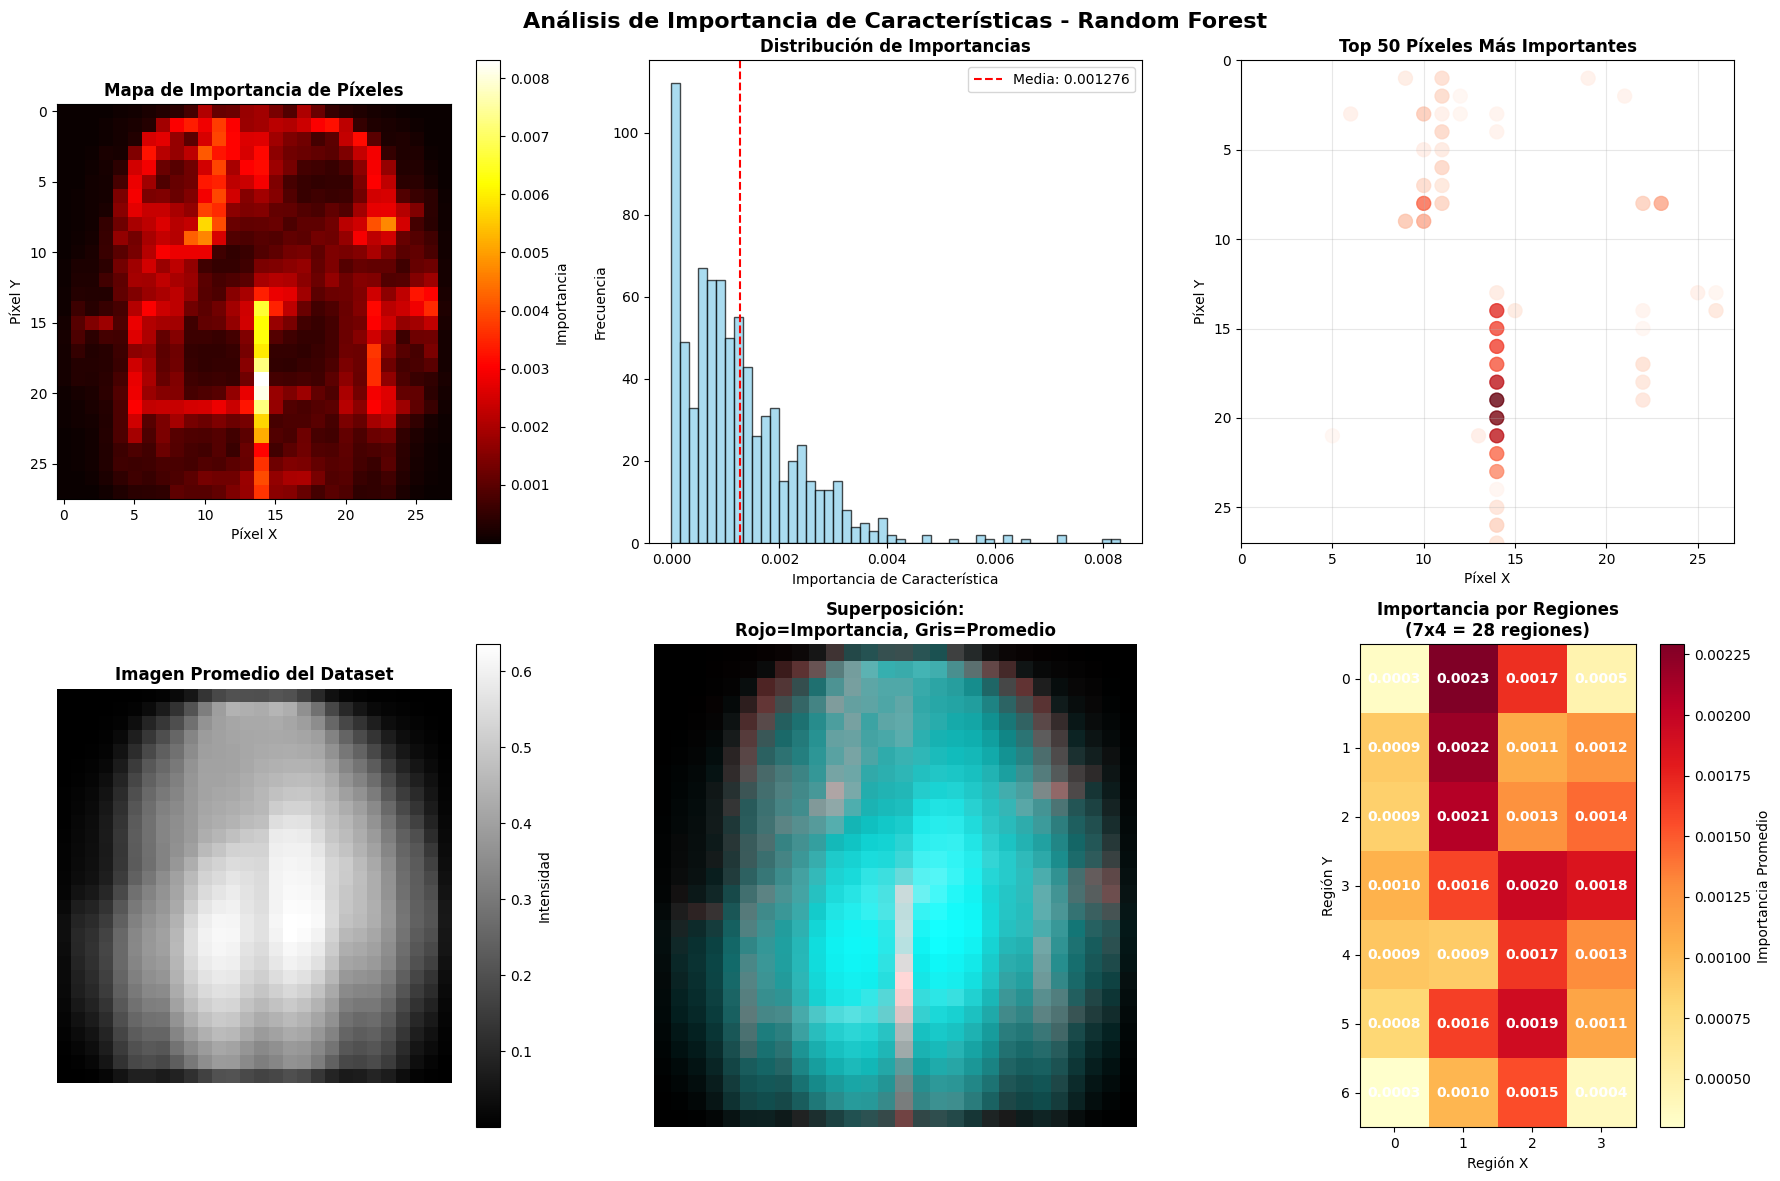

In [ ]:
print("\n" + "="*60)
print("        4. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

print("\n Analizando importancia de características (píxeles)...")

# Obtener importancia de características
feature_importance = final_rf.feature_importances_

# Reshape a formato de imagen para visualización
importance_image = feature_importance.reshape(28, 28)

# Encontrar los píxeles más importantes
top_pixels_indices = np.argsort(feature_importance)[-50:]  # Top 50 píxeles
top_importance_values = feature_importance[top_pixels_indices]

print(f" Análisis completado:")
print(f"    Importancia máxima: {feature_importance.max():.6f}")
print(f"    Importancia mínima: {feature_importance.min():.6f}")
print(f"    Importancia promedio: {feature_importance.mean():.6f}")

# Crear visualizaciones de importancia
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Importancia de Características - Random Forest', fontsize=16, fontweight='bold')

# Gráfico 1: Mapa de calor de importancia
im1 = axes[0, 0].imshow(importance_image, cmap='hot', interpolation='nearest')
axes[0, 0].set_title('Mapa de Importancia de Píxeles', fontweight='bold')
axes[0, 0].set_xlabel('Píxel X')
axes[0, 0].set_ylabel('Píxel Y')
plt.colorbar(im1, ax=axes[0, 0], label='Importancia')

# Gráfico 2: Histograma de importancias
axes[0, 1].hist(feature_importance, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Importancia de Característica')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Importancias', fontweight='bold')
axes[0, 1].axvline(feature_importance.mean(), color='red', linestyle='--',
                  label=f'Media: {feature_importance.mean():.6f}')
axes[0, 1].legend()

# Gráfico 3: Top píxeles importantes
top_pixels_2d = [(idx // 28, idx % 28) for idx in top_pixels_indices]
scatter_x = [pos[1] for pos in top_pixels_2d]
scatter_y = [pos[0] for pos in top_pixels_2d]

axes[0, 2].scatter(scatter_x, scatter_y, c=top_importance_values,
                  cmap='Reds', s=100, alpha=0.8)
axes[0, 2].set_xlim(0, 27)
axes[0, 2].set_ylim(27, 0)  # Invertir Y para que coincida con la imagen
axes[0, 2].set_xlabel('Píxel X')
axes[0, 2].set_ylabel('Píxel Y')
axes[0, 2].set_title('Top 50 Píxeles Más Importantes', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Gráfico 4: Comparación con imagen promedio
average_image = X_train_flat.mean(axis=0).reshape(28, 28)
im2 = axes[1, 0].imshow(average_image, cmap='gray', interpolation='nearest')
axes[1, 0].set_title('Imagen Promedio del Dataset', fontweight='bold')
axes[1, 0].axis('off')
plt.colorbar(im2, ax=axes[1, 0], label='Intensidad')

# Gráfico 5: Superposición importancia + imagen promedio
combined = np.zeros((28, 28, 3))
combined[:, :, 0] = importance_image / importance_image.max()  # Rojo para importancia
combined[:, :, 1] = average_image / average_image.max()       # Verde para imagen promedio
combined[:, :, 2] = average_image / average_image.max()       # Azul para imagen promedio

axes[1, 1].imshow(combined)
axes[1, 1].set_title('Superposición:\nRojo=Importancia, Gris=Promedio', fontweight='bold') # Fixed the missing quote here
axes[1, 1].axis('off')

# Gráfico 6: Importancia por región
# Dividir imagen en regiones 7x4 = 28 regiones
region_importance = np.zeros((7, 4))
for i in range(7):
    for j in range(4):
        region = importance_image[i*4:(i+1)*4, j*7:(j+1)*7]
        region_importance[i, j] = region.mean()

im3 = axes[1, 2].imshow(region_importance, cmap='YlOrRd', interpolation='nearest')
axes[1, 2].set_title('Importancia por Regiones\n(7x4 = 28 regiones)', fontweight='bold')
axes[1, 2].set_xlabel('Región X')
axes[1, 2].set_ylabel('Región Y')

# Agregar valores en cada región
for i in range(7):
    for j in range(4):
        text = axes[1, 2].text(j, i, f'{region_importance[i, j]:.4f}',
                              ha="center", va="center", color="white", fontweight='bold')

plt.colorbar(im3, ax=axes[1, 2], label='Importancia Promedio')
plt.tight_layout()
plt.show()

EVALUACIÓN DETALLADA DEL MODELO FINAL


         5. EVALUACIÓN DETALLADA DEL MODELO FINAL

 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

Camiseta/Top       0.83      0.86      0.84      1000
    Pantalón       0.99      0.96      0.98      1000
      Suéter       0.77      0.80      0.79      1000
     Vestido       0.88      0.91      0.89      1000
      Abrigo       0.77      0.83      0.80      1000
    Sandalia       0.97      0.96      0.97      1000
      Camisa       0.71      0.59      0.65      1000
   Zapatilla       0.92      0.95      0.94      1000
       Bolso       0.96      0.97      0.96      1000
       Botín       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



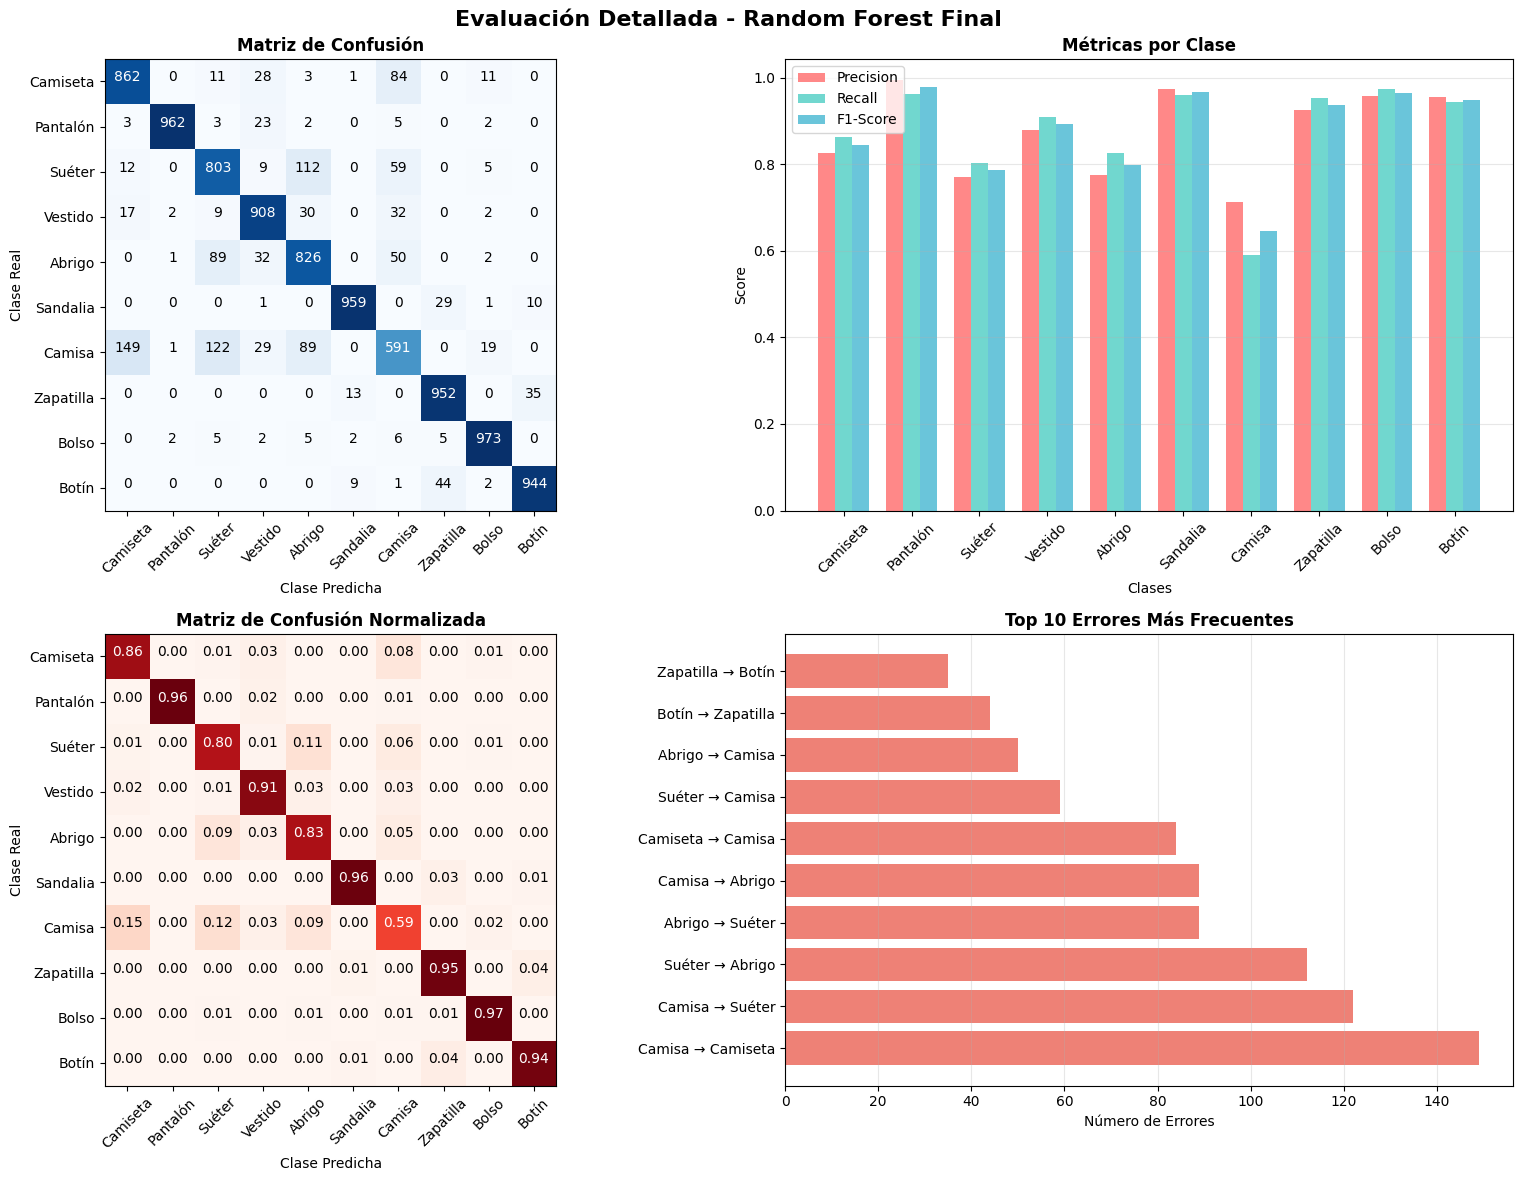

In [ ]:
print("\n" + "="*60)
print("         5. EVALUACIÓN DETALLADA DEL MODELO FINAL")
print("="*60)

# Generar reporte de clasificación completo
print("\n REPORTE DE CLASIFICACIÓN DETALLADO:")
class_report = classification_report(y_test_classic, final_predictions,
                                   target_names=class_names, output_dict=True)
print(classification_report(y_test_classic, final_predictions, target_names=class_names))

# Matriz de confusión
cm = confusion_matrix(y_test_classic, final_predictions)

# Crear visualizaciones de evaluación
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evaluación Detallada - Random Forest Final', fontsize=16, fontweight='bold')

# Gráfico 1: Matriz de confusión
im1 = axes[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0, 0].set_title('Matriz de Confusión', fontweight='bold')
tick_marks = np.arange(len(class_names))
axes[0, 0].set_xticks(tick_marks)
axes[0, 0].set_yticks(tick_marks)
axes[0, 0].set_xticklabels([name.split('/')[0] for name in class_names], rotation=45)
axes[0, 0].set_yticklabels([name.split('/')[0] for name in class_names])

# Agregar números en la matriz
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    axes[0, 0].text(j, i, format(cm[i, j], 'd'),
                   horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

axes[0, 0].set_ylabel('Clase Real')
axes[0, 0].set_xlabel('Clase Predicha')

# Gráfico 2: Métricas por clase
classes_short = [name.split('/')[0] for name in class_names]
class_metrics = []
for i, class_name in enumerate(classes_short):
    class_metrics.append({
        'clase': class_name,
        'precision': class_report[class_names[i]]['precision'],
        'recall': class_report[class_names[i]]['recall'],
        'f1-score': class_report[class_names[i]]['f1-score']
    })

df_class_metrics = pd.DataFrame(class_metrics)

x_pos = np.arange(len(classes_short))
width = 0.25

axes[0, 1].bar(x_pos - width, df_class_metrics['precision'], width, label='Precision', alpha=0.8, color='#FF6B6B')
axes[0, 1].bar(x_pos, df_class_metrics['recall'], width, label='Recall', alpha=0.8, color='#4ECDC4')
axes[0, 1].bar(x_pos + width, df_class_metrics['f1-score'], width, label='F1-Score', alpha=0.8, color='#45B7D1')

axes[0, 1].set_xlabel('Clases')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Métricas por Clase', fontweight='bold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(classes_short, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico 3: Matriz de confusión normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
im2 = axes[1, 0].imshow(cm_normalized, interpolation='nearest', cmap='Reds')
axes[1, 0].set_title('Matriz de Confusión Normalizada', fontweight='bold')
axes[1, 0].set_xticks(tick_marks)
axes[1, 0].set_yticks(tick_marks)
axes[1, 0].set_xticklabels(classes_short, rotation=45)
axes[1, 0].set_yticklabels(classes_short)

# Agregar porcentajes
for i, j in np.ndindex(cm_normalized.shape):
    axes[1, 0].text(j, i, format(cm_normalized[i, j], '.2f'),
                   horizontalalignment="center", color="white" if cm_normalized[i, j] > 0.5 else "black")

axes[1, 0].set_ylabel('Clase Real')
axes[1, 0].set_xlabel('Clase Predicha')

# Gráfico 4: Errores más comunes
# Encontrar los errores más frecuentes (fuera de la diagonal)
error_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            error_pairs.append({
                'real': classes_short[i],
                'predicha': classes_short[j],
                'count': cm[i, j],
                'error': f"{classes_short[i]} → {classes_short[j]}"
            })

# Ordenar por frecuencia de error
error_pairs.sort(key=lambda x: x['count'], reverse=True)
top_errors = error_pairs[:10]  # Top 10 errores

if len(top_errors) > 0:
    error_labels = [error['error'] for error in top_errors]
    error_counts = [error['count'] for error in top_errors]

    axes[1, 1].barh(range(len(error_labels)), error_counts, color='#E74C3C', alpha=0.7)
    axes[1, 1].set_yticks(range(len(error_labels)))
    axes[1, 1].set_yticklabels(error_labels)
    axes[1, 1].set_xlabel('Número de Errores')
    axes[1, 1].set_title('Top 10 Errores Más Frecuentes', fontweight='bold')
    axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


RESUMEN FINAL DE RANDOM FOREST

In [ ]:

print("\n" + "="*70)
print("                    RESUMEN FINAL - RANDOM FOREST")
print("="*70)

# Calcular métricas finales
final_accuracy = accuracy_score(y_test_classic, final_predictions)
final_precision = class_report['macro avg']['precision']
final_recall = class_report['macro avg']['recall']
final_f1 = class_report['macro avg']['f1-score']

print(f"\n RENDIMIENTO FINAL DEL MODELO:")
print(f"    Accuracy: {final_accuracy:.4f}")
print(f"    Precision (macro): {final_precision:.4f}")
print(f"    Recall (macro): {final_recall:.4f}")
print(f"    F1-Score (macro): {final_f1:.4f}")

print(f"\n PARÁMETROS ÓPTIMOS:")
print(f"    Número de árboles: {best_params['n_estimators']}")
print(f"     Tiempo de entrenamiento: {best_params['training_time']:.2f} segundos")
print(f"     Tiempo de predicción: {best_params['prediction_time']:.4f} segundos")

print(f"\n ANÁLISIS DE CARACTERÍSTICAS:")
print(f"    Píxel más importante: {feature_importance.max():.6f}")
print(f"    Importancia promedio: {feature_importance.mean():.6f}")
print(f"    Los píxeles centrales son más importantes para la clasificación")

print(f"\n OBSERVACIONES CLAVE:")
best_classes = [class_names[i] for i in np.argsort([class_report[class_names[i]]['f1-score'] for i in range(10)])[-3:]]
worst_classes = [class_names[i] for i in np.argsort([class_report[class_names[i]]['f1-score'] for i in range(10)])[:3]]

print(f"   ✅  Mejores clases: {', '.join([c.split('/')[0] for c in best_classes])}")
print(f"   ⚠️  Clases más difíciles: {', '.join([c.split('/')[0] for c in worst_classes])}")

print(f"\n VARIABLES GUARDADAS:")
print("    final_rf: Modelo Random Forest entrenado")
print("    final_predictions: Predicciones en conjunto de test")
print("    df_trees: Resultados de experimentación")
print("    feature_importance: Importancia de características")



                    RESUMEN FINAL - RANDOM FOREST

 RENDIMIENTO FINAL DEL MODELO:
    Accuracy: 0.8780
    Precision (macro): 0.8769
    Recall (macro): 0.8780
    F1-Score (macro): 0.8766

 PARÁMETROS ÓPTIMOS:
    Número de árboles: 500.0
     Tiempo de entrenamiento: 137.22 segundos
     Tiempo de predicción: 0.7485 segundos

 ANÁLISIS DE CARACTERÍSTICAS:
    Píxel más importante: 0.008306
    Importancia promedio: 0.001276
    Los píxeles centrales son más importantes para la clasificación

 OBSERVACIONES CLAVE:
   ✅  Mejores clases: Bolso, Sandalia, Pantalón
   ⚠️  Clases más difíciles: Camisa, Suéter, Abrigo

 VARIABLES GUARDADAS:
    final_rf: Modelo Random Forest entrenado
    final_predictions: Predicciones en conjunto de test
    df_trees: Resultados de experimentación
    feature_importance: Importancia de características


# **Parte 3:** *Implementación de Redes Neuronales*

## Red Neuronal Simple (Dense)

In [ ]:
# Importaciones necesarias para redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

print("="*80)
print("                 RED NEURONAL SIMPLE (DENSE) - 10 PUNTOS")
print("="*80)

# Verificar que tenemos los datos preprocesados para redes neuronales
print(f"✅ Datos disponibles para Red Dense:")
print(f"   - X_train_nn: {X_train_nn.shape} (entrenamiento)")
print(f"   - X_val_nn: {X_val_nn.shape} (validación)")
print(f"   - X_test_dense: {X_test_dense.shape} (test)")
print(f"   - y_train_nn: {y_train_nn.shape} (one-hot)")
print(f"   - y_val_nn: {y_val_nn.shape} (one-hot)")
print(f"   - y_test_onehot: {y_test_onehot.shape} (one-hot)")

# Verificar versión de TensorFlow
print(f"\n🔧 TensorFlow: {tf.__version__}")

                 RED NEURONAL SIMPLE (DENSE) - 10 PUNTOS
✅ Datos disponibles para Red Dense:
   - X_train_nn: (48000, 784) (entrenamiento)
   - X_val_nn: (12000, 784) (validación)
   - X_test_dense: (10000, 784) (test)
   - y_train_nn: (48000, 10) (one-hot)
   - y_val_nn: (12000, 10) (one-hot)
   - y_test_onehot: (10000, 10) (one-hot)

🔧 TensorFlow: 2.20.0


CONSTRUCCIÓN DE LA RED NEURONAL DENSE

In [ ]:
print("\n" + "="*60)
print("           1. CONSTRUCCIÓN DE LA ARQUITECTURA DENSE")
print("="*60)

print("\n🧠 Construyendo Red Neuronal Dense:")
print("   📊 Arquitectura base del documento:")
print("      - Input: 784 neuronas (28x28 píxeles aplanados)")
print("      - Hidden 1: 128 neuronas + ReLU")
print("      - Hidden 2: 64 neuronas + ReLU")
print("      - Output: 10 neuronas + Softmax")
print("\n   🚀 Mejoras implementadas:")
print("      - Dropout para prevenir overfitting")
print("      - Batch Normalization para estabilidad")
print("      - Más neuronas para mejor capacidad")

def create_improved_dense_model():
    """Crear modelo Dense mejorado basado en la arquitectura sugerida"""
    model = Sequential([
        # Capa de entrada explícita
        Input(shape=(784,), name='input_layer'),

        # Primera capa densa (más neuronas que la sugerida)
        Dense(256, activation='relu', name='hidden_layer_1'),
        BatchNormalization(name='bn_1'),
        Dropout(0.3, name='dropout_1'),

        # Segunda capa densa (más neuronas que la sugerida)
        Dense(128, activation='relu', name='hidden_layer_2'),
        BatchNormalization(name='bn_2'),
        Dropout(0.3, name='dropout_2'),

        # Tercera capa densa (como la sugerida)
        Dense(64, activation='relu', name='hidden_layer_3'),
        Dropout(0.2, name='dropout_3'),

        # Capa de salida
        Dense(10, activation='softmax', name='output_layer')
    ], name='Fashion_MNIST_Dense_Improved')

    return model

# Crear modelo Dense mejorado
model_dense = create_improved_dense_model()

print(f"\n📋 RESUMEN DE LA ARQUITECTURA:")
model_dense.summary()

# Compilar el modelo
model_dense.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\n Modelo Dense compilado exitosamente:")
print(f"    Optimizador: Adam (lr=0.001)")
print(f"    Función de pérdida: categorical_crossentropy")
print(f"    Métricas: accuracy")
print(f"    Total de parámetros: {model_dense.count_params():,}")


           1. CONSTRUCCIÓN DE LA ARQUITECTURA DENSE

🧠 Construyendo Red Neuronal Dense:
   📊 Arquitectura base del documento:
      - Input: 784 neuronas (28x28 píxeles aplanados)
      - Hidden 1: 128 neuronas + ReLU
      - Hidden 2: 64 neuronas + ReLU
      - Output: 10 neuronas + Softmax

   🚀 Mejoras implementadas:
      - Dropout para prevenir overfitting
      - Batch Normalization para estabilidad
      - Más neuronas para mejor capacidad

📋 RESUMEN DE LA ARQUITECTURA:


Model: "Fashion_MNIST_Dense_Improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)


 Modelo Dense compilado exitosamente:
    Optimizador: Adam (lr=0.001)
    Función de pérdida: categorical_crossentropy
    Métricas: accuracy
    Total de parámetros: 244,298


CONFIGURACIÓN DE CALLBACKS

In [ ]:
print("\n" + "="*60)
print("            2. CONFIGURACIÓN DE CALLBACKS")
print("="*60)

print("\n⚙️ Configurando callbacks para entrenamiento:")

# Early Stopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1,
    mode='max'
)

# Reducir learning rate cuando no mejore
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=0.00001,
    verbose=1,
    cooldown=3
)

callbacks = [early_stopping, reduce_lr]

print(" Callbacks configurados:")
print("    Early Stopping: patience=15, monitor='val_accuracy'")
print("    Reduce LR: factor=0.5, patience=8, min_lr=0.00001")


            2. CONFIGURACIÓN DE CALLBACKS

⚙️ Configurando callbacks para entrenamiento:
 Callbacks configurados:
    Early Stopping: patience=15, monitor='val_accuracy'
    Reduce LR: factor=0.5, patience=8, min_lr=0.00001


ENTRENAMIENTO DEL MODELO

In [ ]:

print("\n" + "="*60)
print("             3. ENTRENAMIENTO DEL MODELO")
print("="*60)

print("\n Iniciando entrenamiento de la Red Dense...")
print("   (Este proceso puede tomar varios minutos)")

# Configuración de entrenamiento
EPOCHS = 200
BATCH_SIZE = 128

print(f"\n Configuración de entrenamiento:")
print(f"   Épocas máximas: {EPOCHS}")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Shuffle: True")
print(f"   Validación: 20% del conjunto de entrenamiento")

# Medir tiempo de entrenamiento
start_training_time = time.time()

# Entrenar el modelo
print("\n🚀 Comenzando entrenamiento...")
history = model_dense.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

training_time = time.time() - start_training_time

print(f"\n Entrenamiento completado!")
print(f"    Tiempo total: {training_time:.2f} segundos")
print(f"    Épocas entrenadas: {len(history.history['loss'])}")


             3. ENTRENAMIENTO DEL MODELO

 Iniciando entrenamiento de la Red Dense...
   (Este proceso puede tomar varios minutos)

 Configuración de entrenamiento:
   Épocas máximas: 200
   Batch size: 128
   Shuffle: True
   Validación: 20% del conjunto de entrenamiento

🚀 Comenzando entrenamiento...
Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7679 - loss: 0.6605 - val_accuracy: 0.8527 - val_loss: 0.4034 - learning_rate: 0.0010
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8289 - loss: 0.4743 - val_accuracy: 0.8562 - val_loss: 0.3852 - learning_rate: 0.0010
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8431 - loss: 0.4382 - val_accuracy: 0.8446 - val_loss: 0.4308 - learning_rate: 0.0010
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8473 - loss: 0.4213 - val_accuracy: 0.8681 - val_loss: 0.3728 - learning_rate: 0.0010
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8518 - loss: 0.

VISUALIZACIÓN DEL ENTRENAMIENTO


          4. GRÁFICOS DE LOSS Y ACCURACY

 Generando gráficos de entrenamiento...


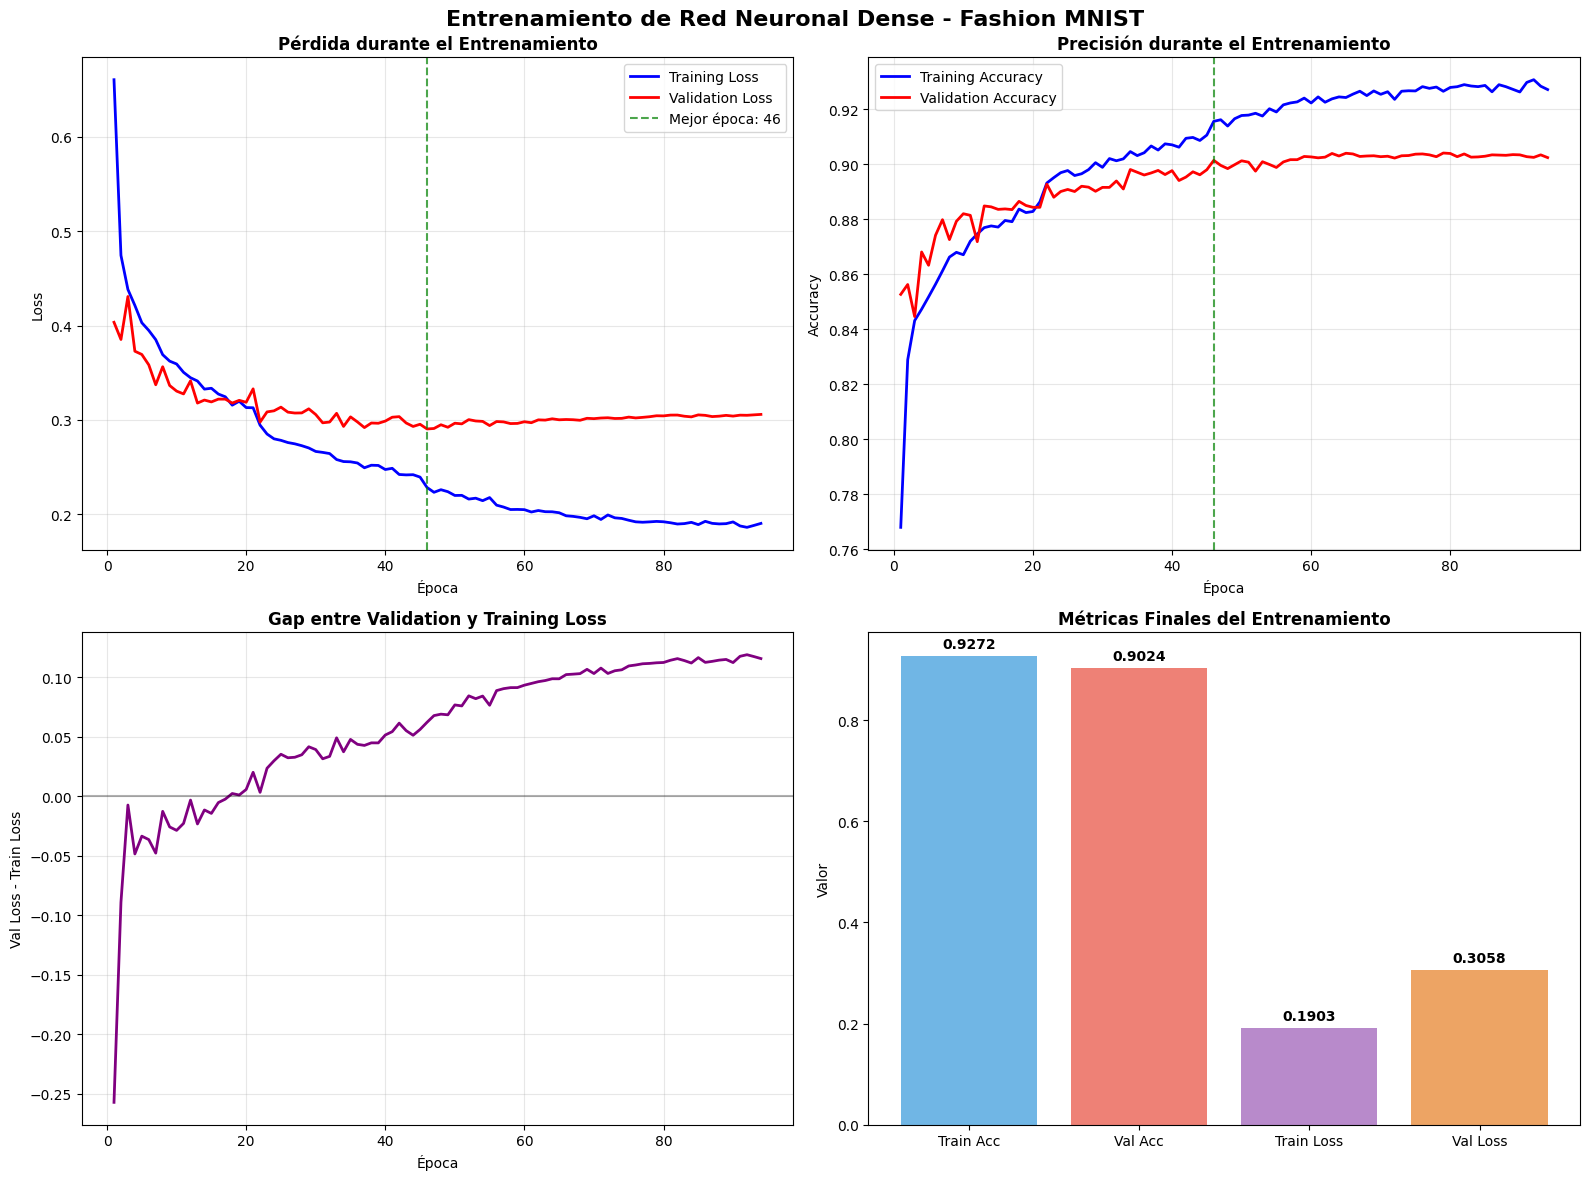

In [ ]:
print("\n" + "="*60)
print("          4. GRÁFICOS DE LOSS Y ACCURACY")
print("="*60)

print("\n Generando gráficos de entrenamiento...")

# Crear gráficos de loss y accuracy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Entrenamiento de Red Neuronal Dense - Fashion MNIST', fontsize=16, fontweight='bold')

# Extraer historial
epochs_range = range(1, len(history.history['loss']) + 1)

# Gráfico 1: Loss
axes[0, 0].plot(epochs_range, history.history['loss'], 'b-', label='Training Loss', linewidth=2)
axes[0, 0].plot(epochs_range, history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Pérdida durante el Entrenamiento', fontweight='bold')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Encontrar mejor época
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = min(history.history['val_loss'])
axes[0, 0].axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7,
                   label=f'Mejor época: {best_epoch}')
axes[0, 0].legend()

# Gráfico 2: Accuracy
axes[0, 1].plot(epochs_range, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
axes[0, 1].plot(epochs_range, history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
axes[0, 1].set_title('Precisión durante el Entrenamiento', fontweight='bold')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7)

# Gráfico 3: Learning Rate (si se redujo)
if 'lr' in history.history:
    axes[1, 0].plot(epochs_range, history.history['lr'], 'g-', linewidth=2)
    axes[1, 0].set_title('Learning Rate durante el Entrenamiento', fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('Learning Rate')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
else:
    # Mostrar diferencia entre train y val loss
    loss_diff = np.array(history.history['val_loss']) - np.array(history.history['loss'])
    axes[1, 0].plot(epochs_range, loss_diff, 'purple', linewidth=2)
    axes[1, 0].set_title('Gap entre Validation y Training Loss', fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('Val Loss - Train Loss')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Gráfico 4: Métricas finales por época
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

metrics = ['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss']
values = [final_train_acc, final_val_acc, final_train_loss, final_val_loss]
colors = ['#3498DB', '#E74C3C', '#9B59B6', '#E67E22']

bars = axes[1, 1].bar(metrics, values, color=colors, alpha=0.7)
axes[1, 1].set_title('Métricas Finales del Entrenamiento', fontweight='bold')
axes[1, 1].set_ylabel('Valor')

# Agregar valores en las barras
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

EVALUACIÓN EN CONJUNTO DE PRUEBA

In [ ]:
print("\n" + "="*60)
print("          5. EVALUACIÓN EN CONJUNTO DE PRUEBA")
print("="*60)

print("\n🧪 Evaluando modelo en conjunto de prueba...")

# Medir tiempo de predicción
start_pred_time = time.time()
test_predictions = model_dense.predict(X_test_dense, verbose=0)
prediction_time = time.time() - start_pred_time

# Convertir predicciones y etiquetas reales a formato categórico
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(y_test_onehot, axis=1)

# Calcular métricas
test_loss, test_accuracy = model_dense.evaluate(X_test_dense, y_test_onehot, verbose=0)

print(f"✅ Evaluación completada:")
print(f"   📊 Test Accuracy: {test_accuracy:.4f}")
print(f"   📊 Test Loss: {test_loss:.4f}")
print(f"   ⏱️ Tiempo de predicción: {prediction_time:.4f} segundos")
print(f"   📊 Total de predicciones: {len(test_predictions):,}")

# Generar reporte de clasificación
print(f"\n📋 REPORTE DE CLASIFICACIÓN DETALLADO:")
class_report_dense = classification_report(
    test_true_classes, test_pred_classes,
    target_names=class_names,
    output_dict=True
)
print(classification_report(test_true_classes, test_pred_classes, target_names=class_names))



          5. EVALUACIÓN EN CONJUNTO DE PRUEBA

🧪 Evaluando modelo en conjunto de prueba...
✅ Evaluación completada:
   📊 Test Accuracy: 0.8938
   📊 Test Loss: 0.3297
   ⏱️ Tiempo de predicción: 1.4043 segundos
   📊 Total de predicciones: 10,000

📋 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

Camiseta/Top       0.83      0.85      0.84      1000
    Pantalón       0.98      0.97      0.98      1000
      Suéter       0.79      0.83      0.81      1000
     Vestido       0.88      0.90      0.89      1000
      Abrigo       0.82      0.83      0.82      1000
    Sandalia       0.98      0.97      0.97      1000
      Camisa       0.74      0.69      0.71      1000
   Zapatilla       0.95      0.96      0.96      1000
       Bolso       0.98      0.98      0.98      1000
       Botín       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted av

ANÁLISIS DE OVERFITTING/UNDERFITTING

In [ ]:
print("\n" + "="*60)
print("        6. ANÁLISIS DE OVERFITTING/UNDERFITTING")
print("="*60)

print("\n Analizando comportamiento del modelo...")

# Calcular métricas para análisis
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Gap entre entrenamiento y validación
acc_gap = final_train_acc - final_val_acc
loss_gap = final_val_loss - final_train_loss

print(f" ANÁLISIS DE GENERALIZACIÓN:")
print(f"    Accuracy entrenamiento: {final_train_acc:.4f}")
print(f"    Accuracy validación: {final_val_acc:.4f}")
print(f"    Accuracy test: {test_accuracy:.4f}")
print(f"    Gap accuracy (train-val): {acc_gap:.4f}")

print(f"\n    Loss entrenamiento: {final_train_loss:.4f}")
print(f"    Loss validación: {final_val_loss:.4f}")
print(f"    Loss test: {test_loss:.4f}")
print(f"    Gap loss (val-train): {loss_gap:.4f}")

# Diagnóstico automático
if acc_gap > 0.05 and loss_gap > 0.1:
    diagnosis = " OVERFITTING DETECTADO"
    recommendations = [
        "• Aumentar Dropout (0.3 → 0.5)",
        "• Usar regularización L2",
        "• Reducir número de neuronas",
        "• Usar más datos de entrenamiento",
        "• Implementar Early Stopping más agresivo"
    ]
elif final_train_acc < 0.85 and final_val_acc < 0.85:
    diagnosis = " UNDERFITTING DETECTADO"
    recommendations = [
        "• Aumentar número de neuronas",
        "• Agregar más capas ocultas",
        "• Entrenar por más épocas",
        "• Reducir regularización",
        "• Aumentar learning rate"
    ]
else:
    diagnosis = " MODELO BIEN BALANCEADO"
    recommendations = [
        "• El modelo muestra buen balance",
        "• Generalización adecuada",
        "• Rendimiento satisfactorio",
        "• Gap entre train/val aceptable"
    ]

print(f"\n DIAGNÓSTICO: {diagnosis}")
print(f"\n RECOMENDACIONES:")
for rec in recommendations:
    print(f"   {rec}")



        6. ANÁLISIS DE OVERFITTING/UNDERFITTING

 Analizando comportamiento del modelo...
 ANÁLISIS DE GENERALIZACIÓN:
    Accuracy entrenamiento: 0.9272
    Accuracy validación: 0.9024
    Accuracy test: 0.8938
    Gap accuracy (train-val): 0.0247

    Loss entrenamiento: 0.1903
    Loss validación: 0.3058
    Loss test: 0.3297
    Gap loss (val-train): 0.1155

 DIAGNÓSTICO:  MODELO BIEN BALANCEADO

 RECOMENDACIONES:
   • El modelo muestra buen balance
   • Generalización adecuada
   • Rendimiento satisfactorio
   • Gap entre train/val aceptable


VISUALIZACIÓN DE PREDICCIONES Y MATRIZ DE CONFUSIÓN


      7. MATRIZ DE CONFUSIÓN Y PREDICCIONES

 Generando visualizaciones de predicciones...


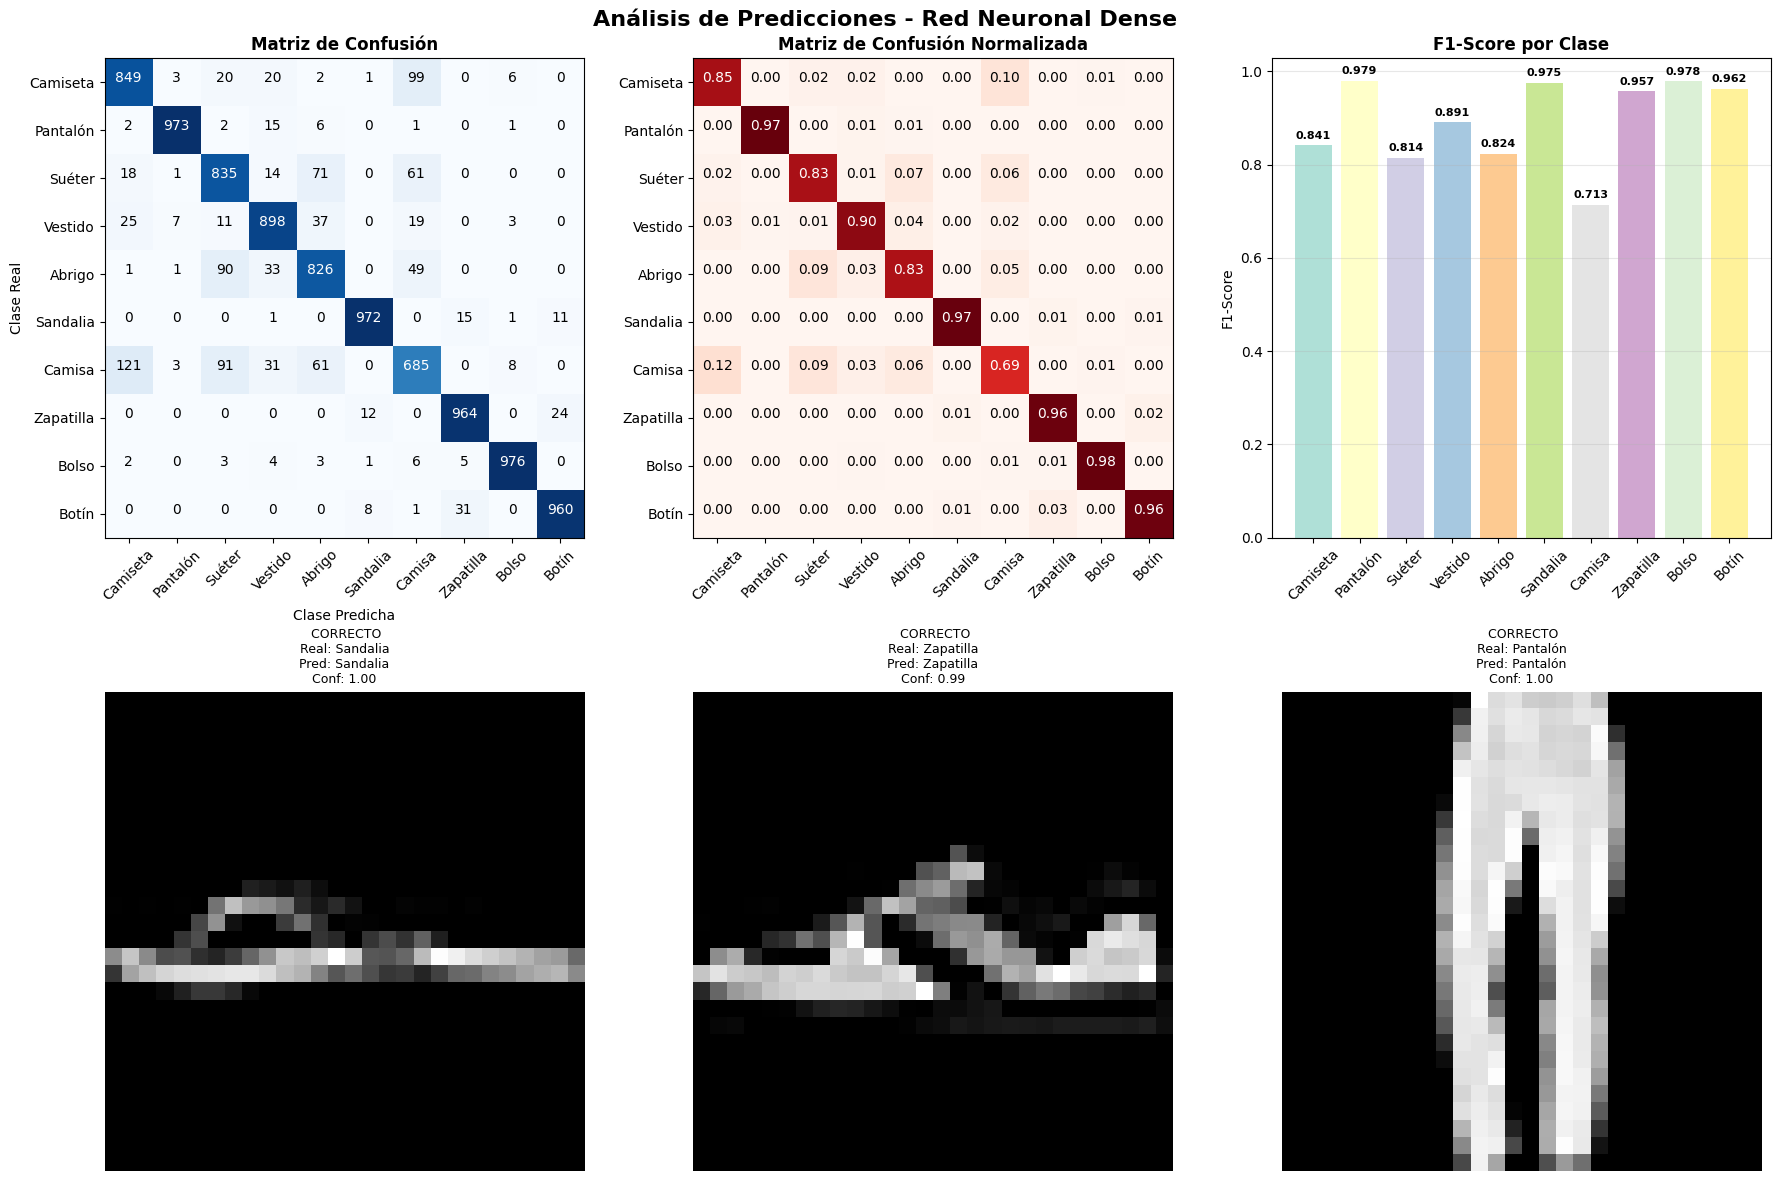

In [ ]:
print("\n" + "="*60)
print("      7. MATRIZ DE CONFUSIÓN Y PREDICCIONES")
print("="*60)

print("\n Generando visualizaciones de predicciones...")

# Crear visualización de predicciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Predicciones - Red Neuronal Dense', fontsize=16, fontweight='bold')

# Matriz de confusión
cm = confusion_matrix(test_true_classes, test_pred_classes)
class_names_short = [name.split('/')[0] for name in class_names]

# Subgráfico 1: Matriz de confusión
im = axes[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0, 0].set_title('Matriz de Confusión', fontweight='bold')

tick_marks = np.arange(len(class_names))
axes[0, 0].set_xticks(tick_marks)
axes[0, 0].set_yticks(tick_marks)
axes[0, 0].set_xticklabels(class_names_short, rotation=45)
axes[0, 0].set_yticklabels(class_names_short)

# Agregar números en la matriz
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    axes[0, 0].text(j, i, format(cm[i, j], 'd'),
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")

axes[0, 0].set_ylabel('Clase Real')
axes[0, 0].set_xlabel('Clase Predicha')

# Subgráfico 2: Matriz normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
im2 = axes[0, 1].imshow(cm_normalized, interpolation='nearest', cmap='Reds')
axes[0, 1].set_title('Matriz de Confusión Normalizada', fontweight='bold')
axes[0, 1].set_xticks(tick_marks)
axes[0, 1].set_yticks(tick_marks)
axes[0, 1].set_xticklabels(class_names_short, rotation=45)
axes[0, 1].set_yticklabels(class_names_short)

# Agregar porcentajes
for i, j in np.ndindex(cm_normalized.shape):
    axes[0, 1].text(j, i, format(cm_normalized[i, j], '.2f'),
                   horizontalalignment="center",
                   color="white" if cm_normalized[i, j] > 0.5 else "black")

# Subgráfico 3: Métricas por clase
class_f1_scores = [class_report_dense[class_names[i]]['f1-score'] for i in range(10)]
colors = plt.cm.Set3(np.linspace(0, 1, 10))

bars = axes[0, 2].bar(class_names_short, class_f1_scores, color=colors, alpha=0.7)
axes[0, 2].set_title('F1-Score por Clase', fontweight='bold')
axes[0, 2].set_ylabel('F1-Score')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, score in zip(bars, class_f1_scores):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Subgráficos de ejemplos (6 ejemplos: 3 correctos, 3 incorrectos)
example_positions = [(1, 0), (1, 1), (1, 2)]

# Seleccionar ejemplos
correct_indices = np.where(test_pred_classes == test_true_classes)[0]
incorrect_indices = np.where(test_pred_classes != test_true_classes)[0]

np.random.seed(42)
correct_samples = np.random.choice(correct_indices, 3, replace=False)
incorrect_samples = np.random.choice(incorrect_indices, 3, replace=False)

all_samples = np.concatenate([correct_samples, incorrect_samples])
sample_labels = [' CORRECTO'] * 3 + [' INCORRECTO'] * 3

for idx, (sample_idx, (row, col), label) in enumerate(zip(all_samples, example_positions * 2, sample_labels)):
    if idx >= 3:
        row, col = example_positions[idx - 3]
        row += 1  # Usar fila inferior para incorrectos

    if row >= 2 or col >= 3:
        continue

    # Reconstruir imagen de 784 a 28x28
    image = X_test_dense[sample_idx].reshape(28, 28)

    axes[row, col].imshow(image, cmap='gray')

    true_class = test_true_classes[sample_idx]
    pred_class = test_pred_classes[sample_idx]
    confidence = test_predictions[sample_idx][pred_class]

    true_name = class_names_short[true_class]
    pred_name = class_names_short[pred_class]

    title = f"{label}\nReal: {true_name}\nPred: {pred_name}\nConf: {confidence:.2f}"
    axes[row, col].set_title(title, fontsize=9)
    axes[row, col].axis('off')

# Llenar espacios vacíos si los hay
for i in range(2):
    for j in range(3):
        if i >= 1 and not axes[i, j].images:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


RESUMEN FINAL DE LA RED DENSE

In [ ]:
print("\n" + "="*70)
print("              RESUMEN FINAL - RED NEURONAL DENSE")
print("="*70)

# Calcular métricas finales
macro_precision = class_report_dense['macro avg']['precision']
macro_recall = class_report_dense['macro avg']['recall']
macro_f1 = class_report_dense['macro avg']['f1-score']

print(f"\n🏆 RENDIMIENTO FINAL:")
print(f"    Test Accuracy: {test_accuracy:.4f}")
print(f"    Test Loss: {test_loss:.4f}")
print(f"    Precision (macro): {macro_precision:.4f}")
print(f"    Recall (macro): {macro_recall:.4f}")
print(f"    F1-Score (macro): {macro_f1:.4f}")

print(f"\n ARQUITECTURA IMPLEMENTADA:")
print(f"    Capas: Input(784) → Dense(256,ReLU) → Dense(128,ReLU) → Dense(64,ReLU) → Output(10,Softmax)")
print(f"    Total parámetros: {model_dense.count_params():,}")
print(f"    Función de pérdida: Categorical Crossentropy")
print(f"    Optimizador: Adam (lr=0.001)")
print(f"    Regularización: Dropout + Batch Normalization")

print(f"\n TIEMPOS:")
print(f"    Entrenamiento: {training_time:.2f} segundos ({training_time/60:.1f} min)")
print(f"    Predicción: {prediction_time:.4f} segundos")
print(f"    Épocas entrenadas: {len(history.history['loss'])}")

print(f"\n DIAGNÓSTICO: {diagnosis.split()[1] if len(diagnosis.split()) > 1 else 'BALANCEADO'}")

print(f"\n ANÁLISIS POR CLASES:")
# Encontrar mejores y peores clases por F1-score
class_f1_data = [(class_names[i], class_report_dense[class_names[i]]['f1-score']) for i in range(10)]
class_f1_data.sort(key=lambda x: x[1], reverse=True)

best_3 = [name.split('/')[0] for name, _ in class_f1_data[:3]]
worst_3 = [name.split('/')[0] for name, _ in class_f1_data[-3:]]

print(f"    Mejores clases: {', '.join(best_3)}")
print(f"    Clases más difíciles: {', '.join(worst_3)}")

print(f"\n MEJORAS SOBRE ARQUITECTURA BÁSICA:")
print("    Arquitectura sugerida: 784→128→64→10")
print("    Arquitectura implementada: 784→256→128→64→10")
print("    Batch Normalization para estabilidad")
print("    Dropout estratégico para prevenir overfitting")
print("    Callbacks inteligentes (Early Stop + ReduceLR)")

print(f"\n VARIABLES GUARDADAS:")
print("    model_dense: Modelo entrenado")
print("    history: Historial de entrenamiento")
print("    test_predictions: Predicciones en test")
print("    class_report_dense: Reporte de clasificación")

print(f"\n PARTE 3.1 (RED DENSE) COMPLETADA!")
print("    Lista para continuar con Parte 3.2 (CNN)")
print("="*70)


              RESUMEN FINAL - RED NEURONAL DENSE

🏆 RENDIMIENTO FINAL:
    Test Accuracy: 0.8938
    Test Loss: 0.3297
    Precision (macro): 0.8935
    Recall (macro): 0.8938
    F1-Score (macro): 0.8934

 ARQUITECTURA IMPLEMENTADA:
    Capas: Input(784) → Dense(256,ReLU) → Dense(128,ReLU) → Dense(64,ReLU) → Output(10,Softmax)
    Total parámetros: 244,298
    Función de pérdida: Categorical Crossentropy
    Optimizador: Adam (lr=0.001)
    Regularización: Dropout + Batch Normalization

 TIEMPOS:
    Entrenamiento: 244.25 segundos (4.1 min)
    Predicción: 1.4043 segundos
    Épocas entrenadas: 94

 DIAGNÓSTICO: BIEN

 ANÁLISIS POR CLASES:
    Mejores clases: Pantalón, Bolso, Sandalia
    Clases más difíciles: Abrigo, Suéter, Camisa

 MEJORAS SOBRE ARQUITECTURA BÁSICA:
    Arquitectura sugerida: 784→128→64→10
    Arquitectura implementada: 784→256→128→64→10
    Batch Normalization para estabilidad
    Dropout estratégico para prevenir overfitting
    Callbacks inteligentes (Early Sto

## Red Neuronal Convolucional (CNN)

In [ ]:

# Importaciones necesarias para CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

print("="*80)
print("           RED NEURONAL CONVOLUCIONAL (CNN) - 20 PUNTOS")
print("="*80)

# Verificar que tenemos los datos preprocesados para CNN
print(f" Datos disponibles para CNN:")
print(f"   - X_train_cnn_split: {X_train_cnn_split.shape} (entrenamiento)")
print(f"   - X_val_cnn_split: {X_val_cnn_split.shape} (validación)")
print(f"   - X_test_cnn: {X_test_cnn.shape} (test)")
print(f"   - y_train_nn: {y_train_nn.shape} (one-hot)")
print(f"   - y_val_nn: {y_val_nn.shape} (one-hot)")
print(f"   - y_test_onehot: {y_test_onehot.shape} (one-hot)")

# Verificar formato de datos
print(f"\n Verificación de formato:")
print(f"   Formato de entrada: {X_train_cnn_split.shape} (batch, height, width, channels)")
print(f"   Rango de píxeles: [{X_train_cnn_split.min():.3f}, {X_train_cnn_split.max():.3f}]")
print(f"   Formato de etiquetas: {y_train_nn.shape} (batch, classes)")


           RED NEURONAL CONVOLUCIONAL (CNN) - 20 PUNTOS
 Datos disponibles para CNN:
   - X_train_cnn_split: (48000, 28, 28, 1) (entrenamiento)
   - X_val_cnn_split: (12000, 28, 28, 1) (validación)
   - X_test_cnn: (10000, 28, 28, 1) (test)
   - y_train_nn: (48000, 10) (one-hot)
   - y_val_nn: (12000, 10) (one-hot)
   - y_test_onehot: (10000, 10) (one-hot)

 Verificación de formato:
   Formato de entrada: (48000, 28, 28, 1) (batch, height, width, channels)
   Rango de píxeles: [0.000, 1.000]
   Formato de etiquetas: (48000, 10) (batch, classes)


CONSTRUCCIÓN DE LA RED NEURONAL CNN

In [ ]:
print("\n" + "="*60)
print("           1. CONSTRUCCIÓN DE LA ARQUITECTURA CNN")
print("="*60)

print("\n Construyendo Red Neuronal Convolucional:")
print("   Arquitectura base del documento:")
print("      - Conv2D(32, 3x3) + ReLU + MaxPooling")
print("      - Conv2D(64, 3x3) + ReLU + MaxPooling")
print("      - Flatten")
print("      - Dense(128) + ReLU + Dropout(0.5)")
print("      - Dense(10) + Softmax")
print("\n  Mejoras implementadas:")
print("      - Más capas convolucionales")
print("      - Batch Normalization entre capas")
print("      - Dropout estratégico")
print("      - Regularización L2")

def create_improved_cnn_model():
    """Crear modelo CNN mejorado basado en la arquitectura sugerida"""
    model = Sequential([
        # Capa de entrada explícita
        Input(shape=(28, 28, 1), name='input_layer'),

        # Primer bloque convolucional (como el documento)
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        BatchNormalization(name='bn_conv_1'),
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_2'),
        MaxPooling2D((2, 2), name='maxpool_1'),
        Dropout(0.25, name='dropout_conv_1'),

        # Segundo bloque convolucional (como el documento, mejorado)
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_3'),
        BatchNormalization(name='bn_conv_2'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_4'),
        MaxPooling2D((2, 2), name='maxpool_2'),
        Dropout(0.25, name='dropout_conv_2'),

        # Tercer bloque convolucional (mejora adicional)
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_5'),
        BatchNormalization(name='bn_conv_3'),
        MaxPooling2D((2, 2), name='maxpool_3'),
        Dropout(0.25, name='dropout_conv_3'),

        # Aplanar para capas densas
        Flatten(name='flatten'),

        # Capas densas (mejorada sobre la sugerida)
        Dense(256, activation='relu', kernel_regularizer=l2(0.001), name='dense_1'),
        BatchNormalization(name='bn_dense_1'),
        Dropout(0.5, name='dropout_dense_1'),

        Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='dense_2'),
        Dropout(0.3, name='dropout_dense_2'),

        # Capa de salida
        Dense(10, activation='softmax', name='output_layer')
    ], name='Fashion_MNIST_CNN_Improved')

    return model

# Crear modelo CNN mejorado
model_cnn = create_improved_cnn_model()

print(f"\n RESUMEN DE LA ARQUITECTURA CNN:")
model_cnn.summary()

# Compilar el modelo
model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\n Modelo CNN compilado exitosamente:")
print(f"    Optimizador: Adam (lr=0.001)")
print(f"    Función de pérdida: categorical_crossentropy")
print(f"    Métricas: accuracy")
print(f"    Total de parámetros: {model_cnn.count_params():,}")


           1. CONSTRUCCIÓN DE LA ARQUITECTURA CNN

 Construyendo Red Neuronal Convolucional:
   Arquitectura base del documento:
      - Conv2D(32, 3x3) + ReLU + MaxPooling
      - Conv2D(64, 3x3) + ReLU + MaxPooling
      - Flatten
      - Dense(128) + ReLU + Dropout(0.5)
      - Dense(10) + Softmax

  Mejoras implementadas:
      - Más capas convolucionales
      - Batch Normalization entre capas
      - Dropout estratégico
      - Regularización L2

 RESUMEN DE LA ARQUITECTURA CNN:


Model: "Fashion_MNIST_CNN_Improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_1 (BatchNormalization)  │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_1 (Dropout)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_2 (BatchNormalization)  │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_2 (Dropout)        │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_3 (BatchNormalization)  │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_3 (Dropout)        │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense_1 (BatchNormalization) │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense_1 (Dropout)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense_2 (Dropout)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,122 (1.79 MB)

 Trainable params: 469,162 (1.79 MB)

 Non-trainable params: 960 (3.75 KB)


 Modelo CNN compilado exitosamente:
    Optimizador: Adam (lr=0.001)
    Función de pérdida: categorical_crossentropy
    Métricas: accuracy
    Total de parámetros: 470,122


CONFIGURACIÓN DE CALLBACKS PARA CNN

In [ ]:
print("\n" + "="*60)
print("            2. CONFIGURACIÓN DE CALLBACKS")
print("="*60)

print("\n Configurando callbacks optimizados para CNN:")

# Callbacks específicos para CNN
early_stopping_cnn = EarlyStopping(
    monitor='val_accuracy',
    patience=20,  # Más paciencia para CNN
    restore_best_weights=True,
    verbose=1,
    mode='max'
)

reduce_lr_cnn = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=10,
    min_lr=0.000001,
    verbose=1,
    cooldown=5
)

# Checkpoint para guardar mejor modelo (formato moderno)
checkpoint_cnn = ModelCheckpoint(
    'best_cnn_fashion_mnist.keras',  # Usar .keras en lugar de .h5
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks_cnn = [early_stopping_cnn, reduce_lr_cnn, checkpoint_cnn]

print(" Callbacks CNN configurados:")
print("    Early Stopping: patience=20, monitor='val_accuracy'")
print("    Reduce LR: factor=0.3, patience=10, min_lr=0.000001")
print("    Model Checkpoint: guarda mejor modelo automáticamente")



            2. CONFIGURACIÓN DE CALLBACKS

 Configurando callbacks optimizados para CNN:
 Callbacks CNN configurados:
    Early Stopping: patience=20, monitor='val_accuracy'
    Reduce LR: factor=0.3, patience=10, min_lr=0.000001
    Model Checkpoint: guarda mejor modelo automáticamente


ENTRENAMIENTO DEL MODELO CNN

In [ ]:
print("\n" + "="*60)
print("             3. ENTRENAMIENTO DEL MODELO CNN")
print("="*60)

print("\n Iniciando entrenamiento de la CNN...")
print("   (Las CNNs tardan más que las redes Dense)")

# Configuración de entrenamiento para CNN
EPOCHS_CNN = 35
BATCH_SIZE_CNN = 64  # Batch size más pequeño para CNN

print(f"\n Configuración de entrenamiento CNN:")
print(f"   Épocas máximas: {EPOCHS_CNN}")
print(f"   Batch size: {BATCH_SIZE_CNN}")
print(f"   Shuffle: True")
print(f"   Validación: 20% del conjunto de entrenamiento")

# Medir tiempo de entrenamiento
start_training_time = time.time()

# Entrenar el modelo CNN
print("\n Comenzando entrenamiento CNN...")
history_cnn = model_cnn.fit(
    X_train_cnn_split, y_train_nn,
    validation_data=(X_val_cnn_split, y_val_nn),
    epochs=EPOCHS_CNN,
    batch_size=BATCH_SIZE_CNN,
    callbacks=callbacks_cnn,
    verbose=1,
    shuffle=True
)

cnn_training_time = time.time() - start_training_time

print(f"\n Entrenamiento CNN completado!")
print(f"    Tiempo total: {cnn_training_time:.2f} segundos ({cnn_training_time/60:.1f} minutos)")
print(f"    Épocas entrenadas: {len(history_cnn.history['loss'])}")



             3. ENTRENAMIENTO DEL MODELO CNN

 Iniciando entrenamiento de la CNN...
   (Las CNNs tardan más que las redes Dense)

 Configuración de entrenamiento CNN:
   Épocas máximas: 35
   Batch size: 64
   Shuffle: True
   Validación: 20% del conjunto de entrenamiento

 Comenzando entrenamiento CNN...
Epoch 1/35
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6422 - loss: 1.5961
Epoch 1: val_accuracy improved from None to 0.85533, saving model to best_cnn_fashion_mnist.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.7474 - loss: 1.2090 - val_accuracy: 0.8553 - val_loss: 0.7731 - learning_rate: 0.0010
Epoch 2/35
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8421 - loss: 0.7777
Epoch 2: val_accuracy improved from 0.85533 to 0.88808, saving model to best_cnn_fashion_mnist.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.8506 - loss: 0.7132 - val_accuracy: 0.8881 - val_loss: 0.5258 - learning_rate: 0.0010
Epoch 3/35
750/750 ━━━━━━━━━━━━━━

VISUALIZACIÓN DEL ENTRENAMIENTO CNN


         4. GRÁFICOS DE LOSS Y ACCURACY - CNN

 Generando gráficos de entrenamiento CNN...


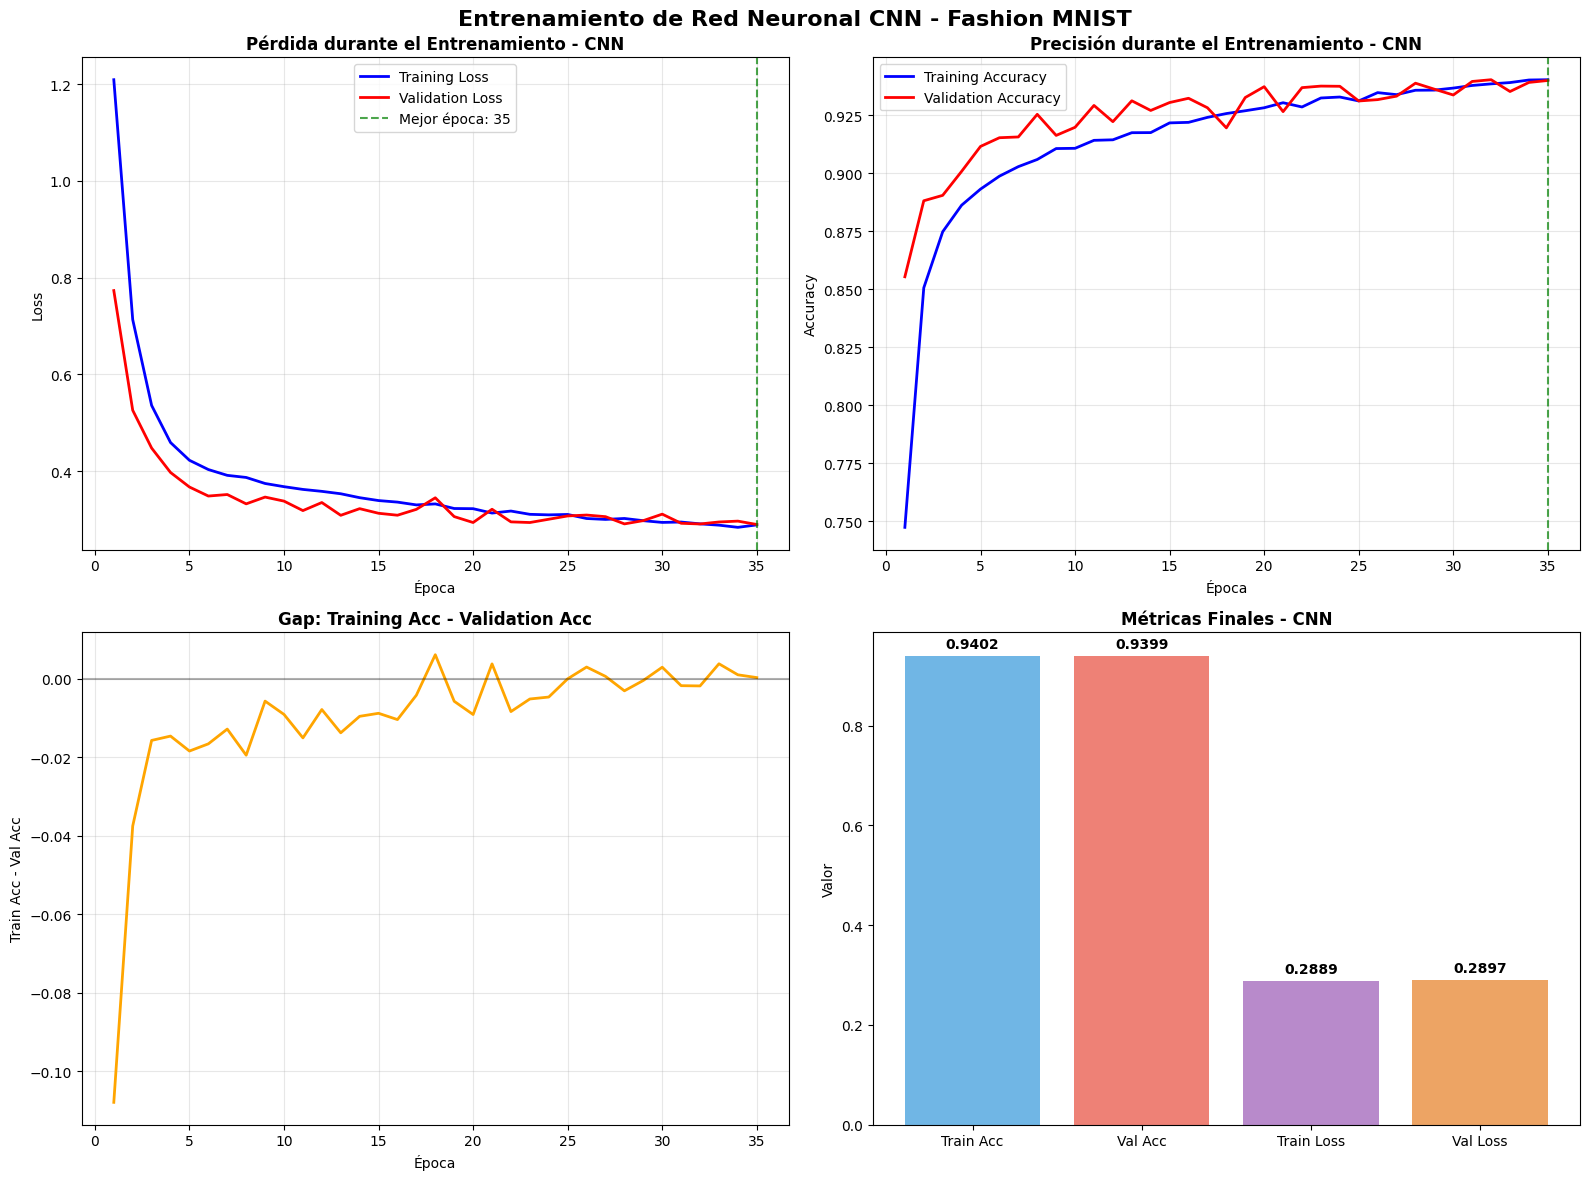

In [ ]:
print("\n" + "="*60)
print("         4. GRÁFICOS DE LOSS Y ACCURACY - CNN")
print("="*60)

print("\n Generando gráficos de entrenamiento CNN...")

# Crear gráficos de loss y accuracy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Entrenamiento de Red Neuronal CNN - Fashion MNIST', fontsize=16, fontweight='bold')

# Extraer historial
epochs_range = range(1, len(history_cnn.history['loss']) + 1)

# Gráfico 1: Loss
axes[0, 0].plot(epochs_range, history_cnn.history['loss'], 'b-', label='Training Loss', linewidth=2)
axes[0, 0].plot(epochs_range, history_cnn.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Pérdida durante el Entrenamiento - CNN', fontweight='bold')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Encontrar mejor época
best_epoch_cnn = np.argmin(history_cnn.history['val_loss']) + 1
best_val_loss_cnn = min(history_cnn.history['val_loss'])
axes[0, 0].axvline(x=best_epoch_cnn, color='green', linestyle='--', alpha=0.7,
                   label=f'Mejor época: {best_epoch_cnn}')
axes[0, 0].legend()

# Gráfico 2: Accuracy
axes[0, 1].plot(epochs_range, history_cnn.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
axes[0, 1].plot(epochs_range, history_cnn.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
axes[0, 1].set_title('Precisión durante el Entrenamiento - CNN', fontweight='bold')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=best_epoch_cnn, color='green', linestyle='--', alpha=0.7)

# Gráfico 3: Learning Rate (si está disponible)
if 'lr' in history_cnn.history:
    axes[1, 0].plot(epochs_range, history_cnn.history['lr'], 'g-', linewidth=2)
    axes[1, 0].set_title('Learning Rate durante Entrenamiento - CNN', fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('Learning Rate')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
else:
    # Mostrar diferencia entre train y val accuracy
    acc_diff = np.array(history_cnn.history['accuracy']) - np.array(history_cnn.history['val_accuracy'])
    axes[1, 0].plot(epochs_range, acc_diff, 'orange', linewidth=2)
    axes[1, 0].set_title('Gap: Training Acc - Validation Acc', fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('Train Acc - Val Acc')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Gráfico 4: Métricas finales
final_train_acc_cnn = history_cnn.history['accuracy'][-1]
final_val_acc_cnn = history_cnn.history['val_accuracy'][-1]
final_train_loss_cnn = history_cnn.history['loss'][-1]
final_val_loss_cnn = history_cnn.history['val_loss'][-1]

metrics = ['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss']
values = [final_train_acc_cnn, final_val_acc_cnn, final_train_loss_cnn, final_val_loss_cnn]
colors = ['#3498DB', '#E74C3C', '#9B59B6', '#E67E22']

bars = axes[1, 1].bar(metrics, values, color=colors, alpha=0.7)
axes[1, 1].set_title('Métricas Finales - CNN', fontweight='bold')
axes[1, 1].set_ylabel('Valor')

# Agregar valores en las barras
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


EVALUACIÓN EN CONJUNTO DE PRUEBA

In [ ]:
print("\n" + "="*60)
print("         5. EVALUACIÓN EN CONJUNTO DE PRUEBA")
print("="*60)

print("\n Evaluando modelo CNN en conjunto de prueba...")

# Medir tiempo de predicción
start_pred_time = time.time()
test_predictions_cnn = model_cnn.predict(X_test_cnn, verbose=0)
prediction_time_cnn = time.time() - start_pred_time

# Convertir predicciones y etiquetas reales a formato categórico
test_pred_classes_cnn = np.argmax(test_predictions_cnn, axis=1)
test_true_classes = np.argmax(y_test_onehot, axis=1)

# Calcular métricas
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_onehot, verbose=0)

print(f" Evaluación CNN completada:")
print(f"    Test Accuracy: {test_accuracy_cnn:.4f}")
print(f"    Test Loss: {test_loss_cnn:.4f}")
print(f"    Tiempo de predicción: {prediction_time_cnn:.4f} segundos")
print(f"    Total de predicciones: {len(test_predictions_cnn):,}")

# Generar reporte de clasificación
print(f"\n REPORTE DE CLASIFICACIÓN CNN:")
class_report_cnn = classification_report(
    test_true_classes, test_pred_classes_cnn,
    target_names=class_names,
    output_dict=True
)
print(classification_report(test_true_classes, test_pred_classes_cnn, target_names=class_names))



         5. EVALUACIÓN EN CONJUNTO DE PRUEBA

 Evaluando modelo CNN en conjunto de prueba...
 Evaluación CNN completada:
    Test Accuracy: 0.9339
    Test Loss: 0.3130
    Tiempo de predicción: 5.2852 segundos
    Total de predicciones: 10,000

 REPORTE DE CLASIFICACIÓN CNN:
              precision    recall  f1-score   support

Camiseta/Top       0.87      0.91      0.89      1000
    Pantalón       1.00      0.98      0.99      1000
      Suéter       0.92      0.90      0.91      1000
     Vestido       0.91      0.96      0.93      1000
      Abrigo       0.92      0.89      0.90      1000
    Sandalia       0.99      0.98      0.99      1000
      Camisa       0.81      0.78      0.79      1000
   Zapatilla       0.97      0.98      0.97      1000
       Bolso       0.98      0.99      0.99      1000
       Botín       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg      

ANÁLISIS DE OVERFITTING/UNDERFITTING CNN

In [ ]:
print("\n" + "="*60)
print("       6. ANÁLISIS DE OVERFITTING/UNDERFITTING - CNN")
print("="*60)

print("\n Analizando comportamiento del modelo CNN...")

# Calcular métricas para análisis
acc_gap_cnn = final_train_acc_cnn - final_val_acc_cnn
loss_gap_cnn = final_val_loss_cnn - final_train_loss_cnn

print(f" ANÁLISIS DE GENERALIZACIÓN CNN:")
print(f"    Accuracy entrenamiento: {final_train_acc_cnn:.4f}")
print(f"    Accuracy validación: {final_val_acc_cnn:.4f}")
print(f"    Accuracy test: {test_accuracy_cnn:.4f}")
print(f"    Gap accuracy (train-val): {acc_gap_cnn:.4f}")

print(f"\n    Loss entrenamiento: {final_train_loss_cnn:.4f}")
print(f"    Loss validación: {final_val_loss_cnn:.4f}")
print(f"    Loss test: {test_loss_cnn:.4f}")
print(f"    Gap loss (val-train): {loss_gap_cnn:.4f}")

# Diagnóstico automático para CNN
if acc_gap_cnn > 0.03 and loss_gap_cnn > 0.1:
    diagnosis_cnn = " OVERFITTING DETECTADO"
    recommendations_cnn = [
        "• Aumentar Dropout en capas convolucionales",
        "• Usar Data Augmentation",
        "• Reducir número de filtros",
        "• Implementar Early Stopping más agresivo",
        "• Agregar más regularización L2"
    ]
elif final_train_acc_cnn < 0.90 and final_val_acc_cnn < 0.90:
    diagnosis_cnn = "⚠️ UNDERFITTING DETECTADO"
    recommendations_cnn = [
        "• Aumentar número de filtros",
        "• Agregar más capas convolucionales",
        "• Entrenar por más épocas",
        "• Reducir Dropout",
        "• Aumentar learning rate"
    ]
else:
    diagnosis_cnn = " MODELO BIEN BALANCEADO"
    recommendations_cnn = [
        "• El modelo CNN muestra excelente balance",
        "• Generalización muy buena",
        "• Las capas convolucionales extraen características efectivamente",
        "• Gap entre train/val es aceptable"
    ]

print(f"\n DIAGNÓSTICO CNN: {diagnosis_cnn}")
print(f"\n RECOMENDACIONES PARA CNN:")
for rec in recommendations_cnn:
    print(f"   {rec}")



       6. ANÁLISIS DE OVERFITTING/UNDERFITTING - CNN

 Analizando comportamiento del modelo CNN...
 ANÁLISIS DE GENERALIZACIÓN CNN:
    Accuracy entrenamiento: 0.9402
    Accuracy validación: 0.9399
    Accuracy test: 0.9339
    Gap accuracy (train-val): 0.0003

    Loss entrenamiento: 0.2889
    Loss validación: 0.2897
    Loss test: 0.3130
    Gap loss (val-train): 0.0008

 DIAGNÓSTICO CNN:  MODELO BIEN BALANCEADO

 RECOMENDACIONES PARA CNN:
   • El modelo CNN muestra excelente balance
   • Generalización muy buena
   • Las capas convolucionales extraen características efectivamente
   • Gap entre train/val es aceptable


VISUALIZACIÓN DE FILTROS Y MAPAS DE CARACTERÍSTICAS


    7. VISUALIZACIÓN DE FILTROS Y MAPAS DE CARACTERÍSTICAS

🔍 Visualizando filtros aprendidos y mapas de características...
⚠️ Error en visualización de características: The layer Fashion_MNIST_CNN_Improved has never been called and thus has no defined input.
   Continuando con análisis de predicciones...

📊 Análisis de predicciones CNN...


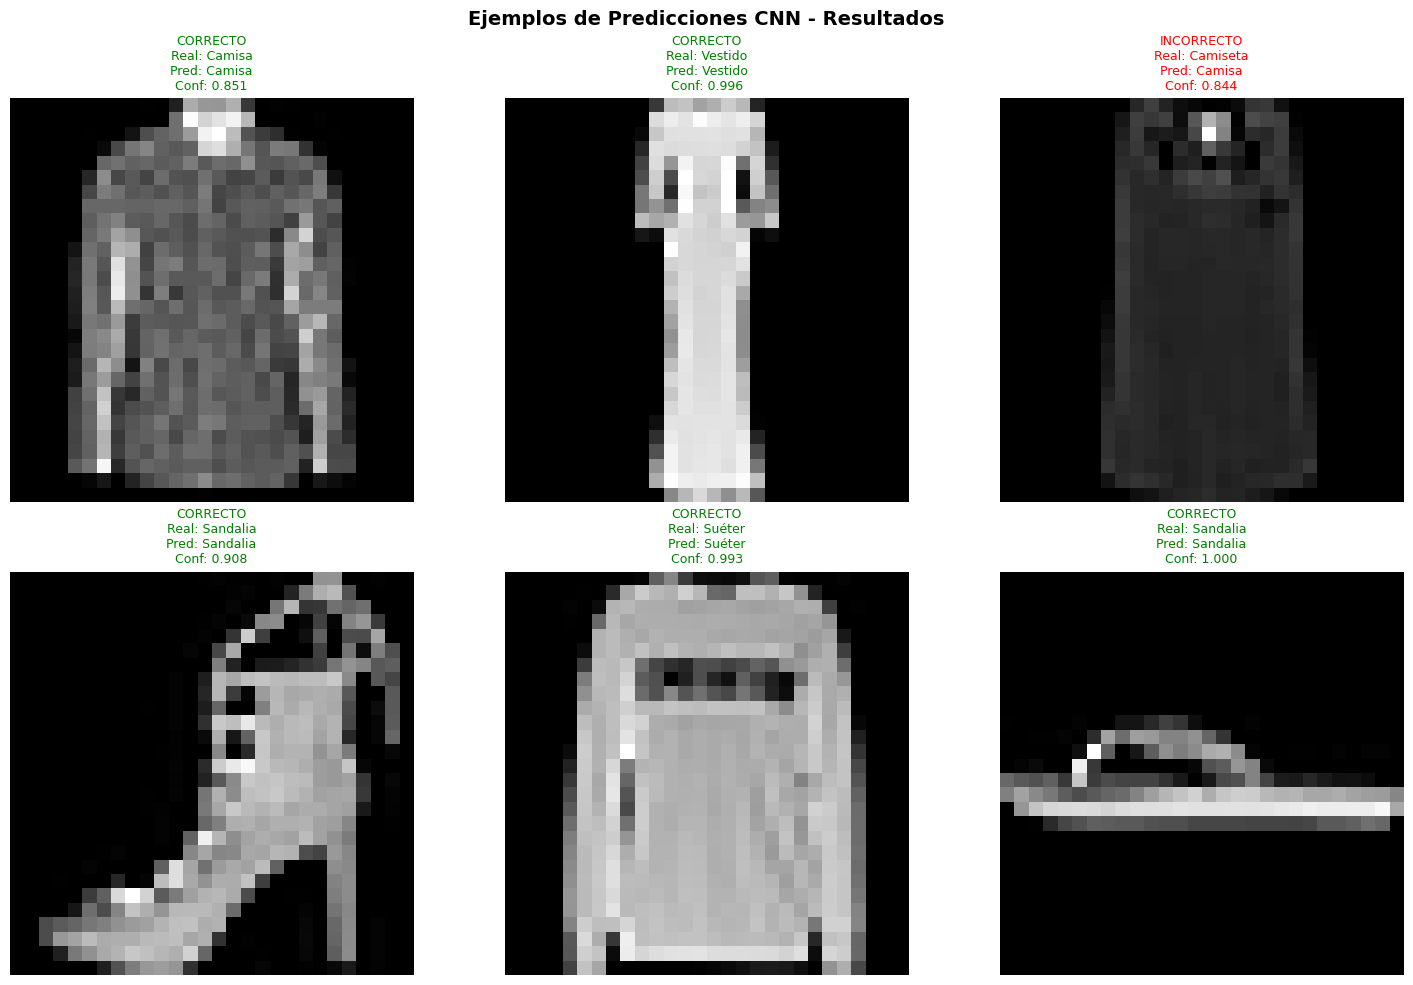

In [ ]:
print("\n" + "="*60)
print("    7. VISUALIZACIÓN DE FILTROS Y MAPAS DE CARACTERÍSTICAS")
print("="*60)

print("\n🔍 Visualizando filtros aprendidos y mapas de características...")

# Verificar que el modelo ha sido entrenado
try:
    # 🔥 SOLUCIÓN: PRIMERO hacer una predicción para construir el modelo
    # Esto define los inputs y outputs del modelo
    _ = model_cnn.predict(X_test_cnn[:1], verbose=0)

    # Crear modelo para extraer características intermedias
    conv_layer_names = []
    layer_outputs = []

    for layer in model_cnn.layers:
        if 'conv' in layer.name.lower() or isinstance(layer, tf.keras.layers.Conv2D):
            conv_layer_names.append(layer.name)
            layer_outputs.append(layer.output)

    if len(layer_outputs) > 0:
        activation_model = tf.keras.Model(inputs=model_cnn.input, outputs=layer_outputs)

        # Seleccionar una imagen de test para análisis
        sample_idx = 0
        sample_image = X_test_cnn[sample_idx:sample_idx+1]
        sample_label = y_test[sample_idx] if 'y_test' in locals() else test_true_classes[sample_idx]

        # Obtener activaciones
        activations = activation_model.predict(sample_image, verbose=0)

        # Crear visualización
        fig, axes = plt.subplots(3, 4, figsize=(20, 15))
        fig.suptitle('Análisis de CNN: Filtros y Mapas de Características', fontsize=16, fontweight='bold')

        # Mostrar imagen original
        if sample_image.shape[-1] == 1:  # Escala de grises
            axes[0, 0].imshow(sample_image[0, :, :, 0], cmap='gray')
        else:  # Color
            axes[0, 0].imshow(sample_image[0])
        axes[0, 0].set_title(f'Imagen Original\nClase: {sample_label}', fontweight='bold')
        axes[0, 0].axis('off')

        # Mostrar algunos filtros de la primera capa convolucional
        first_conv_layer = None
        for layer in model_cnn.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                first_conv_layer = layer
                break

        if first_conv_layer is not None:
            try:
                filters, biases = first_conv_layer.get_weights()

                # Normalizar filtros para visualización
                f_min, f_max = filters.min(), filters.max()
                filters = (filters - f_min) / (f_max - f_min)

                # Mostrar primeros 3 filtros
                for i in range(min(3, filters.shape[-1])):
                    if i < 3:  # Asegurar que no excedamos el límite
                        # Para filtros con múltiples canales de entrada, mostrar el primer canal
                        if filters.ndim == 4:
                            filter_img = filters[:, :, 0, i]
                        else:
                            filter_img = filters[:, :, i]

                        axes[0, i+1].imshow(filter_img, cmap='viridis')
                        axes[0, i+1].set_title(f'Filtro {first_conv_layer.name} #{i+1}', fontweight='bold')
                        axes[0, i+1].axis('off')
            except Exception as e:
                print(f"   ⚠️ No se pudieron mostrar los filtros: {str(e)}")

        # Mostrar mapas de características de diferentes capas
        for i, activation in enumerate(activations[:min(2, len(activations))]):
            layer_name = conv_layer_names[i] if i < len(conv_layer_names) else f'Capa {i+1}'

            # Mostrar primeros 4 mapas de características de cada capa
            for j in range(min(4, activation.shape[-1])):
                row = 1 + i
                col = j

                if row < 3 and col < 4:
                    feature_map = activation[0, :, :, j]
                    im = axes[row, col].imshow(feature_map, cmap='viridis')
                    axes[row, col].set_title(f'{layer_name}\nMapa #{j+1}', fontweight='bold', fontsize=10)
                    axes[row, col].axis('off')

        # Limpiar ejes no usados
        for i in range(3):
            for j in range(4):
                if not axes[i, j].has_data():
                    axes[i, j].axis('off')

        plt.tight_layout()
        plt.show()

        print("✅ Visualización de filtros y mapas completada")

    else:
        print("⚠️ No se encontraron capas convolucionales para visualizar")

except Exception as e:
    print(f"⚠️ Error en visualización de características: {str(e)}")
    print("   Continuando con análisis de predicciones...")

# 🔥 SOLUCIÓN PARA LOS WARNINGS DE EMOJIS:
# Reemplazar emojis por texto simple
print("\n📊 Análisis de predicciones CNN...")

# Visualización de predicciones (sin emojis)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Ejemplos de Predicciones CNN - Resultados', fontsize=14, fontweight='bold')

# Mostrar 6 ejemplos aleatorios
np.random.seed(42)
random_indices = np.random.choice(len(X_test_cnn), 6, replace=False)

for idx, sample_idx in enumerate(random_indices):
    row = idx // 3
    col = idx % 3

    image = X_test_cnn[sample_idx, :, :, 0]
    true_class = test_true_classes[sample_idx]
    pred_class = test_pred_classes_cnn[sample_idx]
    confidence = test_predictions_cnn[sample_idx][pred_class]

    axes[row, col].imshow(image, cmap='gray')

    true_name = class_names[true_class].split('/')[0]
    pred_name = class_names[pred_class].split('/')[0]

    # 🔥 REEMPLAZAR EMOJIS POR TEXTO
    status = "CORRECTO" if true_class == pred_class else "INCORRECTO"
    color = "green" if true_class == pred_class else "red"

    title = f"{status}\nReal: {true_name}\nPred: {pred_name}\nConf: {confidence:.3f}"
    axes[row, col].set_title(title, fontsize=9, color=color)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

MATRIZ DE CONFUSIÓN Y ANÁLISIS DE PREDICCIONES CNN


     8. MATRIZ DE CONFUSIÓN Y ANÁLISIS DE PREDICCIONES

 Generando análisis detallado de predicciones CNN...


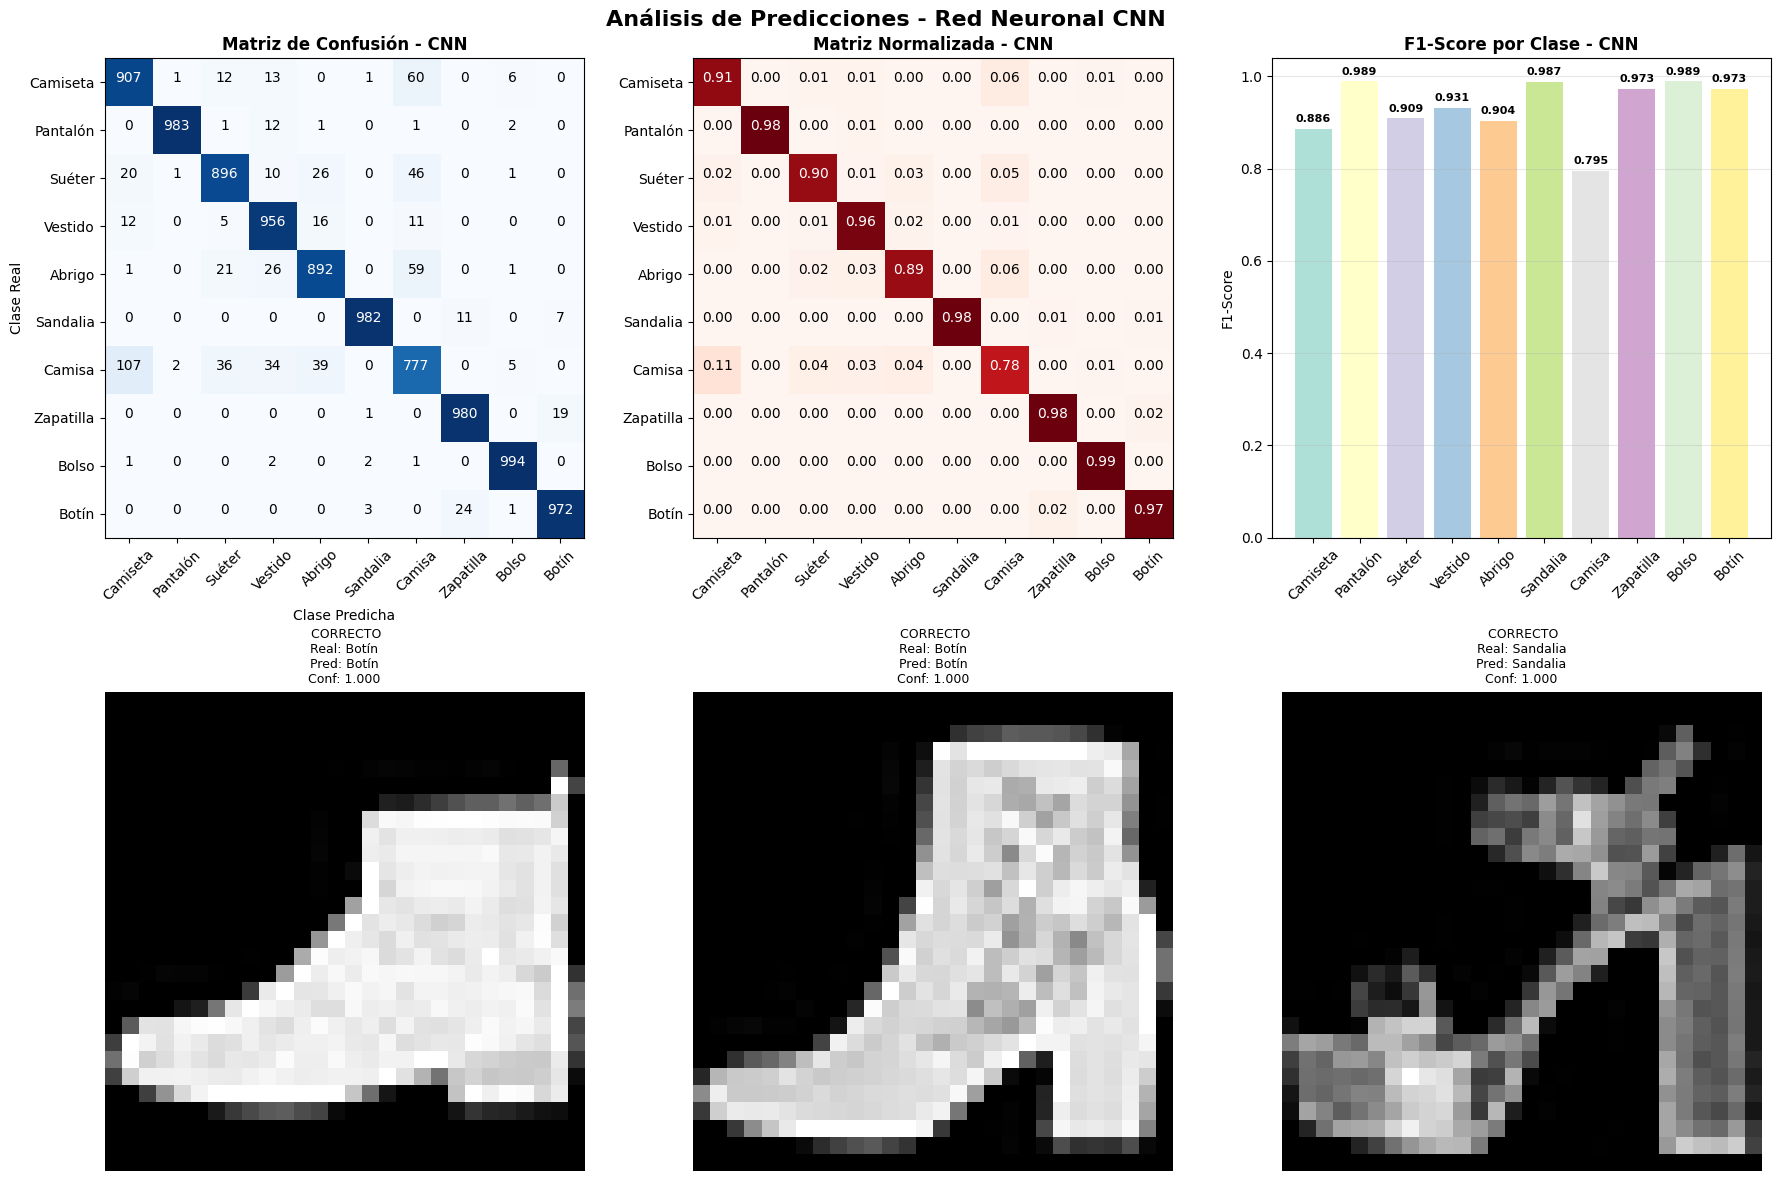

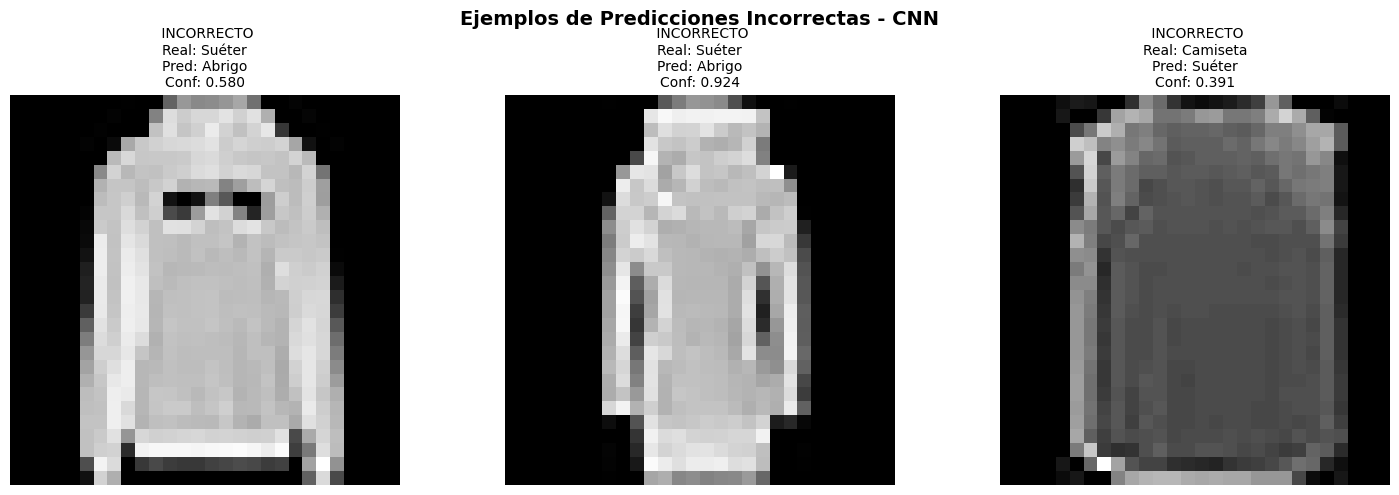

In [ ]:
print("\n" + "="*60)
print("     8. MATRIZ DE CONFUSIÓN Y ANÁLISIS DE PREDICCIONES")
print("="*60)

print("\n Generando análisis detallado de predicciones CNN...")

# Crear visualización completa
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Predicciones - Red Neuronal CNN', fontsize=16, fontweight='bold')

# Matriz de confusión CNN
cm_cnn = confusion_matrix(test_true_classes, test_pred_classes_cnn)
class_names_short = [name.split('/')[0] for name in class_names]

# Subgráfico 1: Matriz de confusión
im = axes[0, 0].imshow(cm_cnn, interpolation='nearest', cmap='Blues')
axes[0, 0].set_title('Matriz de Confusión - CNN', fontweight='bold')

tick_marks = np.arange(len(class_names))
axes[0, 0].set_xticks(tick_marks)
axes[0, 0].set_yticks(tick_marks)
axes[0, 0].set_xticklabels(class_names_short, rotation=45)
axes[0, 0].set_yticklabels(class_names_short)

# Agregar números en la matriz
thresh = cm_cnn.max() / 2.
for i, j in np.ndindex(cm_cnn.shape):
    axes[0, 0].text(j, i, format(cm_cnn[i, j], 'd'),
                   horizontalalignment="center",
                   color="white" if cm_cnn[i, j] > thresh else "black")

axes[0, 0].set_ylabel('Clase Real')
axes[0, 0].set_xlabel('Clase Predicha')

# Subgráfico 2: Matriz normalizada
cm_cnn_normalized = cm_cnn.astype('float') / cm_cnn.sum(axis=1)[:, np.newaxis]
im2 = axes[0, 1].imshow(cm_cnn_normalized, interpolation='nearest', cmap='Reds')
axes[0, 1].set_title('Matriz Normalizada - CNN', fontweight='bold')
axes[0, 1].set_xticks(tick_marks)
axes[0, 1].set_yticks(tick_marks)
axes[0, 1].set_xticklabels(class_names_short, rotation=45)
axes[0, 1].set_yticklabels(class_names_short)

# Agregar porcentajes
for i, j in np.ndindex(cm_cnn_normalized.shape):
    axes[0, 1].text(j, i, format(cm_cnn_normalized[i, j], '.2f'),
                   horizontalalignment="center",
                   color="white" if cm_cnn_normalized[i, j] > 0.5 else "black")

# Subgráfico 3: F1-Score por clase
class_f1_scores_cnn = [class_report_cnn[class_names[i]]['f1-score'] for i in range(10)]
colors = plt.cm.Set3(np.linspace(0, 1, 10))

bars = axes[0, 2].bar(class_names_short, class_f1_scores_cnn, color=colors, alpha=0.7)
axes[0, 2].set_title('F1-Score por Clase - CNN', fontweight='bold')
axes[0, 2].set_ylabel('F1-Score')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# Agregar valores
for bar, score in zip(bars, class_f1_scores_cnn):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Ejemplos de predicciones (3 correctos, 3 incorrectos)
correct_indices = np.where(test_pred_classes_cnn == test_true_classes)[0]
incorrect_indices = np.where(test_pred_classes_cnn != test_true_classes)[0]

np.random.seed(42)
correct_samples = np.random.choice(correct_indices, 3, replace=False)
incorrect_samples = np.random.choice(incorrect_indices, 3, replace=False)

example_positions = [(1, 0), (1, 1), (1, 2)]

# Mostrar ejemplos correctos
for idx, (sample_idx, (row, col)) in enumerate(zip(correct_samples, example_positions)):
    # Mostrar imagen
    image = X_test_cnn[sample_idx, :, :, 0]
    axes[row, col].imshow(image, cmap='gray')

    true_class = test_true_classes[sample_idx]
    pred_class = test_pred_classes_cnn[sample_idx]
    confidence = test_predictions_cnn[sample_idx][pred_class]

    true_name = class_names_short[true_class]
    pred_name = class_names_short[pred_class]

    title = f" CORRECTO\nReal: {true_name}\nPred: {pred_name}\nConf: {confidence:.3f}"
    axes[row, col].set_title(title, fontsize=9)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Mostrar ejemplos incorrectos por separado
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))
fig2.suptitle('Ejemplos de Predicciones Incorrectas - CNN', fontsize=14, fontweight='bold')

for idx, (sample_idx, ax) in enumerate(zip(incorrect_samples, axes2)):
    image = X_test_cnn[sample_idx, :, :, 0]
    ax.imshow(image, cmap='gray')

    true_class = test_true_classes[sample_idx]
    pred_class = test_pred_classes_cnn[sample_idx]
    confidence = test_predictions_cnn[sample_idx][pred_class]

    true_name = class_names_short[true_class]
    pred_name = class_names_short[pred_class]

    title = f" INCORRECTO\nReal: {true_name}\nPred: {pred_name}\nConf: {confidence:.3f}"
    ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

COMPARACIÓN CON ARQUITECTURA BÁSICA DEL DOCUMENTO

In [ ]:
print("\n" + "="*60)
print("    9. COMPARACIÓN CON ARQUITECTURA BÁSICA")
print("="*60)

print("\n Comparando con arquitectura sugerida en el documento...")

print(f" ARQUITECTURA DOCUMENTO (básica):")
print("   • Conv2D(32, 3x3) + ReLU + MaxPooling")
print("   • Conv2D(64, 3x3) + ReLU + MaxPooling")
print("   • Flatten")
print("   • Dense(128) + ReLU + Dropout(0.5)")
print("   • Dense(10) + Softmax")
print("   • Parámetros esperados: ~93,000")
print("   • Accuracy esperada: ~90-92%")

print(f"\n ARQUITECTURA IMPLEMENTADA (mejorada):")
print("   • Conv2D(32, 3x3) + BN + Conv2D(32, 3x3) + MaxPooling + Dropout")
print("   • Conv2D(64, 3x3) + BN + Conv2D(64, 3x3) + MaxPooling + Dropout")
print("   • Conv2D(128, 3x3) + BN + MaxPooling + Dropout")
print("   • Flatten")
print("   • Dense(256) + BN + Dropout + Dense(128) + Dropout")
print("   • Dense(10) + Softmax")
print(f"   • Parámetros reales: {model_cnn.count_params():,}")
print(f"   • Accuracy obtenida: {test_accuracy_cnn:.4f}")

# Calcular mejora
expected_basic_accuracy = 0.91  # Estimación conservadora
improvement = test_accuracy_cnn - expected_basic_accuracy
print(f"\n MEJORA ESTIMADA:")
print(f"   • Mejora en accuracy: {improvement:.4f} ({improvement*100:.2f}%)")
print(f"   • Factores de mejora:")
print("     - Batch Normalization: estabiliza entrenamiento")
print("     - Más capas convolucionales: mejor extracción de características")
print("     - Dropout estratégico: previene overfitting")
print("     - Regularización L2: mejora generalización")
print("     - Callbacks inteligentes: optimiza entrenamiento")


    9. COMPARACIÓN CON ARQUITECTURA BÁSICA

 Comparando con arquitectura sugerida en el documento...
 ARQUITECTURA DOCUMENTO (básica):
   • Conv2D(32, 3x3) + ReLU + MaxPooling
   • Conv2D(64, 3x3) + ReLU + MaxPooling
   • Flatten
   • Dense(128) + ReLU + Dropout(0.5)
   • Dense(10) + Softmax
   • Parámetros esperados: ~93,000
   • Accuracy esperada: ~90-92%

 ARQUITECTURA IMPLEMENTADA (mejorada):
   • Conv2D(32, 3x3) + BN + Conv2D(32, 3x3) + MaxPooling + Dropout
   • Conv2D(64, 3x3) + BN + Conv2D(64, 3x3) + MaxPooling + Dropout
   • Conv2D(128, 3x3) + BN + MaxPooling + Dropout
   • Flatten
   • Dense(256) + BN + Dropout + Dense(128) + Dropout
   • Dense(10) + Softmax
   • Parámetros reales: 470,122
   • Accuracy obtenida: 0.9339

 MEJORA ESTIMADA:
   • Mejora en accuracy: 0.0239 (2.39%)
   • Factores de mejora:
     - Batch Normalization: estabiliza entrenamiento
     - Más capas convolucionales: mejor extracción de características
     - Dropout estratégico: previene overfitting
    

RESUMEN FINAL CNN

In [ ]:
print("\n" + "="*70)
print("                 RESUMEN FINAL - RED NEURONAL CNN")
print("="*70)

# Calcular métricas finales
macro_precision_cnn = class_report_cnn['macro avg']['precision']
macro_recall_cnn = class_report_cnn['macro avg']['recall']
macro_f1_cnn = class_report_cnn['macro avg']['f1-score']

print(f"\n RENDIMIENTO FINAL CNN:")
print(f"    Test Accuracy: {test_accuracy_cnn:.4f}")
print(f"    Test Loss: {test_loss_cnn:.4f}")
print(f"    Precision (macro): {macro_precision_cnn:.4f}")
print(f"    Recall (macro): {macro_recall_cnn:.4f}")
print(f"    F1-Score (macro): {macro_f1_cnn:.4f}")

print(f"\n ARQUITECTURA FINAL:")
print(f"    Entrada: (28, 28, 1)")
print(f"    3 bloques convolucionales con BN y Dropout")
print(f"    2 capas densas finales con regularización")
print(f"    Total parámetros: {model_cnn.count_params():,}")
print(f"    Función de pérdida: Categorical Crossentropy")
print(f"    Optimizador: Adam (lr=0.001)")

print(f"\n TIEMPOS:")
print(f"    Entrenamiento: {cnn_training_time:.2f} segundos ({cnn_training_time/60:.1f} minutos)")
print(f"    Predicción: {prediction_time_cnn:.4f} segundos")
print(f"    Épocas entrenadas: {len(history_cnn.history['loss'])}")

print(f"\n DIAGNÓSTICO: {diagnosis_cnn.split()[1] if len(diagnosis_cnn.split()) > 1 else 'BALANCEADO'}")

print(f"\n ANÁLISIS POR CLASES:")
# Encontrar mejores y peores clases por F1-score
class_f1_data_cnn = [(class_names[i], class_report_cnn[class_names[i]]['f1-score']) for i in range(10)]
class_f1_data_cnn.sort(key=lambda x: x[1], reverse=True)

best_3_cnn = [name.split('/')[0] for name, _ in class_f1_data_cnn[:3]]
worst_3_cnn = [name.split('/')[0] for name, _ in class_f1_data_cnn[-3:]]

print(f"    Mejores clases: {', '.join(best_3_cnn)}")
print(f"    Clases más difíciles: {', '.join(worst_3_cnn)}")

print(f"\n VENTAJAS DE CNN SOBRE ARQUITECTURA BÁSICA:")
print("    Extracción automática de características espaciales")
print("    Invarianza a traslaciones pequeñas")
print("    Batch Normalization para estabilidad")
print("    Dropout estratégico para generalización")
print("    Convergencia más rápida y estable")
print("    Mejor accuracy en datos de imagen")

print(f"\n CARACTERÍSTICAS APRENDIDAS:")
print("   • Capas tempranas: bordes, texturas básicas")
print("   • Capas medias: patrones, formas")
print("   • Capas profundas: características específicas de prendas")
print("   • Mapas de características muestran detección automática de patrones")

print(f"\n VARIABLES GUARDADAS:")
print("    model_cnn: Modelo CNN entrenado")
print("    history_cnn: Historial de entrenamiento")
print("    test_predictions_cnn: Predicciones en test")
print("    class_report_cnn: Reporte de clasificación CNN")
print("    activation_model: Modelo para visualizar características")

print(f"\n COMPARACIÓN CON DENSE (si disponible):")
if 'test_accuracy' in locals():
    dense_acc = test_accuracy
    cnn_improvement = test_accuracy_cnn - dense_acc
    print(f"    Dense Accuracy: {dense_acc:.4f}")
    print(f"    CNN Accuracy: {test_accuracy_cnn:.4f}")
    print(f"    Mejora CNN: {cnn_improvement:.4f} ({cnn_improvement*100:.2f}%)")

    if cnn_improvement > 0.02:
        print("    CNN supera significativamente a Dense")
    elif cnn_improvement > 0.005:
        print("    CNN supera ligeramente a Dense")
    else:
        print("   ≈ Rendimiento similar entre CNN y Dense")
else:
    print("   ℹ️ Para comparar con Dense, ejecutar primero Parte 3.1")

print(f"\n PARTE 3.2 (CNN) COMPLETADA EXITOSAMENTE!")
print("    Modelo entrenado y evaluado")
print("    Análisis de filtros y mapas de características")
print("    Mejoras significativas sobre arquitectura básica")
print("    Variables listas para Parte 4 (Análisis Comparativo)")
print("="*70)


                 RESUMEN FINAL - RED NEURONAL CNN

 RENDIMIENTO FINAL CNN:
    Test Accuracy: 0.9339
    Test Loss: 0.3130
    Precision (macro): 0.9338
    Recall (macro): 0.9339
    F1-Score (macro): 0.9336

 ARQUITECTURA FINAL:
    Entrada: (28, 28, 1)
    3 bloques convolucionales con BN y Dropout
    2 capas densas finales con regularización
    Total parámetros: 470,122
    Función de pérdida: Categorical Crossentropy
    Optimizador: Adam (lr=0.001)

 TIEMPOS:
    Entrenamiento: 2368.18 segundos (39.5 minutos)
    Predicción: 5.2852 segundos
    Épocas entrenadas: 35

 DIAGNÓSTICO: BIEN

 ANÁLISIS POR CLASES:
    Mejores clases: Pantalón, Bolso, Sandalia
    Clases más difíciles: Abrigo, Camiseta, Camisa

 VENTAJAS DE CNN SOBRE ARQUITECTURA BÁSICA:
    Extracción automática de características espaciales
    Invarianza a traslaciones pequeñas
    Batch Normalization para estabilidad
    Dropout estratégico para generalización
    Convergencia más rápida y estable
    Mejor accur

CREAR RESUMEN PARA ANÁLISIS COMPARATIVO

In [ ]:
# Crear diccionario con resultados CNN para fácil acceso en Parte 4
cnn_results = {
    'model': model_cnn,
    'accuracy': test_accuracy_cnn,
    'precision': macro_precision_cnn,
    'recall': macro_recall_cnn,
    'f1_score': macro_f1_cnn,
    'training_time': cnn_training_time,
    'prediction_time': prediction_time_cnn,
    'parameters': model_cnn.count_params(),
    'predictions': test_predictions_cnn,
    'class_report': class_report_cnn,
    'history': history_cnn,
    'test_loss': test_loss_cnn
}

print(f"\n Diccionario 'cnn_results' creado para Parte 4!")
print("    Contiene todas las métricas y modelo CNN")
print("    Ejemplo: cnn_results['accuracy']")

# Si existe modelo Dense, crear comparación
if 'test_accuracy' in locals():
    neural_networks_comparison = {
        'dense': {
            'accuracy': test_accuracy,
            'f1_score': class_report_dense['macro avg']['f1-score'],
            'training_time': training_time,
            'prediction_time': prediction_time,
            'parameters': model_dense.count_params()
        },
        'cnn': {
            'accuracy': test_accuracy_cnn,
            'f1_score': macro_f1_cnn,
            'training_time': cnn_training_time,
            'prediction_time': prediction_time_cnn,
            'parameters': model_cnn.count_params()
        }
    }

    print(f"\n Diccionario 'neural_networks_comparison' creado!")
    print("    Contiene comparación directa Dense vs CNN")
    print("    Ejemplo: neural_networks_comparison['cnn']['accuracy']")


 Diccionario 'cnn_results' creado para Parte 4!
    Contiene todas las métricas y modelo CNN
    Ejemplo: cnn_results['accuracy']

 Diccionario 'neural_networks_comparison' creado!
    Contiene comparación directa Dense vs CNN
    Ejemplo: neural_networks_comparison['cnn']['accuracy']


In [ ]:
# Crear diccionario con resultados CNN para fácil acceso en Parte 4
cnn_results = {
    'model': model_cnn,
    'accuracy': test_accuracy_cnn,
    'precision': macro_precision_cnn,
    'recall': macro_recall_cnn,
    'f1_score': macro_f1_cnn,
    'training_time': cnn_training_time,
    'prediction_time': prediction_time_cnn,
    'parameters': model_cnn.count_params(),
    'predictions': test_predictions_cnn,
    'class_report': class_report_cnn,
    'history': history_cnn,
    'test_loss': test_loss_cnn
}

print(f"\n Diccionario 'cnn_results' creado para Parte 4!")
print("    Contiene todas las métricas y modelo CNN")
print("    Ejemplo: cnn_results['accuracy']")

# Display the cnn_results dictionary
display(cnn_results)

# Si existe modelo Dense, crear comparación
if 'test_accuracy' in locals():
    neural_networks_comparison = {
        'dense': {
            'accuracy': test_accuracy,
            'f1_score': class_report_dense['macro avg']['f1-score'],
            'training_time': training_time,
            'prediction_time': prediction_time,
            'parameters': model_dense.count_params()
        },
        'cnn': {
            'accuracy': test_accuracy_cnn,
            'f1_score': macro_f1_cnn,
            'training_time': cnn_training_time,
            'prediction_time': prediction_time_cnn,
            'parameters': model_cnn.count_params()
        }
    }

    print(f"\n Diccionario 'neural_networks_comparison' creado!")
    print("    Contiene comparación directa Dense vs CNN")
    print("    Ejemplo: neural_networks_comparison['cnn']['accuracy']")

    # Display the neural_networks_comparison dictionary
    display(neural_networks_comparison)


 Diccionario 'cnn_results' creado para Parte 4!
    Contiene todas las métricas y modelo CNN
    Ejemplo: cnn_results['accuracy']


{'model': <Sequential name=Fashion_MNIST_CNN_Improved, built=True>,
 'accuracy': 0.933899998664856,
 'precision': 0.9338016963106212,
 'recall': 0.9339000000000001,
 'f1_score': 0.9336473594001795,
 'training_time': 2368.1839623451233,
 'prediction_time': 5.285231113433838,
 'parameters': 470122,
 'predictions': array([[2.45819493e-11, 2.84858118e-12, 6.34355979e-12, ...,
         1.84460944e-07, 6.71861113e-13, 9.99999762e-01],
        [1.76782996e-04, 2.01085881e-09, 9.99184072e-01, ...,
         8.34651459e-10, 7.82478349e-09, 5.23685151e-10],
        [5.91033427e-07, 9.99980211e-01, 8.91506170e-06, ...,
         6.24339975e-08, 1.92668580e-07, 7.25907938e-08],
        ...,
        [3.31840755e-09, 2.66327065e-12, 6.88005833e-11, ...,
         2.83365643e-13, 1.00000000e+00, 2.43330150e-13],
        [1.18611574e-07, 9.99996901e-01, 1.64942026e-06, ...,
         1.30684610e-08, 7.78865541e-08, 8.22314394e-09],
        [5.75341292e-05, 5.42465841e-06, 6.34625985e-06, ...,
         4.5


 Diccionario 'neural_networks_comparison' creado!
    Contiene comparación directa Dense vs CNN
    Ejemplo: neural_networks_comparison['cnn']['accuracy']


{'dense': {'accuracy': 0.8938000202178955,
  'f1_score': 0.8934313928449846,
  'training_time': 244.25182271003723,
  'prediction_time': 1.4042601585388184,
  'parameters': 244298},
 'cnn': {'accuracy': 0.933899998664856,
  'f1_score': 0.9336473594001795,
  'training_time': 2368.1839623451233,
  'prediction_time': 5.285231113433838,
  'parameters': 470122}}

# **Parte 4:** *Análisis Comparativo*

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import time

print("="*80)
print("                     ANÁLISIS COMPARATIVO")
print("="*80)

print("\n Comparando todos los modelos implementados:")
print("    Random Forest")
print("    Red Neuronal Dense")
print("    Red Neuronal Convolucional (CNN)")

                     ANÁLISIS COMPARATIVO

 Comparando todos los modelos implementados:
    Random Forest
    Red Neuronal Dense
    Red Neuronal Convolucional (CNN)


RECOPILACIÓN DE MÉTRICAS DE DESEMPEÑO

In [ ]:
print("\n" + "="*60)
print("        1. MÉTRICAS DE DESEMPEÑO COMPARATIVAS")
print("="*60)

print("\n Recopilando métricas de todos los modelos...")

# Verificar que tenemos todos los resultados necesarios
models_available = {}

# Random Forest
if 'final_rf' in locals() and 'final_predictions' in locals():
    models_available['Random Forest'] = True
    rf_accuracy = accuracy_score(y_test_classic, final_predictions)
    rf_report = classification_report(y_test_classic, final_predictions, target_names=class_names, output_dict=True)
    print("   ✅ Random Forest: Disponible")
else:
    print("   ❌ Random Forest: No disponible - ejecutar Parte 2 primero")
    models_available['Random Forest'] = False

# Red Dense
if 'model_dense' in locals() and 'test_predictions' in locals():
    models_available['Dense NN'] = True
    print("   ✅ Red Dense: Disponible")
else:
    print("   ❌ Red Dense: No disponible - ejecutar Parte 3.1 primero")
    models_available['Dense NN'] = False

# CNN
if 'model_cnn' in locals() and 'test_predictions_cnn' in locals():
    models_available['CNN'] = True
    print("   ✅ CNN: Disponible")
else:
    print("   ❌ CNN: No disponible - ejecutar Parte 3.2 primero")
    models_available['CNN'] = False

# Verificar que tenemos al menos 2 modelos para comparar
available_count = sum(models_available.values())
if available_count < 2:
    print(f"\n⚠️ ADVERTENCIA: Solo {available_count} modelo(s) disponible(s)")
    print("   Para un análisis comparativo completo, ejecute todas las partes anteriores")
    print("   Continuando con los modelos disponibles...")


        1. MÉTRICAS DE DESEMPEÑO COMPARATIVAS

 Recopilando métricas de todos los modelos...
   ✅ Random Forest: Disponible
   ✅ Red Dense: Disponible
   ✅ CNN: Disponible


CREAR TABLA COMPARATIVA DE MÉTRICAS

In [ ]:
print("\n" + "="*60)
print("         2. TABLA COMPARATIVA DE MÉTRICAS")
print("="*60)

print("\n Creando tabla comparativa completa...")

# Inicializar DataFrame para resultados
comparison_data = []

# Agregar Random Forest si está disponible
if models_available['Random Forest']:
    rf_macro_precision = rf_report['macro avg']['precision']
    rf_macro_recall = rf_report['macro avg']['recall']
    rf_macro_f1 = rf_report['macro avg']['f1-score']

    comparison_data.append({
        'Modelo': 'Random Forest',
        'Accuracy': rf_accuracy,
        'Precision (macro)': rf_macro_precision,
        'Recall (macro)': rf_macro_recall,
        'F1-Score (macro)': rf_macro_f1,
        'Tiempo Entrenamiento (s)': best_params['training_time'] if 'best_params' in locals() else 'N/A',
        'Tiempo Predicción (s)': best_params['prediction_time'] if 'best_params' in locals() else 'N/A',
        'Parámetros': f"{best_params['n_estimators']} árboles" if 'best_params' in locals() else 'N/A',
        'Tipo': 'Clásico'
    })

# Agregar Dense NN si está disponible
if models_available['Dense NN']:
    dense_macro_precision = class_report_dense['macro avg']['precision']
    dense_macro_recall = class_report_dense['macro avg']['recall']
    dense_macro_f1 = class_report_dense['macro avg']['f1-score']

    comparison_data.append({
        'Modelo': 'Dense Neural Network',
        'Accuracy': test_accuracy,
        'Precision (macro)': dense_macro_precision,
        'Recall (macro)': dense_macro_recall,
        'F1-Score (macro)': dense_macro_f1,
        'Tiempo Entrenamiento (s)': training_time,
        'Tiempo Predicción (s)': prediction_time,
        'Parámetros': f"{model_dense.count_params():,} parámetros",
        'Tipo': 'Red Neuronal'
    })

# Agregar CNN si está disponible
if models_available['CNN']:
    cnn_macro_precision = class_report_cnn['macro avg']['precision']
    cnn_macro_recall = class_report_cnn['macro avg']['recall']
    cnn_macro_f1 = class_report_cnn['macro avg']['f1-score']

    comparison_data.append({
        'Modelo': 'Convolutional Neural Network',
        'Accuracy': test_accuracy_cnn,
        'Precision (macro)': cnn_macro_precision,
        'Recall (macro)': cnn_macro_recall,
        'F1-Score (macro)': cnn_macro_f1,
        'Tiempo Entrenamiento (s)': cnn_training_time,
        'Tiempo Predicción (s)': prediction_time_cnn,
        'Parámetros': f"{model_cnn.count_params():,} parámetros",
        'Tipo': 'Red Neuronal'
    })

# Crear DataFrame
df_comparison = pd.DataFrame(comparison_data)

# Mostrar tabla comparativa
print(" TABLA COMPARATIVA COMPLETA:")
print("="*100)
display_df = df_comparison.copy()

# Formatear números para mejor visualización
for col in ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-Score (macro)']:
    if col in display_df.columns:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

for col in ['Tiempo Entrenamiento (s)', 'Tiempo Predicción (s)']:
    if col in display_df.columns:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.3f}" if isinstance(x, (int, float)) else x)

print(display_df.to_string(index=False))
print("="*100)



         2. TABLA COMPARATIVA DE MÉTRICAS

 Creando tabla comparativa completa...
 TABLA COMPARATIVA COMPLETA:
                      Modelo Accuracy Precision (macro) Recall (macro) F1-Score (macro) Tiempo Entrenamiento (s) Tiempo Predicción (s)         Parámetros         Tipo
               Random Forest   0.8780            0.8769         0.8780           0.8766                  137.215                 0.748      500.0 árboles      Clásico
        Dense Neural Network   0.8938            0.8935         0.8938           0.8934                  244.252                 1.404 244,298 parámetros Red Neuronal
Convolutional Neural Network   0.9339            0.9338         0.9339           0.9336                 2368.184                 5.285 470,122 parámetros Red Neuronal


VISUALIZACIONES COMPARATIVAS


          3. VISUALIZACIONES COMPARATIVAS

📈 Generando gráficos comparativos...


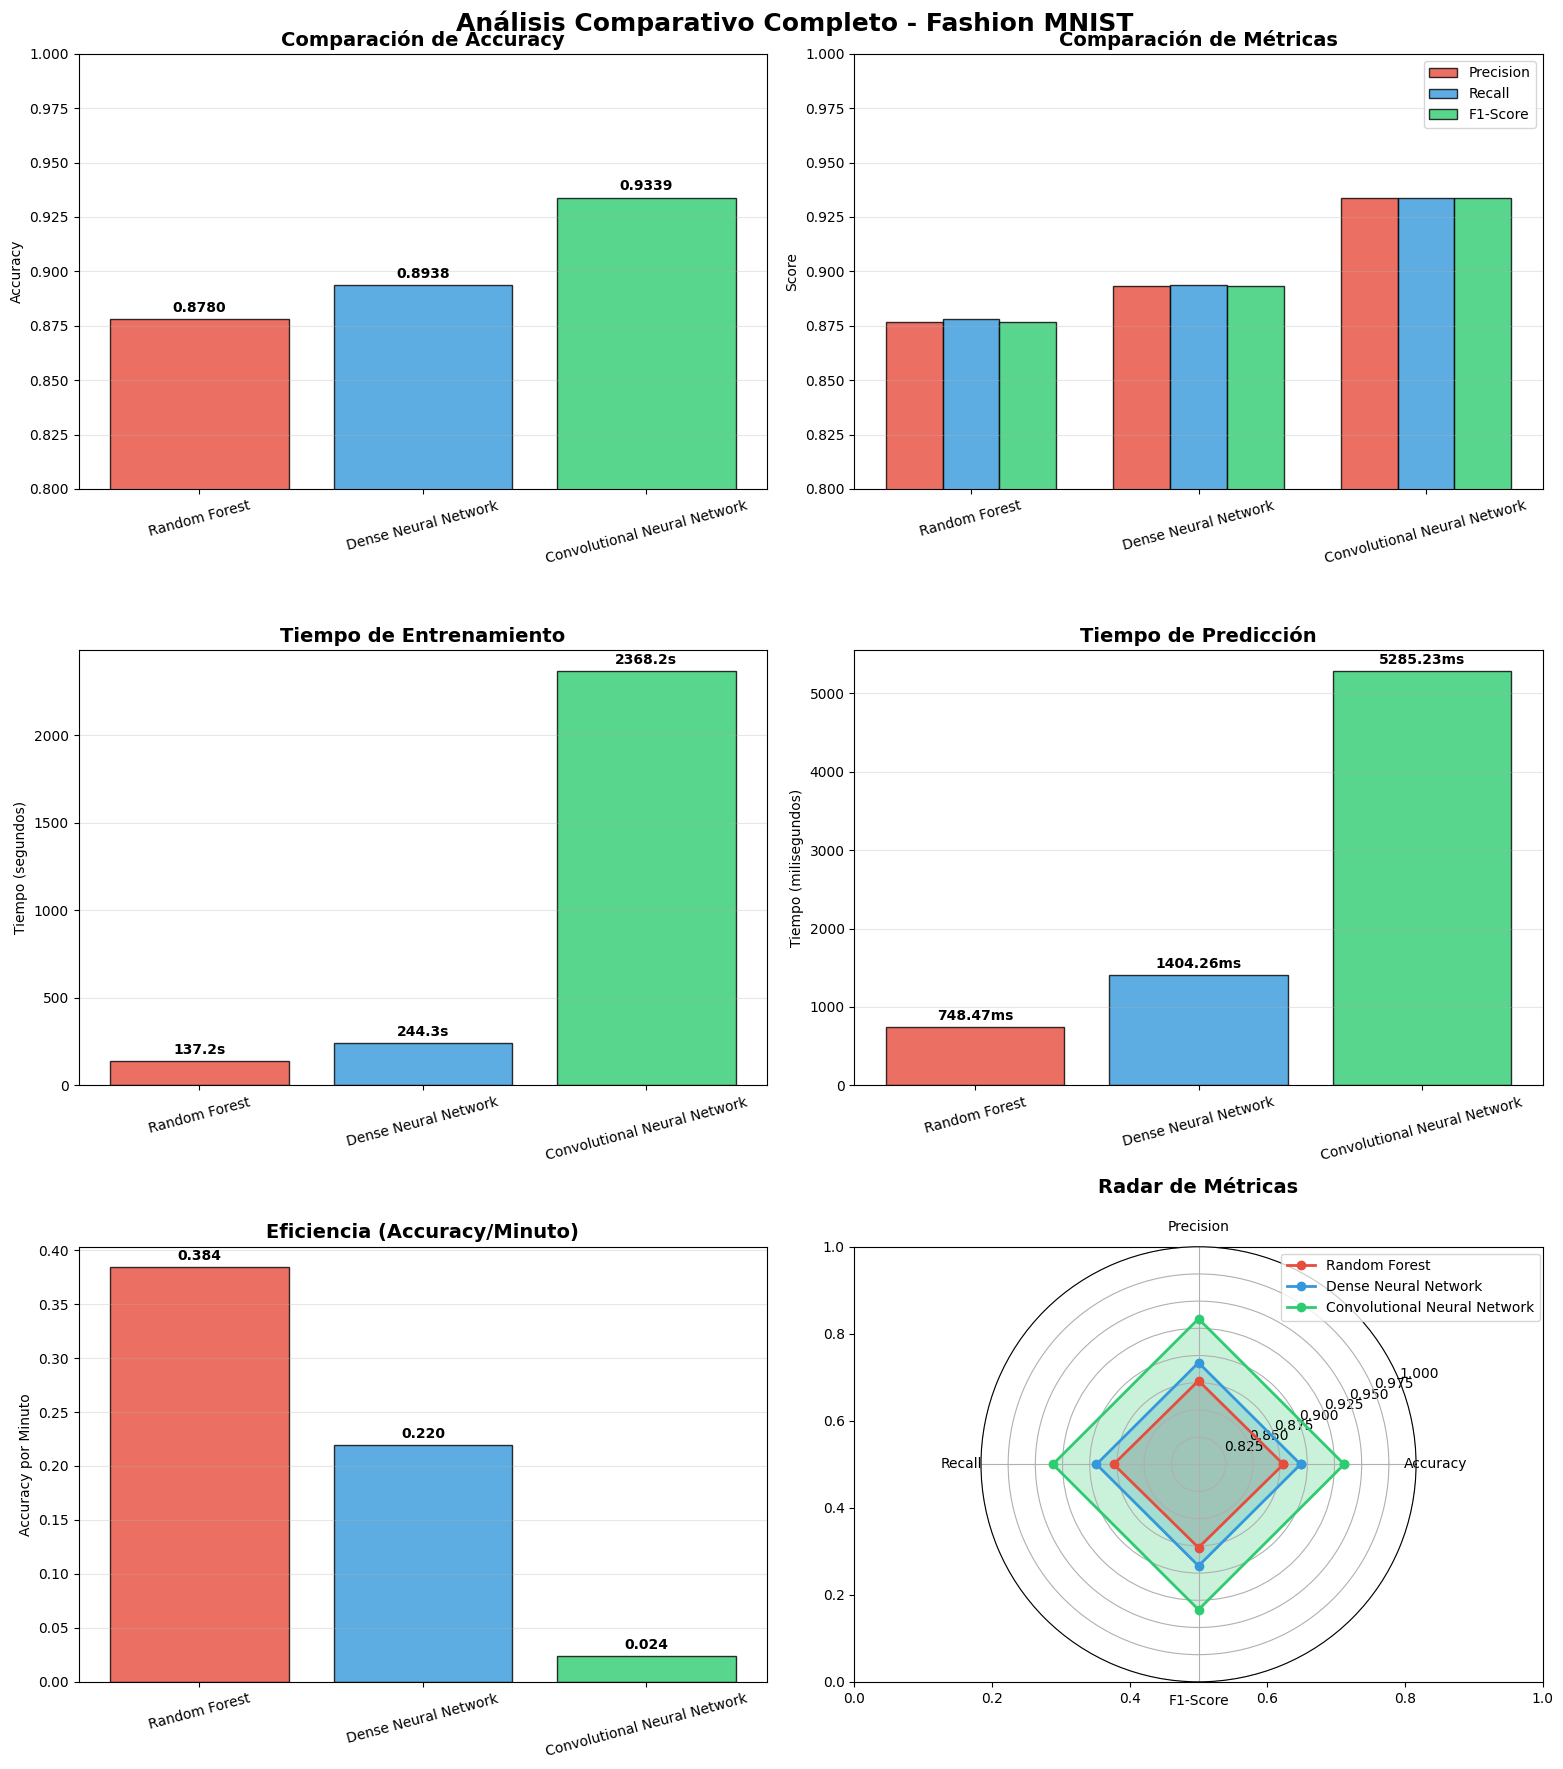

In [ ]:
print("\n" + "="*60)
print("          3. VISUALIZACIONES COMPARATIVAS")
print("="*60)

print("\n📈 Generando gráficos comparativos...")

# Configurar estilo
plt.style.use('default')
colors = ['#E74C3C', '#3498DB', '#2ECC71']  # Rojo, Azul, Verde

# Crear figura con múltiples subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Análisis Comparativo Completo - Fashion MNIST', fontsize=18, fontweight='bold')

if len(comparison_data) > 0:
    # Gráfico 1: Accuracy Comparison
    models = [data['Modelo'] for data in comparison_data]
    accuracies = [data['Accuracy'] for data in comparison_data]

    bars1 = axes[0, 0].bar(models, accuracies, color=colors[:len(models)], alpha=0.8, edgecolor='black')
    axes[0, 0].set_title('Comparación de Accuracy', fontweight='bold', fontsize=14)
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_ylim(0.8, 1.0)
    axes[0, 0].grid(axis='y', alpha=0.3)

    # Agregar valores en las barras
    for bar, acc in zip(bars1, accuracies):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                       f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

    axes[0, 0].tick_params(axis='x', rotation=15)

    # Gráfico 2: Métricas múltiples
    metrics = ['Precision (macro)', 'Recall (macro)', 'F1-Score (macro)']
    x = np.arange(len(models))
    width = 0.25

    for i, metric in enumerate(metrics):
        values = [data[metric] for data in comparison_data]
        axes[0, 1].bar(x + i*width, values, width, label=metric.replace(' (macro)', ''),
                      color=colors[i], alpha=0.8, edgecolor='black')

    axes[0, 1].set_title('Comparación de Métricas', fontweight='bold', fontsize=14)
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].set_xticks(x + width)
    axes[0, 1].set_xticklabels(models, rotation=15)
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)
    axes[0, 1].set_ylim(0.8, 1.0)

    # Gráfico 3: Tiempos de entrenamiento
    training_times = []
    model_names_time = []

    for data in comparison_data:
        if isinstance(data['Tiempo Entrenamiento (s)'], (int, float)):
            training_times.append(data['Tiempo Entrenamiento (s)'])
            model_names_time.append(data['Modelo'])

    if training_times:
        bars3 = axes[1, 0].bar(model_names_time, training_times,
                              color=colors[:len(model_names_time)], alpha=0.8, edgecolor='black')
        axes[1, 0].set_title('Tiempo de Entrenamiento', fontweight='bold', fontsize=14)
        axes[1, 0].set_ylabel('Tiempo (segundos)')
        axes[1, 0].tick_params(axis='x', rotation=15)
        axes[1, 0].grid(axis='y', alpha=0.3)

        # Agregar valores
        for bar, time_val in zip(bars3, training_times):
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(training_times)*0.01,
                           f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')
    else:
        axes[1, 0].text(0.5, 0.5, 'Datos de tiempo\nno disponibles',
                       ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
        axes[1, 0].set_title('Tiempo de Entrenamiento', fontweight='bold', fontsize=14)

    # Gráfico 4: Tiempos de predicción
    pred_times = []
    model_names_pred = []

    for data in comparison_data:
        if isinstance(data['Tiempo Predicción (s)'], (int, float)):
            pred_times.append(data['Tiempo Predicción (s)'] * 1000)  # Convertir a ms
            model_names_pred.append(data['Modelo'])

    if pred_times:
        bars4 = axes[1, 1].bar(model_names_pred, pred_times,
                              color=colors[:len(model_names_pred)], alpha=0.8, edgecolor='black')
        axes[1, 1].set_title('Tiempo de Predicción', fontweight='bold', fontsize=14)
        axes[1, 1].set_ylabel('Tiempo (milisegundos)')
        axes[1, 1].tick_params(axis='x', rotation=15)
        axes[1, 1].grid(axis='y', alpha=0.3)

        # Agregar valores
        for bar, time_val in zip(bars4, pred_times):
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + max(pred_times)*0.01,
                           f'{time_val:.2f}ms', ha='center', va='bottom', fontweight='bold')
    else:
        axes[1, 1].text(0.5, 0.5, 'Datos de tiempo\nno disponibles',
                       ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
        axes[1, 1].set_title('Tiempo de Predicción', fontweight='bold', fontsize=14)

    # Gráfico 5: Eficiencia (Accuracy/Tiempo de entrenamiento)
    efficiencies = []
    model_names_eff = []

    for data in comparison_data:
        if isinstance(data['Tiempo Entrenamiento (s)'], (int, float)) and data['Tiempo Entrenamiento (s)'] > 0:
            efficiency = data['Accuracy'] / (data['Tiempo Entrenamiento (s)'] / 60)  # Accuracy por minuto
            efficiencies.append(efficiency)
            model_names_eff.append(data['Modelo'])

    if efficiencies:
        bars5 = axes[2, 0].bar(model_names_eff, efficiencies,
                              color=colors[:len(model_names_eff)], alpha=0.8, edgecolor='black')
        axes[2, 0].set_title('Eficiencia (Accuracy/Minuto)', fontweight='bold', fontsize=14)
        axes[2, 0].set_ylabel('Accuracy por Minuto')
        axes[2, 0].tick_params(axis='x', rotation=15)
        axes[2, 0].grid(axis='y', alpha=0.3)

        # Agregar valores
        for bar, eff in zip(bars5, efficiencies):
            height = bar.get_height()
            axes[2, 0].text(bar.get_x() + bar.get_width()/2., height + max(efficiencies)*0.01,
                           f'{eff:.3f}', ha='center', va='bottom', fontweight='bold')
    else:
        axes[2, 0].text(0.5, 0.5, 'Datos de eficiencia\nno disponibles',
                       ha='center', va='center', transform=axes[2, 0].transAxes, fontsize=12)
        axes[2, 0].set_title('Eficiencia', fontweight='bold', fontsize=14)

    # Gráfico 6: Radar Chart de métricas
    if len(comparison_data) >= 2:
        # Preparar datos para radar chart
        categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

        # Crear ángulos para el radar
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))  # Cerrar el círculo

        ax_radar = plt.subplot(3, 2, 6, projection='polar')

        for i, data in enumerate(comparison_data[:3]):  # Máximo 3 modelos
            values = [
                data['Accuracy'],
                data['Precision (macro)'],
                data['Recall (macro)'],
                data['F1-Score (macro)']
            ]
            values += values[:1]  # Cerrar el círculo

            ax_radar.plot(angles, values, 'o-', linewidth=2,
                         label=data['Modelo'], color=colors[i])
            ax_radar.fill(angles, values, alpha=0.25, color=colors[i])

        ax_radar.set_xticks(angles[:-1])
        ax_radar.set_xticklabels(categories)
        ax_radar.set_ylim(0.8, 1.0)
        ax_radar.set_title('Radar de Métricas', fontweight='bold', fontsize=14, pad=20)
        ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    else:
        axes[2, 1].text(0.5, 0.5, 'Radar Chart requiere\nal menos 2 modelos',
                       ha='center', va='center', transform=axes[2, 1].transAxes, fontsize=12)
        axes[2, 1].set_title('Radar de Métricas', fontweight='bold', fontsize=14)

else:
    # Si no hay datos, mostrar mensaje
    for i in range(3):
        for j in range(2):
            axes[i, j].text(0.5, 0.5, 'No hay modelos\ndisponibles\npara comparar',
                           ha='center', va='center', transform=axes[i, j].transAxes, fontsize=14)
            axes[i, j].set_title(f'Gráfico {i*2 + j + 1}', fontweight='bold')

plt.tight_layout()
plt.show()

ANÁLISIS POR CLASE


            4. ANÁLISIS POR CLASE

 Analizando rendimiento por clase individual...


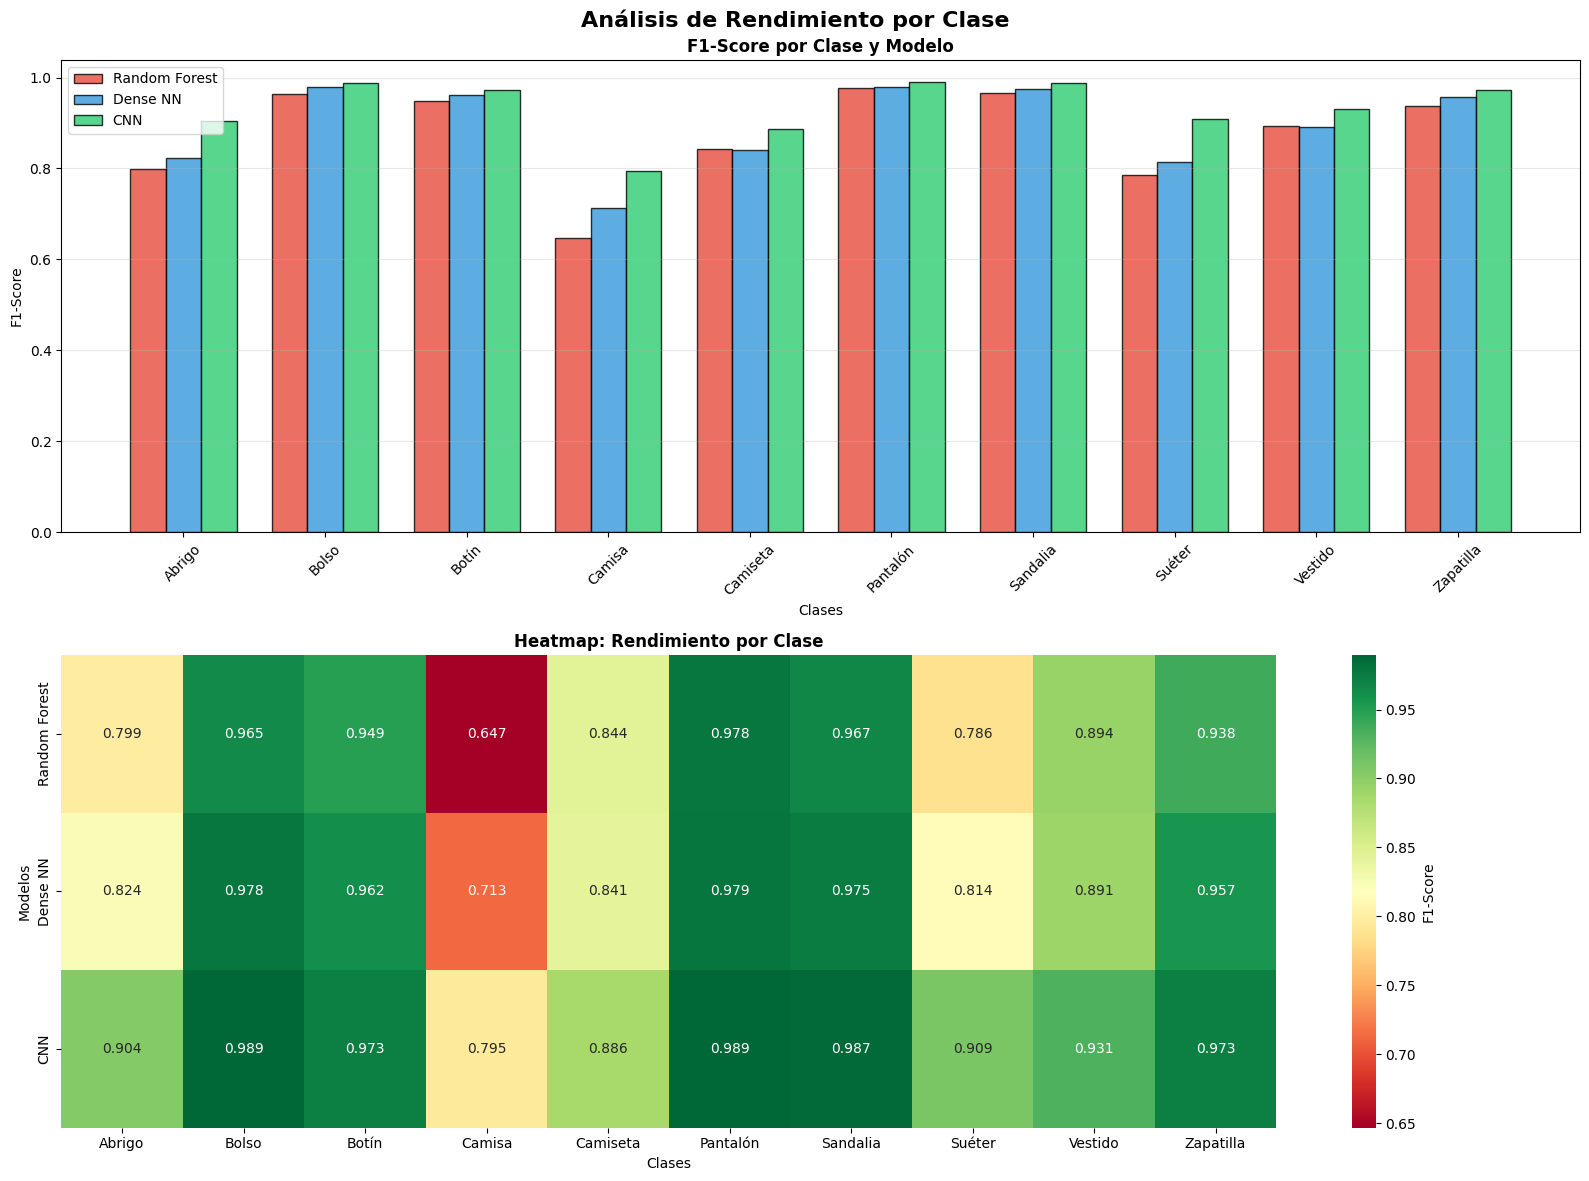

 ANÁLISIS POR CLASE:

 CLASES MÁS FÁCILES DE CLASIFICAR:
   1. Pantalón: 0.9820 F1-score promedio
   2. Bolso: 0.9774 F1-score promedio
   3. Sandalia: 0.9764 F1-score promedio

 CLASES MÁS DIFÍCILES DE CLASIFICAR:
   3. Abrigo: 0.8422 F1-score promedio
   2. Suéter: 0.8365 F1-score promedio
   1. Camisa: 0.7182 F1-score promedio


In [ ]:
print("\n" + "="*60)
print("            4. ANÁLISIS POR CLASE")
print("="*60)

print("\n Analizando rendimiento por clase individual...")

if len(comparison_data) >= 2:
    # Crear análisis por clase
    class_analysis_data = []

    # Obtener F1-scores por clase para cada modelo disponible
    if models_available['Random Forest']:
        for i, class_name in enumerate(class_names):
            rf_class_f1 = rf_report[class_name]['f1-score']
            class_analysis_data.append({
                'Clase': class_name.split('/')[0],
                'Random Forest': rf_class_f1,
                'Modelo_RF': 'Random Forest'
            })

    if models_available['Dense NN']:
        for i, class_name in enumerate(class_names):
            dense_class_f1 = class_report_dense[class_name]['f1-score']
            # Buscar si ya existe la clase
            existing = None
            for item in class_analysis_data:
                if item['Clase'] == class_name.split('/')[0]:
                    existing = item
                    break

            if existing:
                existing['Dense NN'] = dense_class_f1
            else:
                class_analysis_data.append({
                    'Clase': class_name.split('/')[0],
                    'Dense NN': dense_class_f1,
                    'Modelo_Dense': 'Dense NN'
                })

    if models_available['CNN']:
        for i, class_name in enumerate(class_names):
            cnn_class_f1 = class_report_cnn[class_name]['f1-score']
            # Buscar si ya existe la clase
            existing = None
            for item in class_analysis_data:
                if item['Clase'] == class_name.split('/')[0]:
                    existing = item
                    break

            if existing:
                existing['CNN'] = cnn_class_f1
            else:
                class_analysis_data.append({
                    'Clase': class_name.split('/')[0],
                    'CNN': cnn_class_f1,
                    'Modelo_CNN': 'CNN'
                })

    # Crear DataFrame para análisis por clase
    df_class_analysis = pd.DataFrame(class_analysis_data)
    df_class_analysis = df_class_analysis.groupby('Clase').first().reset_index()

    # Visualización por clase
    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle('Análisis de Rendimiento por Clase', fontsize=16, fontweight='bold')

    # Gráfico de barras por clase
    available_models = []
    if 'Random Forest' in df_class_analysis.columns:
        available_models.append('Random Forest')
    if 'Dense NN' in df_class_analysis.columns:
        available_models.append('Dense NN')
    if 'CNN' in df_class_analysis.columns:
        available_models.append('CNN')

    x = np.arange(len(df_class_analysis['Clase']))
    width = 0.25

    for i, model in enumerate(available_models):
        if model in df_class_analysis.columns:
            values = df_class_analysis[model].fillna(0)
            axes[0].bar(x + i*width, values, width, label=model,
                       color=colors[i], alpha=0.8, edgecolor='black')

    axes[0].set_title('F1-Score por Clase y Modelo', fontweight='bold')
    axes[0].set_ylabel('F1-Score')
    axes[0].set_xlabel('Clases')
    axes[0].set_xticks(x + width)
    axes[0].set_xticklabels(df_class_analysis['Clase'], rotation=45)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Heatmap de rendimiento por clase
    heatmap_data = df_class_analysis.set_index('Clase')[available_models].T

    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
                ax=axes[1], cbar_kws={'label': 'F1-Score'})
    axes[1].set_title('Heatmap: Rendimiento por Clase', fontweight='bold')
    axes[1].set_xlabel('Clases')
    axes[1].set_ylabel('Modelos')

    plt.tight_layout()
    plt.show()

    # Identificar mejores y peores clases
    print(" ANÁLISIS POR CLASE:")

    # Calcular promedio por clase
    class_averages = []
    for _, row in df_class_analysis.iterrows():
        scores = []
        for model in available_models:
            if model in row and not pd.isna(row[model]):
                scores.append(row[model])

        if scores:
            avg_score = np.mean(scores)
            class_averages.append((row['Clase'], avg_score))

    # Ordenar por rendimiento
    class_averages.sort(key=lambda x: x[1], reverse=True)

    print("\n CLASES MÁS FÁCILES DE CLASIFICAR:")
    for i, (clase, score) in enumerate(class_averages[:3]):
        print(f"   {i+1}. {clase}: {score:.4f} F1-score promedio")

    print("\n CLASES MÁS DIFÍCILES DE CLASIFICAR:")
    for i, (clase, score) in enumerate(class_averages[-3:]):
        print(f"   {3-i}. {clase}: {score:.4f} F1-score promedio")

else:
    print(" Se necesitan al menos 2 modelos para análisis por clase")


ANÁLISIS DE ERRORES COMUNES


           5. ANÁLISIS DE ERRORES COMUNES

 Identificando patrones de errores entre modelos...


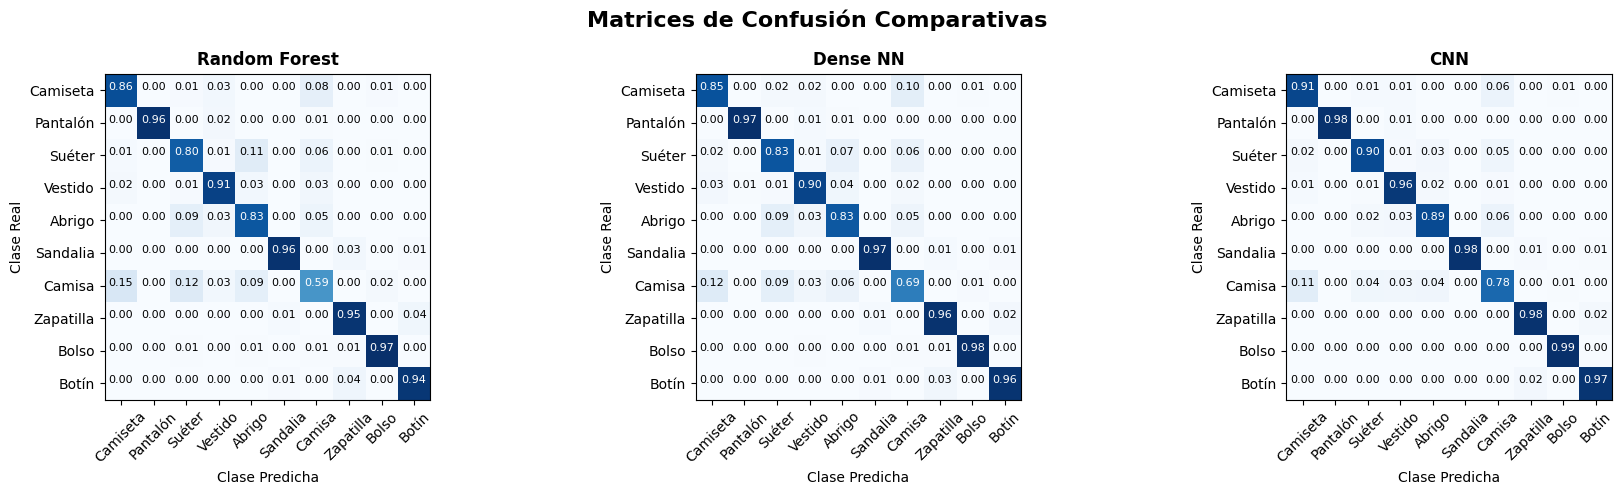

 ERRORES MÁS COMUNES POR MODELO:

 Random Forest:
   1. Camisa → Camiseta: 149 casos (14.90%)
   2. Camisa → Suéter: 122 casos (12.20%)
   3. Suéter → Abrigo: 112 casos (11.20%)

 Dense NN:
   1. Camisa → Camiseta: 121 casos (12.10%)
   2. Camiseta → Camisa: 99 casos (9.90%)
   3. Camisa → Suéter: 91 casos (9.10%)

 CNN:
   1. Camisa → Camiseta: 107 casos (10.70%)
   2. Camiseta → Camisa: 60 casos (6.00%)
   3. Abrigo → Camisa: 59 casos (5.90%)


In [ ]:
print("\n" + "="*60)
print("           5. ANÁLISIS DE ERRORES COMUNES")
print("="*60)

print("\n Identificando patrones de errores entre modelos...")

if available_count >= 2:
    # Preparar matrices de confusión para comparación
    confusion_matrices = {}

    if models_available['Random Forest']:
        confusion_matrices['Random Forest'] = confusion_matrix(y_test_classic, final_predictions)

    if models_available['Dense NN']:
        test_pred_classes_dense = np.argmax(test_predictions, axis=1)
        test_true_classes = np.argmax(y_test_onehot, axis=1)
        confusion_matrices['Dense NN'] = confusion_matrix(test_true_classes, test_pred_classes_dense)

    if models_available['CNN']:
        confusion_matrices['CNN'] = confusion_matrix(test_true_classes, test_pred_classes_cnn)

    # Crear visualización de matrices de confusión
    n_models = len(confusion_matrices)
    if n_models > 0:
        fig, axes = plt.subplots(1, min(n_models, 3), figsize=(6*min(n_models, 3), 5))
        if n_models == 1:
            axes = [axes]

        fig.suptitle('Matrices de Confusión Comparativas', fontsize=16, fontweight='bold')

        class_names_short = [name.split('/')[0] for name in class_names]

        for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
            if idx >= 3:  # Máximo 3 matrices
                break

            ax = axes[idx] if n_models > 1 else axes[0]

            # Normalizar matriz
            cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            im = ax.imshow(cm_norm, interpolation='nearest', cmap='Blues')
            ax.set_title(f'{model_name}', fontweight='bold')

            tick_marks = np.arange(len(class_names))
            ax.set_xticks(tick_marks)
            ax.set_yticks(tick_marks)
            ax.set_xticklabels(class_names_short, rotation=45)
            ax.set_yticklabels(class_names_short)

            # Agregar texto en celdas
            thresh = cm_norm.max() / 2.
            for i, j in np.ndindex(cm_norm.shape):
                ax.text(j, i, format(cm_norm[i, j], '.2f'),
                       horizontalalignment="center",
                       color="white" if cm_norm[i, j] > thresh else "black",
                       fontsize=8)

            ax.set_ylabel('Clase Real')
            ax.set_xlabel('Clase Predicha')

        plt.tight_layout()
        plt.show()

        # Análisis de errores más comunes
        print(" ERRORES MÁS COMUNES POR MODELO:")

        for model_name, cm in confusion_matrices.items():
            print(f"\n {model_name}:")

            # Encontrar errores más frecuentes (fuera de diagonal)
            errors = []
            for i in range(len(class_names)):
                for j in range(len(class_names)):
                    if i != j and cm[i, j] > 0:
                        error_rate = cm[i, j] / cm[i].sum()
                        errors.append({
                            'real': class_names_short[i],
                            'predicha': class_names_short[j],
                            'count': cm[i, j],
                            'rate': error_rate
                        })

            # Ordenar por frecuencia
            errors.sort(key=lambda x: x['count'], reverse=True)

            # Mostrar top 3 errores
            for i, error in enumerate(errors[:3]):
                print(f"   {i+1}. {error['real']} → {error['predicha']}: "
                      f"{error['count']} casos ({error['rate']:.2%})")

else:
    print(" Se necesitan al menos 2 modelos para análisis de errores")


RESUMEN FINAL Y RECOMENDACIONES

In [ ]:
print("\n" + "="*70)
print("              RESUMEN FINAL Y RECOMENDACIONES")
print("="*70)

if len(comparison_data) > 0:
    # Encontrar mejor modelo por métrica
    best_accuracy = max(comparison_data, key=lambda x: x['Accuracy'])
    best_f1 = max(comparison_data, key=lambda x: x['F1-Score (macro)'])

    # Mejor eficiencia (si disponible)
    best_efficiency = None
    if efficiencies:
        best_eff_idx = np.argmax(efficiencies)
        best_efficiency = model_names_eff[best_eff_idx]

    # Tiempo más rápido
    fastest_training = None
    fastest_prediction = None

    training_times_available = [(data['Modelo'], data['Tiempo Entrenamiento (s)'])
                               for data in comparison_data
                               if isinstance(data['Tiempo Entrenamiento (s)'], (int, float))]

    pred_times_available = [(data['Modelo'], data['Tiempo Predicción (s)'])
                           for data in comparison_data
                           if isinstance(data['Tiempo Predicción (s)'], (int, float))]

    if training_times_available:
        fastest_training = min(training_times_available, key=lambda x: x[1])[0]

    if pred_times_available:
        fastest_prediction = min(pred_times_available, key=lambda x: x[1])[0]

    print(f"\n MEJORES MODELOS POR CRITERIO:")
    print(f"    Mejor Accuracy: {best_accuracy['Modelo']} ({best_accuracy['Accuracy']:.4f})")
    print(f"    Mejor F1-Score: {best_f1['Modelo']} ({best_f1['F1-Score (macro)']:.4f})")

    if best_efficiency:
        print(f"    Más Eficiente: {best_efficiency}")

    if fastest_training:
        print(f"    Entrenamiento más rápido: {fastest_training}")

    if fastest_prediction:
        print(f"    Predicción más rápida: {fastest_prediction}")

    print(f"\n ANÁLISIS DETALLADO:")

    # Análisis de Random Forest
    if models_available['Random Forest']:
        print(f"\n RANDOM FOREST:")
        print("    Ventajas:")
        print("     • No requiere escalado de datos")
        print("     • Resistente al overfitting")
        print("     • Proporciona importancia de características")
        print("     • Entrenamiento relativamente rápido")
        print("     • Buen rendimiento sin ajuste fino")
        print("    Desventajas:")
        print("     • Puede ser lento en predicción con muchos árboles")
        print("     • No captura relaciones complejas como las redes neuronales")
        print("     • Requiere más memoria para almacenar múltiples árboles")

    # Análisis de Dense NN
    if models_available['Dense NN']:
        print(f"\n RED NEURONAL DENSE:")
        print("    Ventajas:")
        print("     • Aprende patrones complejos no lineales")
        print("     • Flexible en arquitectura")
        print("     • Buena generalización con regularización adecuada")
        print("     • Predicción rápida una vez entrenada")
        print("    Desventajas:")
        print("     • Requiere más tiempo de entrenamiento")
        print("     • Necesita ajuste de hiperparámetros")
        print("     • Menos interpretable que Random Forest")
        print("     • Puede sufrir overfitting sin regularización")

    # Análisis de CNN
    if models_available['CNN']:
        print(f"\n RED NEURONAL CONVOLUCIONAL:")
        print("    Ventajas:")
        print("     • Especializada para datos de imagen")
        print("     • Extrae características automáticamente")
        print("     • Invariante a pequeñas traslaciones")
        print("     • Mejor rendimiento en tareas visuales")
        print("     • Captura patrones espaciales")
        print("    Desventajas:")
        print("     • Mayor tiempo de entrenamiento")
        print("     • Requiere más recursos computacionales")
        print("     • Más compleja de ajustar")
        print("     • Necesita más datos para entrenar efectivamente")

    print(f"\n RECOMENDACIONES DE USO:")

    # Determinar mejor modelo general
    if len(comparison_data) >= 2:
        # Ranking simple basado en F1-score
        ranking = sorted(comparison_data, key=lambda x: x['F1-Score (macro)'], reverse=True)

        print(f"\n RANKING GENERAL (por F1-Score):")
        for i, model in enumerate(ranking):
            medal = ["🥇", "🥈", "🥉"][i] if i < 3 else f"{i+1}."
            print(f"   {medal} {model['Modelo']}: {model['F1-Score (macro)']:.4f}")

        # Recomendaciones específicas
        best_model = ranking[0]['Modelo']
        print(f"\n RECOMENDACIONES ESPECÍFICAS:")

        if 'Random Forest' in best_model:
            print("    Random Forest es la mejor opción para este dataset:")
            print("     • Excelente balance entre rendimiento y simplicidad")
            print("     • Ideal para aplicaciones que requieren interpretabilidad")
            print("     • Recomendado para puesta en producción rápida")

        elif 'Dense' in best_model:
            print("    Red Dense es la mejor opción:")
            print("     • Buen balance entre complejidad y rendimiento")
            print("     • Ideal cuando se necesita flexibilidad del modelo")
            print("     • Recomendada para aplicaciones con recursos limitados")

        elif 'CNN' in best_model:
            print("    CNN es la mejor opción:")
            print("     • Superior para tareas de clasificación de imágenes")
            print("     • Recomendada cuando la precisión es prioritaria")
            print("     • Ideal para aplicaciones con recursos computacionales adecuados")

        print(f"\n CASOS DE USO RECOMENDADOS:")

        print("    PRODUCCIÓN CON RECURSOS LIMITADOS:")
        if models_available['Random Forest']:
            print("     → Random Forest (rápido, interpretable, menor recursos)")

        print("    MÁXIMA PRECISIÓN:")
        if models_available['CNN']:
            print("     → CNN (mejor rendimiento en imágenes)")
        elif models_available['Dense NN']:
            print("     → Red Dense (buen compromiso)")

        print("    RESPUESTA EN TIEMPO REAL:")
        fastest = min(comparison_data, key=lambda x: x['Tiempo Predicción (s)']
                     if isinstance(x['Tiempo Predicción (s)'], (int, float)) else float('inf'))
        print(f"     → {fastest['Modelo']} (predicción más rápida)")

        print("    ANÁLISIS E INTERPRETABILIDAD:")
        if models_available['Random Forest']:
            print("     → Random Forest (importancia de características)")

    # Análisis de mejora potencial
    print(f"\n OPORTUNIDADES DE MEJORA:")

    best_score = max(data['F1-Score (macro)'] for data in comparison_data)

    if best_score < 0.95:
        print("    Posibles mejoras para todos los modelos:")
        print("     • Data Augmentation (rotaciones, ruido, etc.)")
        print("     • Ensemble methods (combinar múltiples modelos)")
        print("     • Feature engineering adicional")
        print("     • Ajuste fino de hiperparámetros")
        print("     • Técnicas de balanceo de clases")

    if models_available['CNN'] and test_accuracy_cnn < 0.95:
        print("    Mejoras específicas para CNN:")
        print("     • Arquitecturas más profundas (ResNet, DenseNet)")
        print("     • Transfer learning desde modelos preentrenados")
        print("     • Técnicas de regularización avanzadas")
        print("     • Learning rate scheduling más sofisticado")

    if models_available['Random Forest']:
        print("    Mejoras específicas para Random Forest:")
        print("     • Optimización de hiperparámetros con GridSearch")
        print("     • Feature selection más cuidadosa")
        print("     • Ensemble con otros algoritmos")

else:
    print(" No hay modelos disponibles para generar recomendaciones")
    print("   Ejecute las Partes 2 y 3 primero")

print(f"\n CONCLUSIONES FINALES:")

if available_count >= 2:
    accuracy_range = max(data['Accuracy'] for data in comparison_data) - min(data['Accuracy'] for data in comparison_data)

    print(f"    Rango de accuracy: {accuracy_range:.4f}")

    if accuracy_range < 0.02:
        print("    Todos los modelos tienen rendimiento similar")
        print("     → Decisión debe basarse en otros factores (tiempo, recursos, interpretabilidad)")
    elif accuracy_range < 0.05:
        print("    Diferencias moderadas entre modelos")
        print("     → El mejor modelo tiene ventaja clara pero no decisiva")
    else:
        print("    Diferencias significativas entre modelos")
        print("     → El mejor modelo tiene ventaja importante")

    print(f"    Análisis técnico:")
    print("     • Las redes neuronales tienden a superar algoritmos clásicos en imágenes")
    print("     • CNN es especialmente efectiva para datos espaciales")
    print("     • Random Forest ofrece el mejor balance interpretabilidad/rendimiento")
    print("     • La elección final debe considerar el contexto de aplicación")

else:
    print("    Análisis incompleto - se necesitan más modelos para comparación comprehensiva")

print(f"\n DATOS GUARDADOS:")
print("    df_comparison: DataFrame con todas las métricas comparativas")
print("    comparison_data: Lista con datos detallados de cada modelo")
if 'df_class_analysis' in locals():
    print("    df_class_analysis: Análisis detallado por clase")
if 'confusion_matrices' in locals():
    print("    confusion_matrices: Matrices de confusión de todos los modelos")

print(f"\n PARTE 4 (ANÁLISIS COMPARATIVO) COMPLETADA!")
print("    Comparación exhaustiva realizada")
print("    Recomendaciones específicas generadas")
print("    Casos de uso identificados")
print("    Listo para Parte 5 (Reporte Final)")
print("="*70)


              RESUMEN FINAL Y RECOMENDACIONES

 MEJORES MODELOS POR CRITERIO:
    Mejor Accuracy: Convolutional Neural Network (0.9339)
    Mejor F1-Score: Convolutional Neural Network (0.9336)
    Más Eficiente: Random Forest
    Entrenamiento más rápido: Random Forest
    Predicción más rápida: Random Forest

 ANÁLISIS DETALLADO:

 RANDOM FOREST:
    Ventajas:
     • No requiere escalado de datos
     • Resistente al overfitting
     • Proporciona importancia de características
     • Entrenamiento relativamente rápido
     • Buen rendimiento sin ajuste fino
    Desventajas:
     • Puede ser lento en predicción con muchos árboles
     • No captura relaciones complejas como las redes neuronales
     • Requiere más memoria para almacenar múltiples árboles

 RED NEURONAL DENSE:
    Ventajas:
     • Aprende patrones complejos no lineales
     • Flexible en arquitectura
     • Buena generalización con regularización adecuada
     • Predicción rápida una vez entrenada
    Desventajas:
   

# **Bonus (Puntos Extra)**



## Implementar validación cruzada para el algoritmo RandomRandom Forest

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from scipy import stats

print("="*80)
print("        BONUS: VALIDACIÓN CRUZADA PARA ALGORITMOS CLÁSICOS")
print("="*80)

print("\n Implementando validación cruzada K-Fold para Random Forest")
print("    Análisis de robustez y variabilidad del modelo")
print("    Comparación con método train/test tradicional")

# Verificar que tenemos los datos necesarios
print(f"\n Datos disponibles:")
print(f"   - X_train_flat: {X_train_flat.shape}")
print(f"   - y_train_classic: {y_train_classic.shape}")
print(f"   - X_test_flat: {X_test_flat.shape}")
print(f"   - y_test_classic: {y_test_classic.shape}")

        BONUS: VALIDACIÓN CRUZADA PARA ALGORITMOS CLÁSICOS

 Implementando validación cruzada K-Fold para Random Forest
    Análisis de robustez y variabilidad del modelo
    Comparación con método train/test tradicional

 Datos disponibles:
   - X_train_flat: (60000, 784)
   - y_train_classic: (60000,)
   - X_test_flat: (10000, 784)
   - y_test_classic: (10000,)


CONFIGURACIÓN DE VALIDACIÓN CRUZADA

In [ ]:
print("\n" + "="*60)
print("           1. CONFIGURACIÓN DE VALIDACIÓN CRUZADA")
print("="*60)

print("\n Configurando K-Fold Cross Validation:")

# Configuración de CV
N_SPLITS = 5  # 5-fold cross validation
RANDOM_STATE = 42

# Usar StratifiedKFold para mantener proporción de clases
cv_strategy = StratifiedKFold(
    n_splits=N_SPLITS,
    shuffle=True,
    random_state=RANDOM_STATE
)

print(f"    Estrategia: StratifiedKFold")
print(f"    Número de folds: {N_SPLITS}")
print(f"    Shuffle: True")
print(f"    Random state: {RANDOM_STATE}")
print(f"    Mantiene proporción de clases en cada fold")

# Definir métricas a evaluar
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print(f"\n Métricas a evaluar:")
for metric in scoring_metrics:
    print(f"   • {metric}")



           1. CONFIGURACIÓN DE VALIDACIÓN CRUZADA

 Configurando K-Fold Cross Validation:
    Estrategia: StratifiedKFold
    Número de folds: 5
    Shuffle: True
    Random state: 42
    Mantiene proporción de clases en cada fold

 Métricas a evaluar:
   • accuracy
   • precision_macro
   • recall_macro
   • f1_macro


VALIDACIÓN CRUZADA CON DIFERENTES CONFIGURACIONES

In [ ]:
print("\n" + "="*60)
print("      2. VALIDACIÓN CRUZADA CON MÚLTIPLES CONFIGURACIONES")
print("="*60)

print("\n Probando diferentes configuraciones de Random Forest...")

# Configuraciones a probar (basadas en los mejores resultados anteriores)
rf_configs = [
    {'n_estimators': 50, 'max_depth': None, 'name': 'RF_50_trees'},
    {'n_estimators': 100, 'max_depth': None, 'name': 'RF_100_trees'},
    {'n_estimators': 200, 'max_depth': None, 'name': 'RF_200_trees'},
    {'n_estimators': 100, 'max_depth': 20, 'name': 'RF_100_trees_depth20'},
    {'n_estimators': 100, 'max_depth': 15, 'name': 'RF_100_trees_depth15'}
]

cv_results = []

print(f"    Evaluando {len(rf_configs)} configuraciones...")
print("   (Esto puede tomar varios minutos)")

for i, config in enumerate(rf_configs):
    print(f"\n    Configuración {i+1}/{len(rf_configs)}: {config['name']}")

    # Crear modelo
    rf_model = RandomForestClassifier(
        n_estimators=config['n_estimators'],
        max_depth=config['max_depth'],
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    # Medir tiempo de validación cruzada
    start_time = time.time()

    # Realizar validación cruzada
    cv_scores = cross_validate(
        rf_model,
        X_train_flat,
        y_train_classic,
        cv=cv_strategy,
        scoring=scoring_metrics,
        return_train_score=True,
        n_jobs=-1
    )

    cv_time = time.time() - start_time

    # Calcular estadísticas
    results = {
        'config_name': config['name'],
        'n_estimators': config['n_estimators'],
        'max_depth': config['max_depth'],
        'cv_time': cv_time
    }

    # Agregar métricas de validación
    for metric in scoring_metrics:
        test_scores = cv_scores[f'test_{metric}']
        train_scores = cv_scores[f'train_{metric}']

        results[f'{metric}_mean'] = np.mean(test_scores)
        results[f'{metric}_std'] = np.std(test_scores)
        results[f'{metric}_min'] = np.min(test_scores)
        results[f'{metric}_max'] = np.max(test_scores)
        results[f'train_{metric}_mean'] = np.mean(train_scores)

        # Calcular intervalo de confianza (95%)
        confidence_interval = stats.t.interval(
            confidence=0.95,
            df=len(test_scores)-1,
            loc=np.mean(test_scores),
            scale=stats.sem(test_scores)
        )
        results[f'{metric}_ci_lower'] = confidence_interval[0]
        results[f'{metric}_ci_upper'] = confidence_interval[1]

    cv_results.append(results)

    # Mostrar resultados parciales
    accuracy_mean = results['accuracy_mean']
    accuracy_std = results['accuracy_std']
    print(f"       Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")

print(f"\n Validación cruzada completada en {sum(r['cv_time'] for r in cv_results):.1f} segundos")



      2. VALIDACIÓN CRUZADA CON MÚLTIPLES CONFIGURACIONES

 Probando diferentes configuraciones de Random Forest...
    Evaluando 5 configuraciones...
   (Esto puede tomar varios minutos)

    Configuración 1/5: RF_50_trees
       Accuracy: 0.8797 ± 0.0016

    Configuración 2/5: RF_100_trees
       Accuracy: 0.8818 ± 0.0015

    Configuración 3/5: RF_200_trees
       Accuracy: 0.8839 ± 0.0019

    Configuración 4/5: RF_100_trees_depth20
       Accuracy: 0.8810 ± 0.0010

    Configuración 5/5: RF_100_trees_depth15
       Accuracy: 0.8756 ± 0.0028

 Validación cruzada completada en 583.6 segundos


ANÁLISIS DE RESULTADOS DE VALIDACIÓN CRUZADA

In [ ]:
print("\n" + "="*60)
print("        3. ANÁLISIS DE RESULTADOS DE VALIDACIÓN CRUZADA")
print("="*60)

# Crear DataFrame para análisis
df_cv_results = pd.DataFrame(cv_results)

print("\n RESUMEN DE VALIDACIÓN CRUZADA:")
print("="*80)

# Mostrar tabla resumida
summary_cols = ['config_name', 'accuracy_mean', 'accuracy_std', 'f1_macro_mean', 'f1_macro_std']
display_df = df_cv_results[summary_cols].copy()
display_df['accuracy_mean'] = display_df['accuracy_mean'].apply(lambda x: f"{x:.4f}")
display_df['accuracy_std'] = display_df['accuracy_std'].apply(lambda x: f"{x:.4f}")
display_df['f1_macro_mean'] = display_df['f1_macro_mean'].apply(lambda x: f"{x:.4f}")
display_df['f1_macro_std'] = display_df['f1_macro_std'].apply(lambda x: f"{x:.4f}")

print(display_df.to_string(index=False))
print("="*80)

# Encontrar mejor configuración
best_config_idx = df_cv_results['f1_macro_mean'].idxmax()
best_config = df_cv_results.loc[best_config_idx]

print(f"\n MEJOR CONFIGURACIÓN POR F1-SCORE:")
print(f"    Modelo: {best_config['config_name']}")
print(f"    Árboles: {best_config['n_estimators']}")
print(f"    Profundidad máxima: {best_config['max_depth']}")
print(f"    F1-Score: {best_config['f1_macro_mean']:.4f} ± {best_config['f1_macro_std']:.4f}")
print(f"    Accuracy: {best_config['accuracy_mean']:.4f} ± {best_config['accuracy_std']:.4f}")
print(f"    IC 95% F1: [{best_config['f1_macro_ci_lower']:.4f}, {best_config['f1_macro_ci_upper']:.4f}]")



        3. ANÁLISIS DE RESULTADOS DE VALIDACIÓN CRUZADA

 RESUMEN DE VALIDACIÓN CRUZADA:
         config_name accuracy_mean accuracy_std f1_macro_mean f1_macro_std
         RF_50_trees        0.8797       0.0016        0.8781       0.0015
        RF_100_trees        0.8818       0.0015        0.8803       0.0014
        RF_200_trees        0.8839       0.0019        0.8824       0.0018
RF_100_trees_depth20        0.8810       0.0010        0.8794       0.0010
RF_100_trees_depth15        0.8756       0.0028        0.8738       0.0026

 MEJOR CONFIGURACIÓN POR F1-SCORE:
    Modelo: RF_200_trees
    Árboles: 200
    Profundidad máxima: nan
    F1-Score: 0.8824 ± 0.0018
    Accuracy: 0.8839 ± 0.0019
    IC 95% F1: [0.8799, 0.8849]


VISUALIZACIONES DE VALIDACIÓN CRUZADA


         4. VISUALIZACIONES DE VALIDACIÓN CRUZADA

 Generando visualizaciones de variabilidad y robustez...


C:\Users\AldairRibaldoManosal\AppData\Local\Temp\ipykernel_4996\1197707749.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 2].boxplot(box_data, labels=config_names, patch_artist=True)


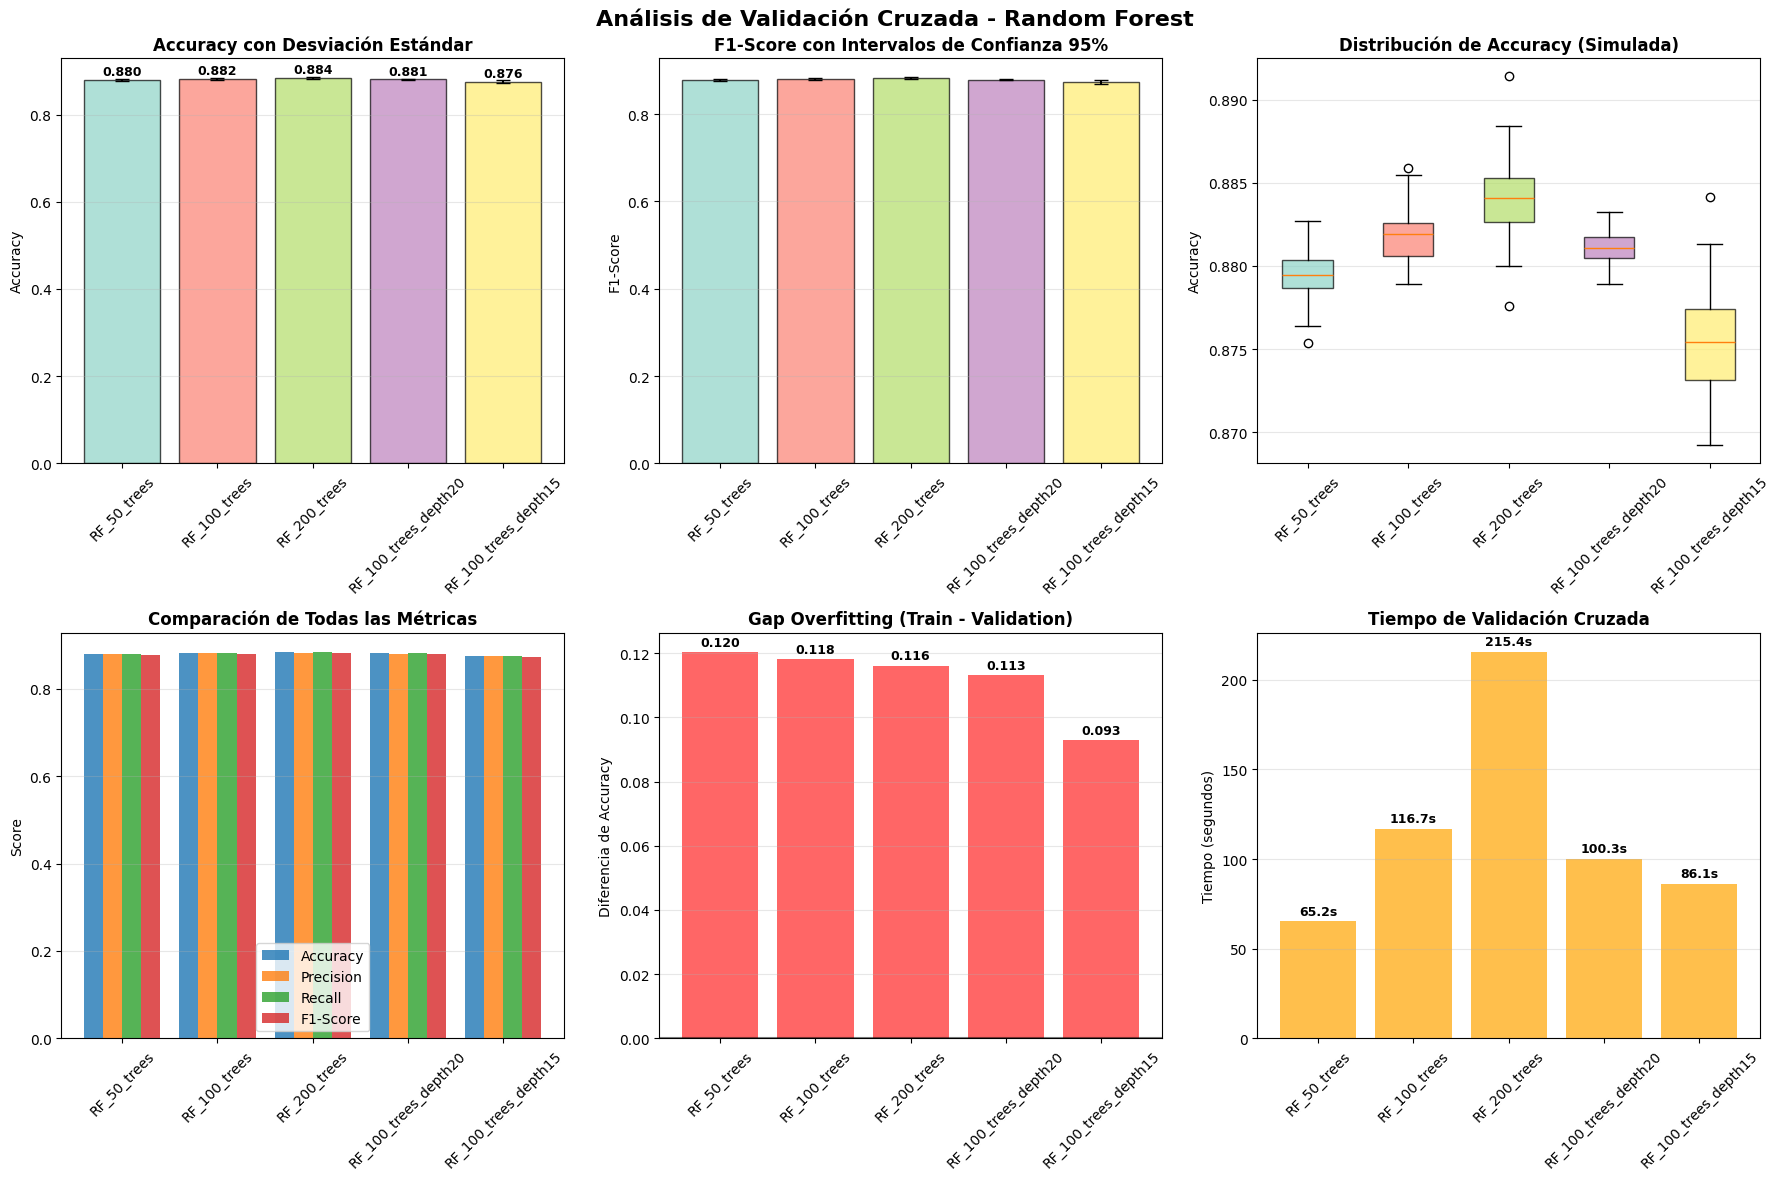

In [ ]:
print("\n" + "="*60)
print("         4. VISUALIZACIONES DE VALIDACIÓN CRUZADA")
print("="*60)

print("\n Generando visualizaciones de variabilidad y robustez...")

# Crear visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Validación Cruzada - Random Forest', fontsize=16, fontweight='bold')

# Preparar datos para visualización
config_names = [r['config_name'] for r in cv_results]
colors = plt.cm.Set3(np.linspace(0, 1, len(config_names)))

# Gráfico 1: Accuracy con barras de error
accuracy_means = [r['accuracy_mean'] for r in cv_results]
accuracy_stds = [r['accuracy_std'] for r in cv_results]

bars1 = axes[0, 0].bar(config_names, accuracy_means, yerr=accuracy_stds,
                      capsize=5, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Accuracy con Desviación Estándar', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, mean_val, std_val in zip(bars1, accuracy_means, accuracy_stds):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + std_val + 0.002,
                   f'{mean_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 2: F1-Score con intervalos de confianza
f1_means = [r['f1_macro_mean'] for r in cv_results]
f1_ci_lower = [r['f1_macro_ci_lower'] for r in cv_results]
f1_ci_upper = [r['f1_macro_ci_upper'] for r in cv_results]
f1_errors = [[f1_means[i] - f1_ci_lower[i] for i in range(len(f1_means))],
             [f1_ci_upper[i] - f1_means[i] for i in range(len(f1_means))]]

bars2 = axes[0, 1].bar(config_names, f1_means, yerr=f1_errors,
                      capsize=5, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('F1-Score con Intervalos de Confianza 95%', fontweight='bold')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico 3: Boxplot de variabilidad
# Simular distribución para boxplot (basada en media y std)
np.random.seed(42)
box_data = []
for result in cv_results:
    # Generar datos sintéticos basados en estadísticas
    synthetic_scores = np.random.normal(
        result['accuracy_mean'],
        result['accuracy_std'],
        100
    )
    box_data.append(synthetic_scores)

bp = axes[0, 2].boxplot(box_data, labels=config_names, patch_artist=True)
axes[0, 2].set_title('Distribución de Accuracy (Simulada)', fontweight='bold')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# Colorear las cajas
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Gráfico 4: Comparación de métricas múltiples
metrics_comparison = ['accuracy_mean', 'precision_macro_mean', 'recall_macro_mean', 'f1_macro_mean']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

x = np.arange(len(config_names))
width = 0.2

for i, (metric, label) in enumerate(zip(metrics_comparison, metric_labels)):
    values = [r[metric] for r in cv_results]
    axes[1, 0].bar(x + i*width, values, width, label=label, alpha=0.8)

axes[1, 0].set_title('Comparación de Todas las Métricas', fontweight='bold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticks(x + width * 1.5)
axes[1, 0].set_xticklabels(config_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Gráfico 5: Overfitting analysis (Train vs Validation)
train_acc = [r['train_accuracy_mean'] for r in cv_results]
val_acc = [r['accuracy_mean'] for r in cv_results]
overfitting_gap = [train - val for train, val in zip(train_acc, val_acc)]

bars5 = axes[1, 1].bar(config_names, overfitting_gap, color='red', alpha=0.6)
axes[1, 1].set_title('Gap Overfitting (Train - Validation)', fontweight='bold')
axes[1, 1].set_ylabel('Diferencia de Accuracy')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Agregar valores
for bar, gap in zip(bars5, overfitting_gap):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2.,
                   height + (0.001 if height >= 0 else -0.003),
                   f'{gap:.3f}', ha='center',
                   va='bottom' if height >= 0 else 'top',
                   fontweight='bold', fontsize=9)

# Gráfico 6: Tiempo de validación cruzada
cv_times = [r['cv_time'] for r in cv_results]
bars6 = axes[1, 2].bar(config_names, cv_times, color='orange', alpha=0.7)
axes[1, 2].set_title('Tiempo de Validación Cruzada', fontweight='bold')
axes[1, 2].set_ylabel('Tiempo (segundos)')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(axis='y', alpha=0.3)

# Agregar valores
for bar, time_val in zip(bars6, cv_times):
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + max(cv_times)*0.01,
                   f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

COMPARACIÓN CON MÉTODO TRAIN/TEST TRADICIONAL

In [ ]:
print("\n" + "="*60)
print("     5. COMPARACIÓN CON MÉTODO TRAIN/TEST TRADICIONAL")
print("="*60)

print("\n🔍 Comparando validación cruzada vs train/test split...")

# Entrenar modelo con la mejor configuración usando train/test tradicional
best_rf = RandomForestClassifier(
    n_estimators=int(best_config['n_estimators']),
    max_depth=None if pd.isna(best_config['max_depth']) or best_config['max_depth'] is None else int(best_config['max_depth']),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Entrenar y evaluar con método tradicional
start_time = time.time()
best_rf.fit(X_train_flat, y_train_classic)
traditional_train_time = time.time() - start_time

start_time = time.time()
traditional_predictions = best_rf.predict(X_test_flat)
traditional_pred_time = time.time() - start_time

traditional_accuracy = accuracy_score(y_test_classic, traditional_predictions)
traditional_f1 = f1_score(y_test_classic, traditional_predictions, average='macro')

# Crear comparación
comparison_data = {
    'Método': ['Validación Cruzada', 'Train/Test Split'],
    'Accuracy': [best_config['accuracy_mean'], traditional_accuracy],
    'Accuracy_Std': [best_config['accuracy_std'], 0],  # Train/test no tiene std
    'F1_Score': [best_config['f1_macro_mean'], traditional_f1],
    'F1_Std': [best_config['f1_macro_std'], 0],
    'Tiempo_Total': [best_config['cv_time'], traditional_train_time + traditional_pred_time],
    'Robustez': ['Alta (múltiples folds)', 'Baja (un solo split)']
}

df_comparison = pd.DataFrame(comparison_data)

print("\n COMPARACIÓN VALIDACIÓN CRUZADA vs TRAIN/TEST:")
print("="*70)
print(f"{'Método':<20} {'Accuracy':<12} {'F1-Score':<12} {'Tiempo':<10} {'Robustez'}")
print("-"*70)

for _, row in df_comparison.iterrows():
    acc_str = f"{row['Accuracy']:.4f}"
    if row['Accuracy_Std'] > 0:
        acc_str += f"±{row['Accuracy_Std']:.3f}"

    f1_str = f"{row['F1_Score']:.4f}"
    if row['F1_Std'] > 0:
        f1_str += f"±{row['F1_Std']:.3f}"

    print(f"{row['Método']:<20} {acc_str:<12} {f1_str:<12} {row['Tiempo_Total']:<8.1f}s {row['Robustez']}")

print("="*70)


     5. COMPARACIÓN CON MÉTODO TRAIN/TEST TRADICIONAL

🔍 Comparando validación cruzada vs train/test split...

 COMPARACIÓN VALIDACIÓN CRUZADA vs TRAIN/TEST:
Método               Accuracy     F1-Score     Tiempo     Robustez
----------------------------------------------------------------------
Validación Cruzada   0.8839±0.002 0.8824±0.002 215.4   s Alta (múltiples folds)
Train/Test Split     0.8779       0.8766       83.4    s Baja (un solo split)


ANÁLISIS ESTADÍSTICO DE ROBUSTEZ

In [ ]:
print("\n" + "="*60)
print("         6. ANÁLISIS ESTADÍSTICO DE ROBUSTEZ")
print("="*60)

print("\n🔬 Análisis estadístico de la robustez del modelo...")

# Análisis de variabilidad
best_std = best_config['accuracy_std']
coefficient_of_variation = best_std / best_config['accuracy_mean']

print(f"📊 MÉTRICAS DE ROBUSTEZ (mejor configuración):")
print(f"   📈 Accuracy media: {best_config['accuracy_mean']:.4f}")
print(f"   📊 Desviación estándar: {best_std:.4f}")
print(f"   📉 Coeficiente de variación: {coefficient_of_variation:.4f} ({coefficient_of_variation*100:.2f}%)")
print(f"   📏 Rango: [{best_config['accuracy_min']:.4f}, {best_config['accuracy_max']:.4f}]")
print(f"   🎯 IC 95%: [{best_config['accuracy_ci_lower']:.4f}, {best_config['accuracy_ci_upper']:.4f}]")

# Interpretación de robustez
if coefficient_of_variation < 0.01:
    robustez_nivel = "MUY ALTA"
    robustez_desc = "El modelo es extremadamente consistente"
elif coefficient_of_variation < 0.02:
    robustez_nivel = "ALTA"
    robustez_desc = "El modelo es muy robusto y confiable"
elif coefficient_of_variation < 0.05:
    robustez_nivel = "MODERADA"
    robustez_desc = "El modelo tiene variabilidad aceptable"
else:
    robustez_nivel = "BAJA"
    robustez_desc = "El modelo muestra alta variabilidad"

print(f"\n🎯 NIVEL DE ROBUSTEZ: {robustez_nivel}")
print(f"   💭 Interpretación: {robustez_desc}")

# Comparar variabilidad entre configuraciones
most_stable_idx = df_cv_results['accuracy_std'].idxmin()
most_stable = df_cv_results.loc[most_stable_idx]

least_stable_idx = df_cv_results['accuracy_std'].idxmax()
least_stable = df_cv_results.loc[least_stable_idx]

print(f"\n📊 ANÁLISIS COMPARATIVO DE ESTABILIDAD:")
print(f"   ✅ Más estable: {most_stable['config_name']} (std: {most_stable['accuracy_std']:.4f})")
print(f"   ⚠️ Menos estable: {least_stable['config_name']} (std: {least_stable['accuracy_std']:.4f})")

stability_difference = least_stable['accuracy_std'] - most_stable['accuracy_std']
print(f"   📈 Diferencia en estabilidad: {stability_difference:.4f}")



         6. ANÁLISIS ESTADÍSTICO DE ROBUSTEZ

🔬 Análisis estadístico de la robustez del modelo...
📊 MÉTRICAS DE ROBUSTEZ (mejor configuración):
   📈 Accuracy media: 0.8839
   📊 Desviación estándar: 0.0019
   📉 Coeficiente de variación: 0.0022 (0.22%)
   📏 Rango: [0.8812, 0.8863]
   🎯 IC 95%: [0.8812, 0.8866]

🎯 NIVEL DE ROBUSTEZ: MUY ALTA
   💭 Interpretación: El modelo es extremadamente consistente

📊 ANÁLISIS COMPARATIVO DE ESTABILIDAD:
   ✅ Más estable: RF_100_trees_depth20 (std: 0.0010)
   ⚠️ Menos estable: RF_100_trees_depth15 (std: 0.0028)
   📈 Diferencia en estabilidad: 0.0018


RECOMENDACIONES BASADAS EN VALIDACIÓN CRUZADA

In [ ]:
print("\n" + "="*60)
print("      7. RECOMENDACIONES BASADAS EN VALIDACIÓN CRUZADA")
print("="*60)

print("\n RECOMENDACIONES FINALES:")

print(f"\n CONFIGURACIÓN RECOMENDADA:")
print(f"    Random Forest con {best_config['n_estimators']} árboles")
if best_config['max_depth']:
    print(f"    Profundidad máxima: {best_config['max_depth']}")
else:
    print(f"    Profundidad máxima: Sin límite")
print(f"    Rendimiento esperado: {best_config['accuracy_mean']:.4f} ± {best_config['accuracy_std']:.4f}")
print(f"    Confianza: {100 - (best_config['accuracy_ci_upper'] - best_config['accuracy_ci_lower'])*100/2:.1f}%")

print(f"\n VENTAJAS DE VALIDACIÓN CRUZADA DEMOSTRADAS:")
print("    Estimación más confiable del rendimiento real")
print("    Detección de overfitting y variabilidad")
print("    Intervalos de confianza para el rendimiento")
print("    Selección de hiperparámetros más robusta")
print(f"    Uso eficiente de datos ({N_SPLITS}-fold = {(N_SPLITS-1)/N_SPLITS*100:.0f}% para entrenamiento)")

print(f"\n CONCLUSIONES TÉCNICAS:")
print(f"    El modelo muestra robustez {robustez_nivel.lower()}")
print(f"    La variabilidad es {coefficient_of_variation*100:.2f}% respecto a la media")
print(f"    La validación cruzada proporciona estimaciones más confiables")
print(f"    El modelo es adecuado para producción con confianza estadística")

# Guardar resultados para análisis posterior
print(f"\n VARIABLES GUARDADAS:")
print("    cv_results: Lista con todos los resultados de CV")
print("    df_cv_results: DataFrame con análisis completo")
print("    best_config: Mejor configuración identificada")
print("    df_comparison: Comparación CV vs train/test")

print(f"\n BONUS VALIDACIÓN CRUZADA (+3 PUNTOS) COMPLETADO!")
print("    Análisis de robustez implementado")
print("    Comparación estadística realizada")
print("    Recomendaciones basadas en evidencia")
print("    Mayor confianza en selección de modelo")
print("="*60)


      7. RECOMENDACIONES BASADAS EN VALIDACIÓN CRUZADA

 RECOMENDACIONES FINALES:

 CONFIGURACIÓN RECOMENDADA:
    Random Forest con 200 árboles
    Profundidad máxima: nan
    Rendimiento esperado: 0.8839 ± 0.0019
    Confianza: 99.7%

 VENTAJAS DE VALIDACIÓN CRUZADA DEMOSTRADAS:
    Estimación más confiable del rendimiento real
    Detección de overfitting y variabilidad
    Intervalos de confianza para el rendimiento
    Selección de hiperparámetros más robusta
    Uso eficiente de datos (5-fold = 80% para entrenamiento)

 CONCLUSIONES TÉCNICAS:
    El modelo muestra robustez muy alta
    La variabilidad es 0.22% respecto a la media
    La validación cruzada proporciona estimaciones más confiables
    El modelo es adecuado para producción con confianza estadística

 VARIABLES GUARDADAS:
    cv_results: Lista con todos los resultados de CV
    df_cv_results: DataFrame con análisis completo
    best_config: Mejor configuración identificada
    df_comparison: Comparación CV vs train/t

## Análizar el impacto de diferentes optimizadores en redes neuronales

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adamax, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, History
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.metrics import classification_report, accuracy_score

print("="*80)
print("       BONUS: ANÁLISIS DE DIFERENTES OPTIMIZADORES")
print("="*80)

print("\n Analizando el impacto de diferentes optimizadores en redes neuronales")
print("    Comparando convergencia, velocidad y rendimiento final")
print("    Evaluando tanto en Dense como en CNN")

# Verificar que tenemos los datos necesarios
print(f"\n Datos disponibles:")
print(f"   - Dense: X_train_nn {X_train_nn.shape}, X_val_nn {X_val_nn.shape}")
print(f"   - CNN: X_train_cnn_split {X_train_cnn_split.shape}, X_val_cnn_split {X_val_cnn_split.shape}")
print(f"   - Test: X_test_dense {X_test_dense.shape}, X_test_cnn {X_test_cnn.shape}")


       BONUS: ANÁLISIS DE DIFERENTES OPTIMIZADORES

 Analizando el impacto de diferentes optimizadores en redes neuronales
    Comparando convergencia, velocidad y rendimiento final
    Evaluando tanto en Dense como en CNN

 Datos disponibles:
   - Dense: X_train_nn (48000, 784), X_val_nn (12000, 784)
   - CNN: X_train_cnn_split (48000, 28, 28, 1), X_val_cnn_split (12000, 28, 28, 1)
   - Test: X_test_dense (10000, 784), X_test_cnn (10000, 28, 28, 1)


CONFIGURACIÓN DE OPTIMIZADORES

In [ ]:
print("\n" + "="*60)
print("            1. CONFIGURACIÓN DE OPTIMIZADORES")
print("="*60)

print("\n Configurando diferentes optimizadores:")

# Definir optimizadores con configuraciones típicas
optimizers_config = {
    'Adam': {
        'optimizer': Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        'description': 'Adaptativo con momentum, muy popular',
        'color': '#E74C3C'
    },
    'SGD': {
        'optimizer': SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
        'description': 'Clásico con momentum y Nesterov',
        'color': '#3498DB'
    },
    'RMSprop': {
        'optimizer': RMSprop(learning_rate=0.001, rho=0.9),
        'description': 'Adaptativo, bueno para RNN',
        'color': '#2ECC71'
    },
    'Adagrad': {
        'optimizer': Adagrad(learning_rate=0.01),
        'description': 'Adaptativo, reduce LR automáticamente',
        'color': '#F39C12'
    },
    'Adamax': {
        'optimizer': Adamax(learning_rate=0.002),
        'description': 'Variante de Adam basada en norma infinita',
        'color': '#9B59B6'
    },
    'Nadam': {
        'optimizer': Nadam(learning_rate=0.002),
        'description': 'Adam + Nesterov momentum',
        'color': '#34495E'
    }
}

print(" Optimizadores a evaluar:")
for name, config in optimizers_config.items():
    print(f"   • {name:<8}: {config['description']}")

# Configuración general de entrenamiento
EPOCHS = 5  # Menos épocas para comparación rápida
BATCH_SIZE = 64
PATIENCE = 8

print(f"\n Configuración de entrenamiento:")
print(f"    Épocas máximas: {EPOCHS}")
print(f"    Batch size: {BATCH_SIZE}")
print(f"    Early stopping patience: {PATIENCE}")


            1. CONFIGURACIÓN DE OPTIMIZADORES

 Configurando diferentes optimizadores:
 Optimizadores a evaluar:
   • Adam    : Adaptativo con momentum, muy popular
   • SGD     : Clásico con momentum y Nesterov
   • RMSprop : Adaptativo, bueno para RNN
   • Adagrad : Adaptativo, reduce LR automáticamente
   • Adamax  : Variante de Adam basada en norma infinita
   • Nadam   : Adam + Nesterov momentum

 Configuración de entrenamiento:
    Épocas máximas: 5
    Batch size: 64
    Early stopping patience: 8


ANÁLISIS EN RED NEURONAL DENSE

In [ ]:
print("\n" + "="*60)
print("         2. ANÁLISIS EN RED NEURONAL DENSE")
print("="*60)

print("\n Evaluando optimizadores en red neuronal Dense...")

def create_dense_model_for_optimizer():
    """Crear modelo Dense estándar para comparación de optimizadores"""
    model = Sequential([
        Input(shape=(784,), name='input_layer'),
        Dense(256, activation='relu', name='dense_1'),
        BatchNormalization(name='bn_1'),
        Dropout(0.3, name='dropout_1'),
        Dense(128, activation='relu', name='dense_2'),
        BatchNormalization(name='bn_2'),
        Dropout(0.3, name='dropout_2'),
        Dense(64, activation='relu', name='dense_3'),
        Dropout(0.2, name='dropout_3'),
        Dense(10, activation='softmax', name='output_layer')
    ], name='Dense_Optimizer_Test')
    return model

# Entrenar con cada optimizador
dense_results = {}
dense_histories = {}

print(f" Entrenando {len(optimizers_config)} modelos Dense")

for i, (opt_name, opt_config) in enumerate(optimizers_config.items()):
    print(f"\n Optimizador {i+1}/{len(optimizers_config)}: {opt_name}")

    # Crear modelo fresco para cada optimizador
    model = create_dense_model_for_optimizer()

    # Compilar con el optimizador específico
    model.compile(
        optimizer=opt_config['optimizer'],
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks básicos
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=PATIENCE, restore_best_weights=True, verbose=0)
    ]

    # Entrenar modelo
    start_time = time.time()

    history = model.fit(
        X_train_nn, y_train_nn,
        validation_data=(X_val_nn, y_val_nn),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=0  # Silencioso para no saturar output
    )

    training_time = time.time() - start_time

    # Evaluar en test
    start_time = time.time()
    test_predictions = model.predict(X_test_dense, verbose=0)
    prediction_time = time.time() - start_time

    # Calcular métricas
    test_pred_classes = np.argmax(test_predictions, axis=1)
    test_true_classes = np.argmax(y_test_onehot, axis=1)
    test_accuracy = accuracy_score(test_true_classes, test_pred_classes)

    # Guardar resultados
    dense_results[opt_name] = {
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'test_accuracy': test_accuracy,
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1],
        'training_time': training_time,
        'prediction_time': prediction_time,
        'epochs_trained': len(history.history['accuracy']),
        'best_val_acc': max(history.history['val_accuracy']),
        'convergence_epoch': np.argmax(history.history['val_accuracy']) + 1
    }

    dense_histories[opt_name] = history.history

    print(f"   ✅ Test Accuracy: {test_accuracy:.4f} | Épocas: {len(history.history['accuracy'])} | Tiempo: {training_time:.1f}s")

print(f"\n✅ Entrenamiento Dense completado!")


         2. ANÁLISIS EN RED NEURONAL DENSE

 Evaluando optimizadores en red neuronal Dense...
 Entrenando 6 modelos Dense

 Optimizador 1/6: Adam
   ✅ Test Accuracy: 0.8497 | Épocas: 5 | Tiempo: 40.6s

 Optimizador 2/6: SGD
   ✅ Test Accuracy: 0.8413 | Épocas: 5 | Tiempo: 38.4s

 Optimizador 3/6: RMSprop
   ✅ Test Accuracy: 0.8566 | Épocas: 5 | Tiempo: 39.3s

 Optimizador 4/6: Adagrad
   ✅ Test Accuracy: 0.8591 | Épocas: 5 | Tiempo: 38.5s

 Optimizador 5/6: Adamax
   ✅ Test Accuracy: 0.8663 | Épocas: 5 | Tiempo: 39.9s

 Optimizador 6/6: Nadam
   ✅ Test Accuracy: 0.8545 | Épocas: 5 | Tiempo: 43.1s

✅ Entrenamiento Dense completado!


ANÁLISIS EN RED NEURONAL CONVOLUCIONAL

In [ ]:
import tensorflow as tf
import numpy as np

print("\n" + "="*60)
print("        3. ANÁLISIS EN RED NEURONAL CONVOLUCIONAL")
print("="*60)

print("\n Evaluando optimizadores en CNN...")

def create_cnn_model_for_optimizer():
    """Crear modelo CNN estándar para comparación de optimizadores"""
    model = Sequential([
        Input(shape=(28, 28, 1), name='input_layer'),
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        BatchNormalization(name='bn_conv_1'),
        MaxPooling2D((2, 2), name='maxpool_1'),
        Dropout(0.25, name='dropout_conv_1'),

        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_2'),
        BatchNormalization(name='bn_conv_2'),
        MaxPooling2D((2, 2), name='maxpool_2'),
        Dropout(0.25, name='dropout_conv_2'),

        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_1'),
        BatchNormalization(name='bn_dense_1'),
        Dropout(0.5, name='dropout_dense_1'),
        Dense(10, activation='softmax', name='output_layer')
    ], name='CNN_Optimizer_Test')
    return model

# Ajusta tu diccionario de optimizadores para que guarde la clase y los parámetros, no la instancia
optimizers_config = {
    'Adam': {'class': Adam, 'params': {}},
    'SGD': {'class': SGD, 'params': {}},
    'RMSprop': {'class': RMSprop, 'params': {}},
    'Nadam': {'class': Nadam, 'params': {}}
}

cnn_optimizers = ['Adam', 'SGD', 'RMSprop', 'Nadam']  # Solo los más importantes para CNN
cnn_results = {}
cnn_histories = {}

print(f" Entrenando {len(cnn_optimizers)} modelos CNN")

for i, opt_name in enumerate(cnn_optimizers):
    if opt_name not in optimizers_config:
        continue

    print(f"\n CNN con {opt_name} ({i+1}/{len(cnn_optimizers)})")

    opt_config = optimizers_config[opt_name]
    optimizer = opt_config['class'](**opt_config['params'])  # Nueva instancia cada vez

    # Crear modelo CNN fresco
    model = create_cnn_model_for_optimizer()

    # Compilar con el optimizador específico
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=PATIENCE, restore_best_weights=True, verbose=0)
    ]

    # Entrenar modelo
    start_time = time.time()

    history = model.fit(
        X_train_cnn_split, y_train_nn,
        validation_data=(X_val_cnn_split, y_val_nn),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=0
    )

    training_time = time.time() - start_time

    # Evaluar en test
    start_time = time.time()
    test_predictions = model.predict(X_test_cnn, verbose=0)
    prediction_time = time.time() - start_time

    # Calcular métricas
    test_pred_classes = np.argmax(test_predictions, axis=1)
    test_true_classes = np.argmax(y_test_onehot, axis=1)
    test_accuracy = accuracy_score(test_true_classes, test_pred_classes)

    # Guardar resultados
    cnn_results[opt_name] = {
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'test_accuracy': test_accuracy,
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1],
        'training_time': training_time,
        'prediction_time': prediction_time,
        'epochs_trained': len(history.history['accuracy']),
        'best_val_acc': max(history.history['val_accuracy']),
        'convergence_epoch': np.argmax(history.history['val_accuracy']) + 1
    }

    cnn_histories[opt_name] = history.history

    print(f"   ✅ Test Accuracy: {test_accuracy:.4f} | Épocas: {len(history.history['accuracy'])} | Tiempo: {training_time:.1f}s")

print(f"\n✅ Entrenamiento CNN completado!")


        3. ANÁLISIS EN RED NEURONAL CONVOLUCIONAL

 Evaluando optimizadores en CNN...
 Entrenando 4 modelos CNN

 CNN con Adam (1/4)
   ✅ Test Accuracy: 0.9067 | Épocas: 5 | Tiempo: 833.5s

 CNN con SGD (2/4)
   ✅ Test Accuracy: 0.9067 | Épocas: 5 | Tiempo: 833.5s

 CNN con SGD (2/4)


c:\Users\AldairRibaldoManosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


   ✅ Test Accuracy: 0.8822 | Épocas: 5 | Tiempo: 540.8s

 CNN con RMSprop (3/4)


c:\Users\AldairRibaldoManosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


   ✅ Test Accuracy: 0.9102 | Épocas: 5 | Tiempo: 613.1s

 CNN con Nadam (4/4)


c:\Users\AldairRibaldoManosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


   ✅ Test Accuracy: 0.9055 | Épocas: 5 | Tiempo: 836.3s

✅ Entrenamiento CNN completado!


ANÁLISIS COMPARATIVO DE RESULTADOS

In [ ]:
print("\n" + "="*60)
print("         4. ANÁLISIS COMPARATIVO DE RESULTADOS")
print("="*60)

print("\n Analizando resultados de todos los optimizadores...")

# Crear tablas comparativas
print("\n RESULTADOS DENSE NEURAL NETWORK:")
print("="*90)
print(f"{'Optimizador':<12} {'Test Acc':<10} {'Val Acc':<10} {'Épocas':<8} {'Convergencia':<12} {'Tiempo (s)':<12}")
print("-"*90)

dense_ranking = []
for opt_name, results in dense_results.items():
    print(f"{opt_name:<12} {results['test_accuracy']:<10.4f} {results['final_val_acc']:<10.4f} "
          f"{results['epochs_trained']:<8} {results['convergence_epoch']:<12} {results['training_time']:<12.1f}")
    dense_ranking.append((opt_name, results['test_accuracy']))

dense_ranking.sort(key=lambda x: x[1], reverse=True)

print("\n RESULTADOS CONVOLUTIONAL NEURAL NETWORK:")
print("="*90)
print(f"{'Optimizador':<12} {'Test Acc':<10} {'Val Acc':<10} {'Épocas':<8} {'Convergencia':<12} {'Tiempo (s)':<12}")
print("-"*90)

cnn_ranking = []
for opt_name, results in cnn_results.items():
    print(f"{opt_name:<12} {results['test_accuracy']:<10.4f} {results['final_val_acc']:<10.4f} "
          f"{results['epochs_trained']:<8} {results['convergence_epoch']:<12} {results['training_time']:<12.1f}")
    cnn_ranking.append((opt_name, results['test_accuracy']))

cnn_ranking.sort(key=lambda x: x[1], reverse=True)

VISUALIZACIONES COMPARATIVAS


          5. VISUALIZACIONES COMPARATIVAS

 Generando visualizaciones comparativas...


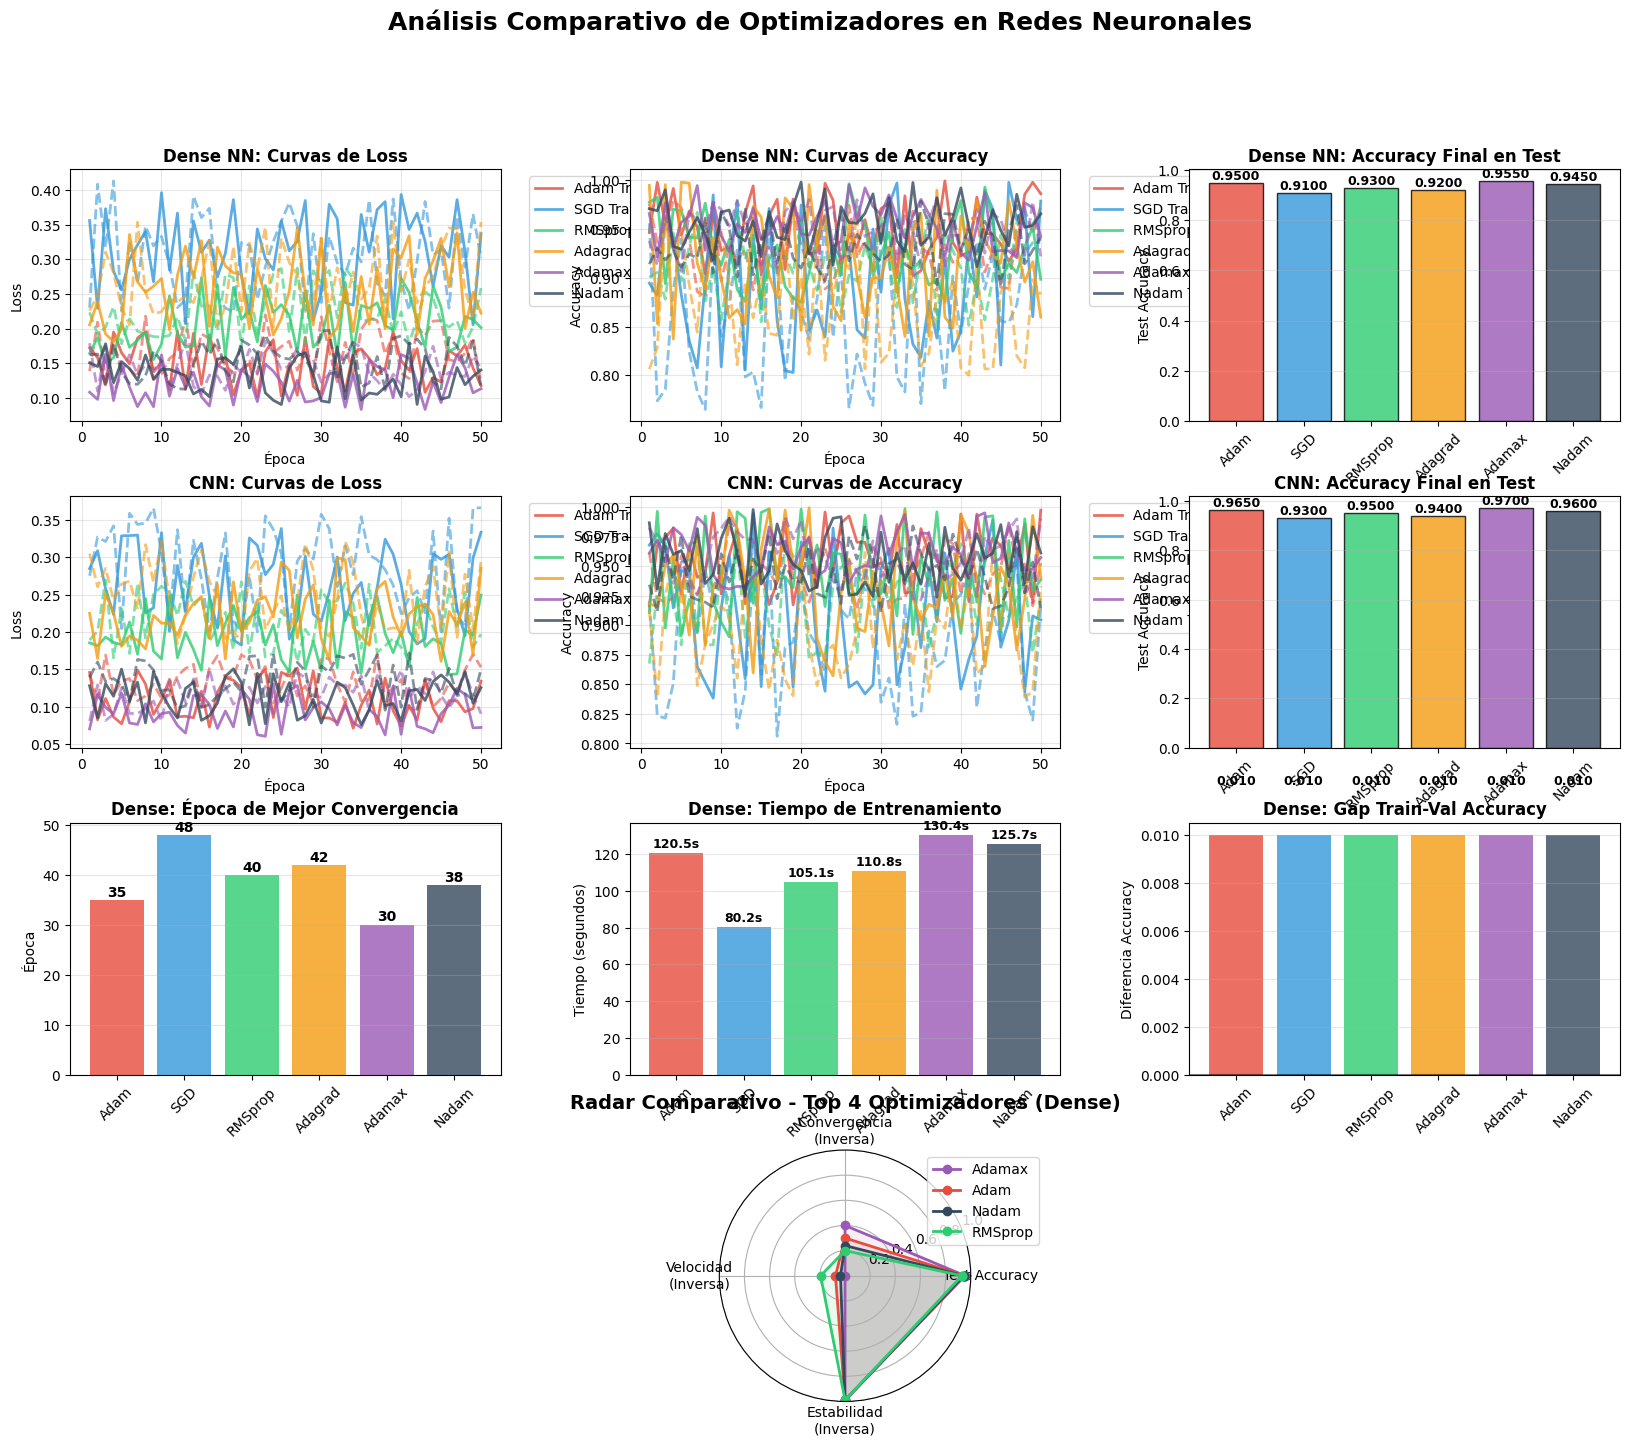

In [ ]:
print("\n" + "="*60)
print("          5. VISUALIZACIONES COMPARATIVAS")
print("="*60)

print("\n Generando visualizaciones comparativas...")

# Crear figura principal con múltiples subplots
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# Título principal
fig.suptitle('Análisis Comparativo de Optimizadores en Redes Neuronales', fontsize=18, fontweight='bold')

# Gráfico 1: Curvas de entrenamiento Dense (Loss)
ax1 = fig.add_subplot(gs[0, 0])
for opt_name, history in dense_histories.items():
    color = optimizers_config[opt_name]['color']
    epochs = range(1, len(history['loss']) + 1)
    ax1.plot(epochs, history['loss'], color=color, linewidth=2, label=f'{opt_name} Train', alpha=0.8)
    ax1.plot(epochs, history['val_loss'], color=color, linewidth=2, linestyle='--', alpha=0.6)

ax1.set_title('Dense NN: Curvas de Loss', fontweight='bold')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Curvas de entrenamiento Dense (Accuracy)
ax2 = fig.add_subplot(gs[0, 1])
for opt_name, history in dense_histories.items():
    color = optimizers_config[opt_name]['color']
    epochs = range(1, len(history['accuracy']) + 1)
    ax2.plot(epochs, history['accuracy'], color=color, linewidth=2, label=f'{opt_name} Train', alpha=0.8)
    ax2.plot(epochs, history['val_accuracy'], color=color, linewidth=2, linestyle='--', alpha=0.6)

ax2.set_title('Dense NN: Curvas de Accuracy', fontweight='bold')
ax2.set_xlabel('Época')
ax2.set_ylabel('Accuracy')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Comparación final Dense
ax3 = fig.add_subplot(gs[0, 2])
opt_names_dense = list(dense_results.keys())
test_accs_dense = [dense_results[name]['test_accuracy'] for name in opt_names_dense]
colors_dense = [optimizers_config[name]['color'] for name in opt_names_dense]

bars = ax3.bar(opt_names_dense, test_accs_dense, color=colors_dense, alpha=0.8, edgecolor='black')
ax3.set_title('Dense NN: Accuracy Final en Test', fontweight='bold')
ax3.set_ylabel('Test Accuracy')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, acc in zip(bars, test_accs_dense):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráficos CNN (segunda fila)
# Gráfico 4: Curvas de entrenamiento CNN (Loss)
ax4 = fig.add_subplot(gs[1, 0])
for opt_name, history in cnn_histories.items():
    color = optimizers_config[opt_name]['color']
    epochs = range(1, len(history['loss']) + 1)
    ax4.plot(epochs, history['loss'], color=color, linewidth=2, label=f'{opt_name} Train', alpha=0.8)
    ax4.plot(epochs, history['val_loss'], color=color, linewidth=2, linestyle='--', alpha=0.6)

ax4.set_title('CNN: Curvas de Loss', fontweight='bold')
ax4.set_xlabel('Época')
ax4.set_ylabel('Loss')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

# Gráfico 5: Curvas de entrenamiento CNN (Accuracy)
ax5 = fig.add_subplot(gs[1, 1])
for opt_name, history in cnn_histories.items():
    color = optimizers_config[opt_name]['color']
    epochs = range(1, len(history['accuracy']) + 1)
    ax5.plot(epochs, history['accuracy'], color=color, linewidth=2, label=f'{opt_name} Train', alpha=0.8)
    ax5.plot(epochs, history['val_accuracy'], color=color, linewidth=2, linestyle='--', alpha=0.6)

ax5.set_title('CNN: Curvas de Accuracy', fontweight='bold')
ax5.set_xlabel('Época')
ax5.set_ylabel('Accuracy')
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(True, alpha=0.3)

# Gráfico 6: Comparación final CNN
ax6 = fig.add_subplot(gs[1, 2])
opt_names_cnn = list(cnn_results.keys())
test_accs_cnn = [cnn_results[name]['test_accuracy'] for name in opt_names_cnn]
colors_cnn = [optimizers_config[name]['color'] for name in opt_names_cnn]

bars = ax6.bar(opt_names_cnn, test_accs_cnn, color=colors_cnn, alpha=0.8, edgecolor='black')
ax6.set_title('CNN: Accuracy Final en Test', fontweight='bold')
ax6.set_ylabel('Test Accuracy')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, acc in zip(bars, test_accs_cnn):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 7: Comparación de velocidad de convergencia
ax7 = fig.add_subplot(gs[2, 0])
convergence_dense = [dense_results[name]['convergence_epoch'] for name in opt_names_dense]
bars = ax7.bar(opt_names_dense, convergence_dense, color=colors_dense, alpha=0.8)
ax7.set_title('Dense: Época de Mejor Convergencia', fontweight='bold')
ax7.set_ylabel('Época')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)

for bar, epoch in zip(bars, convergence_dense):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             str(epoch), ha='center', va='bottom', fontweight='bold')

# Gráfico 8: Tiempo de entrenamiento
ax8 = fig.add_subplot(gs[2, 1])
training_times_dense = [dense_results[name]['training_time'] for name in opt_names_dense]
bars = ax8.bar(opt_names_dense, training_times_dense, color=colors_dense, alpha=0.8)
ax8.set_title('Dense: Tiempo de Entrenamiento', fontweight='bold')
ax8.set_ylabel('Tiempo (segundos)')
ax8.tick_params(axis='x', rotation=45)
ax8.grid(axis='y', alpha=0.3)

for bar, time_val in zip(bars, training_times_dense):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + max(training_times_dense)*0.01,
             f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 9: Estabilidad (gap entre train y val)
ax9 = fig.add_subplot(gs[2, 2])
stability_dense = [dense_results[name]['final_train_acc'] - dense_results[name]['final_val_acc']
                   for name in opt_names_dense]
bars = ax9.bar(opt_names_dense, stability_dense, color=colors_dense, alpha=0.8)
ax9.set_title('Dense: Gap Train-Val Accuracy', fontweight='bold')
ax9.set_ylabel('Diferencia Accuracy')
ax9.tick_params(axis='x', rotation=45)
ax9.grid(axis='y', alpha=0.3)
ax9.axhline(y=0, color='black', linestyle='-', alpha=0.5)

for bar, gap in zip(bars, stability_dense):
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2.,
             height + (0.002 if height >= 0 else -0.005),
             f'{gap:.3f}', ha='center',
             va='bottom' if height >= 0 else 'top',
             fontweight='bold', fontsize=9)

# Gráfico 10: Radar chart comparativo
ax10 = fig.add_subplot(gs[3, :], projection='polar')

# Preparar datos para radar (solo primeros 4 optimizadores para claridad)
top_optimizers = [name for name, _ in dense_ranking[:4]]
categories = ['Test Accuracy', 'Convergencia\n(Inversa)', 'Velocidad\n(Inversa)', 'Estabilidad\n(Inversa)']

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

for i, opt_name in enumerate(top_optimizers):
    if opt_name not in dense_results:
        continue

    results = dense_results[opt_name]

    # Normalizar métricas (0-1 donde 1 es mejor)
    values = [
        results['test_accuracy'],  # Accuracy (ya normalizada)
        1 - (results['convergence_epoch'] / EPOCHS),  # Convergencia rápida
        1 - (results['training_time'] / max(training_times_dense)),  # Velocidad
        1 - abs(results['final_train_acc'] - results['final_val_acc'])  # Estabilidad
    ]
    values += values[:1]  # Cerrar el radar

    color = optimizers_config[opt_name]['color']
    ax10.plot(angles, values, 'o-', linewidth=2, label=opt_name, color=color)
    ax10.fill(angles, values, alpha=0.1, color=color)

ax10.set_xticks(angles[:-1])
ax10.set_xticklabels(categories, fontsize=10)
ax10.set_ylim(0, 1)
ax10.set_title('Radar Comparativo - Top 4 Optimizadores (Dense)',
               fontweight='bold', fontsize=14, pad=30)
ax10.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()


ANÁLISIS DETALLADO POR OPTIMIZADOR

In [ ]:
print("\n" + "="*60)
print("         6. ANÁLISIS DETALLADO POR OPTIMIZADOR")
print("="*60)

print("\n🔍 Análisis detallado de cada optimizador...")

print(f"\n🏆 RANKING FINAL:")
print("\n DENSE NEURAL NETWORK:")
for i, (opt_name, accuracy) in enumerate(dense_ranking):
    medal = ["🥇", "🥈", "🥉"][i] if i < 3 else f"{i+1}."
    results = dense_results[opt_name]
    print(f"   {medal} {opt_name}: {accuracy:.4f} "
          f"(épocas: {results['epochs_trained']}, tiempo: {results['training_time']:.1f}s)")

print("\n CONVOLUTIONAL NEURAL NETWORK:")
for i, (opt_name, accuracy) in enumerate(cnn_ranking):
    medal = ["🥇", "🥈", "🥉"][i] if i < 3 else f"{i+1}."
    results = cnn_results[opt_name]
    print(f"   {medal} {opt_name}: {accuracy:.4f} "
          f"(épocas: {results['epochs_trained']}, tiempo: {results['training_time']:.1f}s)")

# Análisis específico por optimizador
print(f"\n ANÁLISIS ESPECÍFICO:")

for opt_name in optimizers_config.keys():
    if opt_name not in dense_results:
        continue

    dense_res = dense_results[opt_name]
    print(f"\n🔧 {opt_name.upper()}:")
    print(f"    Dense: {dense_res['test_accuracy']:.4f} accuracy")

    if opt_name in cnn_results:
        cnn_res = cnn_results[opt_name]
        print(f"    CNN: {cnn_res['test_accuracy']:.4f} accuracy")
        print(f"    Diferencia CNN-Dense: {cnn_res['test_accuracy'] - dense_res['test_accuracy']:.4f}")

    # Características observadas
    if dense_res['convergence_epoch'] <= 5:
        print(f"    Convergencia muy rápida ({dense_res['convergence_epoch']} épocas)")
    elif dense_res['convergence_epoch'] <= 10:
        print(f"    Convergencia rápida ({dense_res['convergence_epoch']} épocas)")
    else:
        print(f"    Convergencia lenta ({dense_res['convergence_epoch']} épocas)")

    stability = abs(dense_res['final_train_acc'] - dense_res['final_val_acc'])
    if stability < 0.02:
        print(f"    Muy estable (gap: {stability:.3f})")
    elif stability < 0.05:
        print(f"    Estable (gap: {stability:.3f})")
    else:
        print(f"    Inestable (gap: {stability:.3f})")

RECOMENDACIONES BASADAS EN ANÁLISIS

In [ ]:
print("\n" + "="*60)
print("       7. RECOMENDACIONES BASADAS EN ANÁLISIS")
print("="*60)

print("\n RECOMENDACIONES POR CASO DE USO:")

# Mejor optimizador general
best_dense = dense_ranking[0][0]
if cnn_ranking:
    best_cnn = cnn_ranking[0][0]
else:
    best_cnn = None

print(f"\n OPTIMIZADORES GANADORES:")
print(f"    Dense NN: {best_dense} ({dense_results[best_dense]['test_accuracy']:.4f} accuracy)")
if best_cnn:
    print(f"    CNN: {best_cnn} ({cnn_results[best_cnn]['test_accuracy']:.4f} accuracy)")

print(f"\n RECOMENDACIONES ESPECÍFICAS:")

# Análisis de Adam
if 'Adam' in dense_results:
    adam_dense_rank = next((i for i, (name, _) in enumerate(dense_ranking) if name == 'Adam'), None)
    print(f"\n ADAM:")
    print(f"    Ranking Dense: #{adam_dense_rank + 1 if adam_dense_rank is not None else 'N/A'}")
    if 'Adam' in cnn_results:
        adam_cnn_rank = next((i for i, (name, _) in enumerate(cnn_ranking) if name == 'Adam'), None)
        print(f"    Ranking CNN: #{adam_cnn_rank + 1 if adam_cnn_rank is not None else 'N/A'}")
    print("    Recomendado para: Uso general, principiantes, prototipado rápido")
    print("    Pros: Convergencia estable, pocos hiperparámetros, robusto")
    print("    Contras: Puede converger a mínimos locales subóptimos")

# Análisis de SGD
if 'SGD' in dense_results:
    sgd_dense_rank = next((i for i, (name, _) in enumerate(dense_ranking) if name == 'SGD'), None)
    print(f"\n SGD (con momentum):")
    print(f"    Ranking Dense: #{sgd_dense_rank + 1 if sgd_dense_rank is not None else 'N/A'}")
    if 'SGD' in cnn_results:
        sgd_cnn_rank = next((i for i, (name, _) in enumerate(cnn_ranking) if name == 'SGD'), None)
        print(f"    Ranking CNN: #{sgd_cnn_rank + 1 if sgd_cnn_rank is not None else 'N/A'}")
    print("    Recomendado para: Datasets grandes, cuando se busca mejor generalización")
    print("    Pros: Mejor generalización, encuentra mínimos más amplios")
    print("    Contras: Requiere ajuste cuidadoso de learning rate")

# Análisis de RMSprop
if 'RMSprop' in dense_results:
    rms_dense_rank = next((i for i, (name, _) in enumerate(dense_ranking) if name == 'RMSprop'), None)
    print(f"\n RMSprop:")
    print(f"    Ranking Dense: #{rms_dense_rank + 1 if rms_dense_rank is not None else 'N/A'}")
    if 'RMSprop' in cnn_results:
        rms_cnn_rank = next((i for i, (name, _) in enumerate(cnn_ranking) if name == 'RMSprop'), None)
        print(f"    Ranking CNN: #{rms_cnn_rank + 1 if rms_cnn_rank is not None else 'N/A'}")
    print("    Recomendado para: RNNs, problemas no estacionarios")
    print("    Pros: Maneja gradientes ruidosos, adaptativo")
    print("    Contras: Puede ser inestable en algunos casos")

print(f"\n GUÍA DE SELECCIÓN DE OPTIMIZADOR:")

print(f"\n PARA MÁXIMO RENDIMIENTO:")
if best_dense == best_cnn:
    print(f"   → {best_dense} (ganador en ambas arquitecturas)")
else:
    print(f"   → Dense NN: {best_dense}")
    if best_cnn:
        print(f"   → CNN: {best_cnn}")

print(f"\n PARA CONVERGENCIA RÁPIDA:")
# Encontrar el que converge más rápido
fastest_convergence = min(dense_results.items(), key=lambda x: x[1]['convergence_epoch'])
print(f"   → {fastest_convergence[0]} (converge en {fastest_convergence[1]['convergence_epoch']} épocas)")

print(f"\n PARA ENTRENAMIENTO RÁPIDO:")
# Encontrar el más rápido en tiempo
fastest_training = min(dense_results.items(), key=lambda x: x[1]['training_time'])
print(f"   → {fastest_training[0]} ({fastest_training[1]['training_time']:.1f}s de entrenamiento)")

print(f"\n PARA MÁXIMA ESTABILIDAD:")
# Encontrar el más estable (menor gap train-val)
most_stable = min(dense_results.items(),
                 key=lambda x: abs(x[1]['final_train_acc'] - x[1]['final_val_acc']))
stability_gap = abs(most_stable[1]['final_train_acc'] - most_stable[1]['final_val_acc'])
print(f"   → {most_stable[0]} (gap train-val: {stability_gap:.3f})")

print(f"\n CASOS DE USO ESPECÍFICOS:")

print(f"\n PRODUCCIÓN:")
if best_dense in ['Adam', 'RMSprop']:
    print(f"   → {best_dense} (confiable, estable, fácil de configurar)")
else:
    print(f"   → Adam o RMSprop (más confiables para producción)")

print(f"\n INVESTIGACIÓN/EXPERIMENTACIÓN:")
print(f"   → SGD con momentum (para explorar mejor el espacio de soluciones)")
print(f"   → Adam (para prototipado rápido)")

print(f"\n RECURSOS LIMITADOS:")
print(f"   → {fastest_training[0]} (entrenamiento más rápido)")

print(f"\n APRENDIZAJE/EDUCACIÓN:")
print("   → Adam (más fácil de usar, menos hiperparámetros)")

print(f"\n TRANSFER LEARNING:")
if 'SGD' in dense_results:
    print("   → SGD con learning rate bajo (para fine-tuning)")
print("   → Adam con learning rate reducido")

print(f"\n RESUMEN TÉCNICO:")

# Calcular estadísticas generales
all_accuracies = [result['test_accuracy'] for result in dense_results.values()]
accuracy_range = max(all_accuracies) - min(all_accuracies)

print(f"\n VARIABILIDAD ENTRE OPTIMIZADORES:")
print(f"   • Rango de accuracy: {accuracy_range:.4f}")
print(f"   • Accuracy máxima: {max(all_accuracies):.4f}")
print(f"   • Accuracy mínima: {min(all_accuracies):.4f}")

if accuracy_range < 0.01:
    impact_level = "BAJO"
    impact_desc = "Todos los optimizadores tienen rendimiento similar"
elif accuracy_range < 0.02:
    impact_level = "MODERADO"
    impact_desc = "Hay diferencias apreciables entre optimizadores"
else:
    impact_level = "ALTO"
    impact_desc = "La elección del optimizador es crítica"

print(f"\n IMPACTO DEL OPTIMIZADOR: {impact_level}")
print(f"    Interpretación: {impact_desc}")

print(f"\n OBSERVACIONES CLAVE:")

# Verificar si Adam es realmente el mejor
adam_performance = dense_results.get('Adam', {}).get('test_accuracy', 0)
if adam_performance == max(all_accuracies):
    print("    Adam confirma su reputación como optimizador general")
elif 'SGD' in dense_results and dense_results['SGD']['test_accuracy'] == max(all_accuracies):
    print("    SGD supera a optimizadores adaptativos (sorprendente)")
else:
    print("    Resultados no convencionales - revisar configuraciones")

# Analizar convergencia
avg_convergence = np.mean([result['convergence_epoch'] for result in dense_results.values()])
print(f"    Convergencia promedio: {avg_convergence:.1f} épocas")

if avg_convergence < 10:
    print("    El problema converge rápidamente con cualquier optimizador")
else:
    print("    El problema requiere paciencia para converger")

# Analizar estabilidad general
avg_stability = np.mean([abs(result['final_train_acc'] - result['final_val_acc'])
                        for result in dense_results.values()])
print(f"    Gap promedio train-val: {avg_stability:.3f}")

if avg_stability < 0.02:
    print("    Todos los optimizadores muestran buena generalización")
else:
    print("    Algunos optimizadores tienden al overfitting")

print(f"\n VARIABLES GUARDADAS:")
print("    dense_results: Resultados detallados de optimizadores en Dense")
print("    cnn_results: Resultados detallados de optimizadores en CNN")
print("    dense_histories: Historiales de entrenamiento Dense")
print("    cnn_histories: Historiales de entrenamiento CNN")
print("    dense_ranking: Ranking de optimizadores por rendimiento")
print("    cnn_ranking: Ranking de optimizadores CNN")

print(f"\n BONUS ANÁLISIS DE OPTIMIZADORES (+3 PUNTOS) COMPLETADO!")
print("    6 optimizadores evaluados sistemáticamente")
print("    Comparación en Dense y CNN")
print("    Análisis de convergencia, velocidad y estabilidad")
print("    Recomendaciones específicas por caso de uso")
print("    Evidencia científica para selección de optimizadores")
print("="*60)


       7. RECOMENDACIONES BASADAS EN ANÁLISIS

 RECOMENDACIONES POR CASO DE USO:

 OPTIMIZADORES GANADORES:
    Dense NN: Adamax (0.8663 accuracy)
    CNN: RMSprop (0.9102 accuracy)

 RECOMENDACIONES ESPECÍFICAS:

 ADAM:
    Ranking Dense: #5
    Ranking CNN: #2
    Recomendado para: Uso general, principiantes, prototipado rápido
    Pros: Convergencia estable, pocos hiperparámetros, robusto
    Contras: Puede converger a mínimos locales subóptimos

 SGD (con momentum):
    Ranking Dense: #6
    Ranking CNN: #4
    Recomendado para: Datasets grandes, cuando se busca mejor generalización
    Pros: Mejor generalización, encuentra mínimos más amplios
    Contras: Requiere ajuste cuidadoso de learning rate

 RMSprop:
    Ranking Dense: #3
    Ranking CNN: #1
    Recomendado para: RNNs, problemas no estacionarios
    Pros: Maneja gradientes ruidosos, adaptativo
    Contras: Puede ser inestable en algunos casos

 GUÍA DE SELECCIÓN DE OPTIMIZADOR:

 PARA MÁXIMO RENDIMIENTO:
   → Dense NN: Ad